In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import configparser
import math

In [220]:
config = configparser.ConfigParser()
config.read('../build/src/advection.ini')


nIter = int(config['run']['maxIter'])
dt    = float(config['discretization']['dt'])
dVx   = float(config['discretization']['dVx'])
minX  = float(config['discretization']['minRealx'])
maxX  = float(config['discretization']['maxRealx'])
minVx = float(config['discretization']['minRealVx'])

df = pd.read_csv("../build/src/solution.log", sep=",", header=None)

dx = (maxX - minX) / len(df.columns)

print(f"\
nIter : {nIter}\n\
dt    : {dt}\n\
dx    : {dx}\n\
dVx   : {dVx}\n\
minX  : {minX}\n\
maxX  : {maxX}\n\
minVx : {minVx}")

df

nIter : 1000
dt    : 0.001
dx    : 0.0009765625
dVx   : 0.25
minX  : 0.0
maxX  : 1.0
minVx : 0.0


0         1         2         3         4         5         6     \
0   0.000000  0.012271  0.024541  0.036807  0.049068  0.061321  0.073565   
1   0.003142 -0.009130 -0.021400 -0.033667 -0.045929 -0.058185 -0.070431   
2  -0.006283  0.005988  0.018259  0.030527  0.042791  0.055048  0.067297   
3   0.009425 -0.002847 -0.015118 -0.027387 -0.039652 -0.051911 -0.064162   
4  -0.012567 -0.000295  0.011976  0.024246  0.036512  0.048773  0.061026   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.294054  0.282303  0.270509  0.258675  0.246801  0.234891  0.222945   
96 -0.297055 -0.285315 -0.273532 -0.261708 -0.249845 -0.237944 -0.226007   
97  0.300054  0.288325  0.276553  0.264739  0.252886  0.240994  0.229066   
98 -0.303049 -0.291332 -0.279571 -0.267768 -0.255924 -0.244042 -0.232123   
99  0.306042  0.294336  0.282586  0.270793  0.258960  0.247087  0.235178   

        7         8         9     ...      1014      1015      1016      1017  \
0   0.085797  0.098017  0.110222  ... -0.122411 -0.110222 -0.098017 -0.085797   
1  -0.082667 -0.094890 -0.107099  ...  0.125528  0.113344  0.101143  0.088927   
2   0.079535  0.091762  0.103975  ... -0.128644 -0.116465 -0.104268 -0.092056   
3  -0.076403 -0.088633 -0.100850  ...  0.131759  0.119585  0.107392  0.095184   
4   0.073270  0.085503  0.097723  ... -0.134873 -0.122704 -0.110516 -0.098311   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.210965  0.198954  0.186913  ...  0.408841  0.397611  0.386322  0.374974   
96 -0.214035 -0.202032 -0.189998  ... -0.411706 -0.400492 -0.389218 -0.377884   
97  0.217103  0.205108  0.193082  ...  0.414567  0.403369  0.392110  0.380791   
98 -0.220169 -0.208182 -0.196164  ... -0.417424 -0.406242 -0.394998 -0.383694   
99  0.223233  0.211254  0.199243  ...  0.420277  0.409111  0.397882  0.386594   

        1018      1019      1020      1021      1022      1023  
0  -0.073565 -0.061321 -0.049068 -0.036807 -0.024541 -0.012271  
1   0.076697  0.064456  0.052205  0.039947  0.027682  0.015413  
2  -0.079829 -0.067591 -0.055343 -0.043086 -0.030822 -0.018554  
3   0.082961  0.070725  0.058479  0.046224  0.033962  0.021695  
4  -0.086091 -0.073859 -0.061615 -0.049362 -0.037102 -0.024836  
..       ...       ...       ...       ...       ...       ...  
95  0.363569  0.352110  0.340598  0.329035  0.317422  0.305761  
96 -0.366494 -0.355049 -0.343550 -0.332000 -0.320399 -0.308751  
97  0.369416  0.357984  0.346499  0.334962  0.323374  0.311737  
98 -0.372333 -0.360916 -0.349444 -0.337920 -0.326345 -0.314721  
99  0.375247  0.363844  0.352386  0.340875  0.329313  0.317701  

[100 rows x 1024 columns]

Vx[0] = 0.0


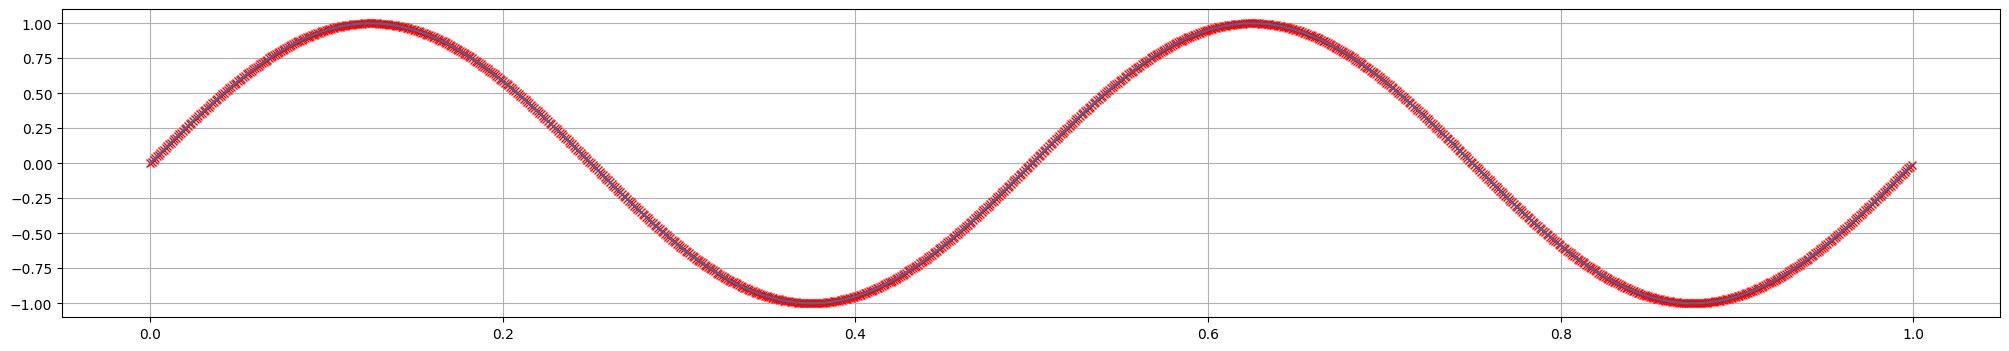

Vx[1] = 0.25


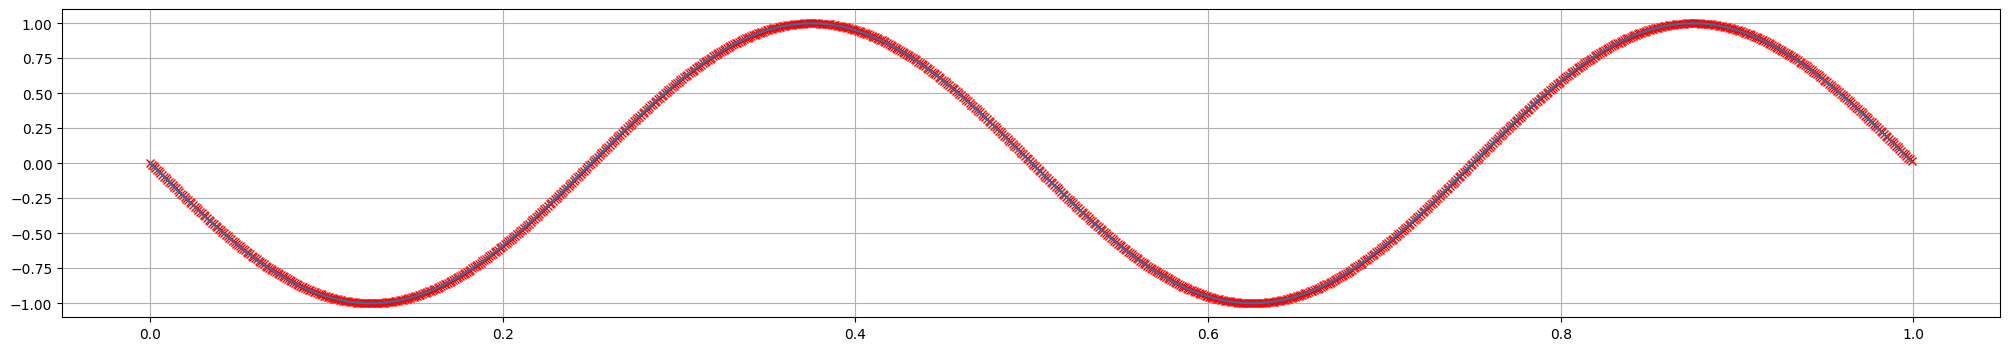

Vx[2] = 0.5


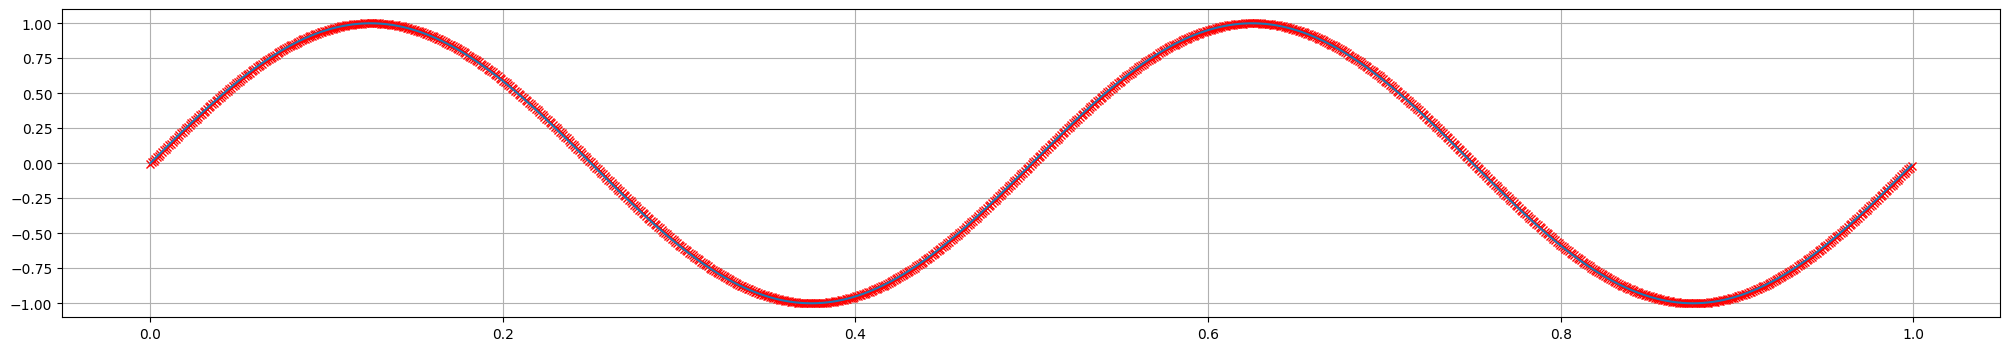

Vx[3] = 0.75


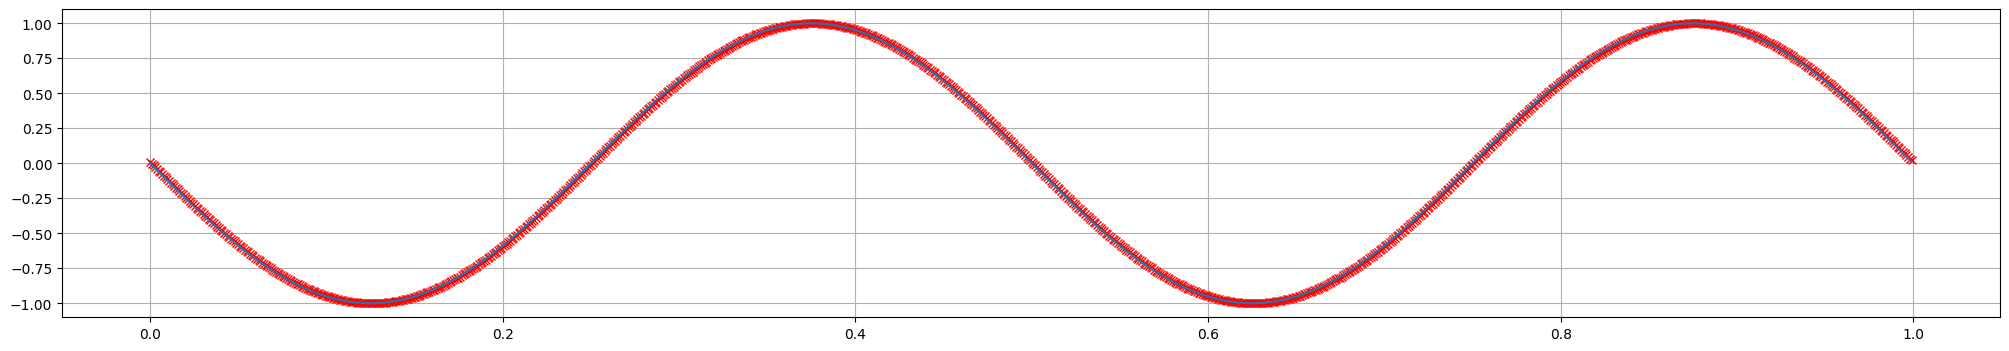

Vx[4] = 1.0


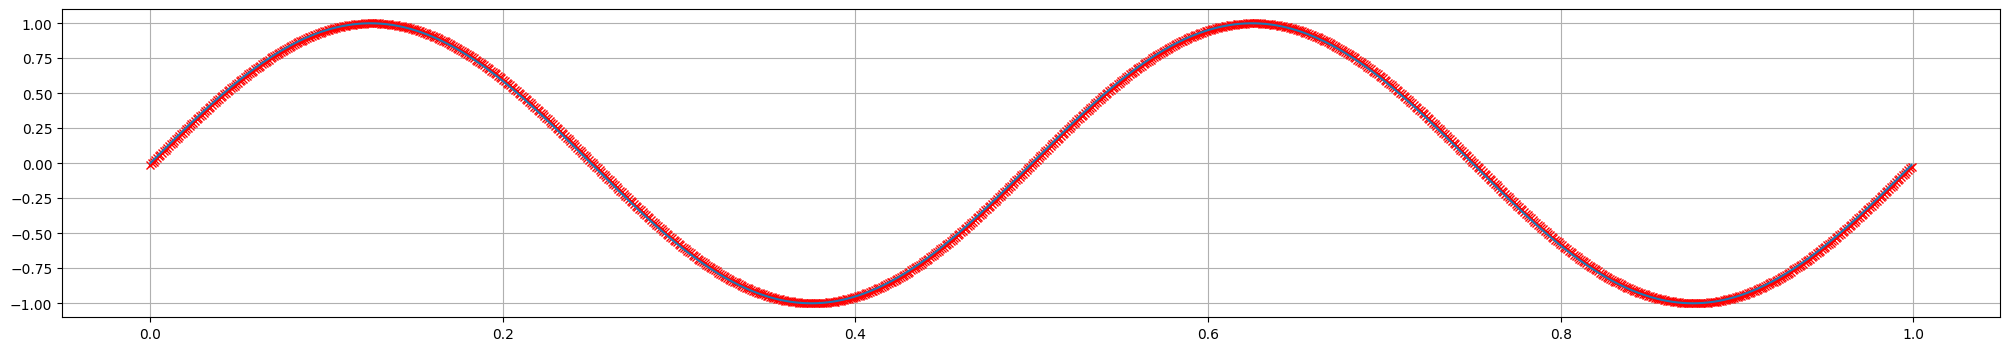

Vx[5] = 1.25


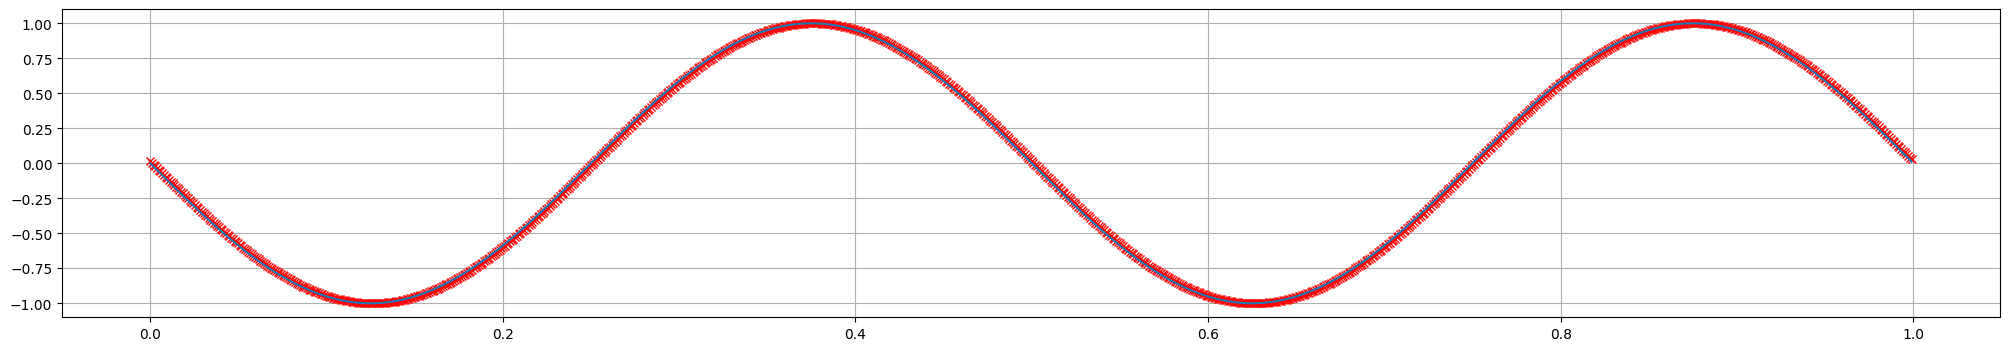

Vx[6] = 1.5


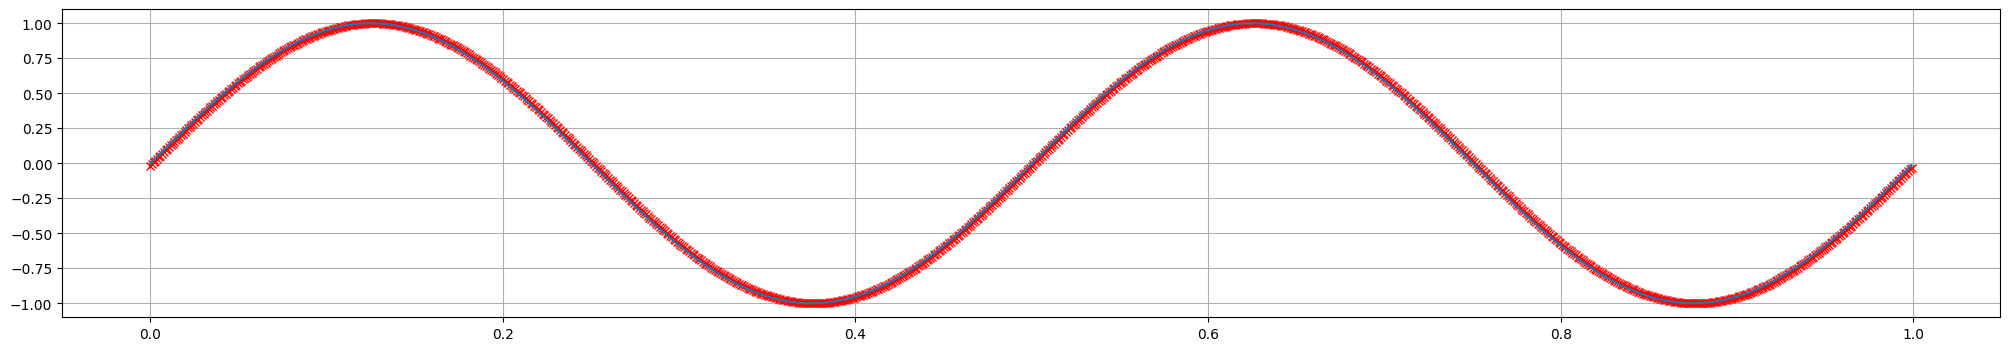

Vx[7] = 1.75


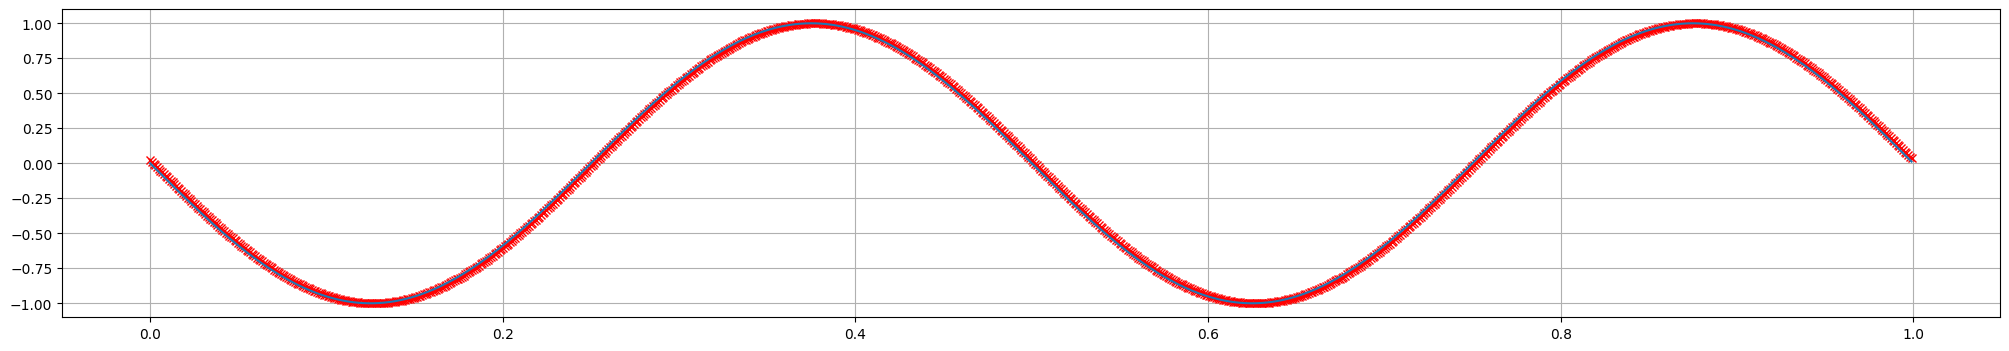

Vx[8] = 2.0


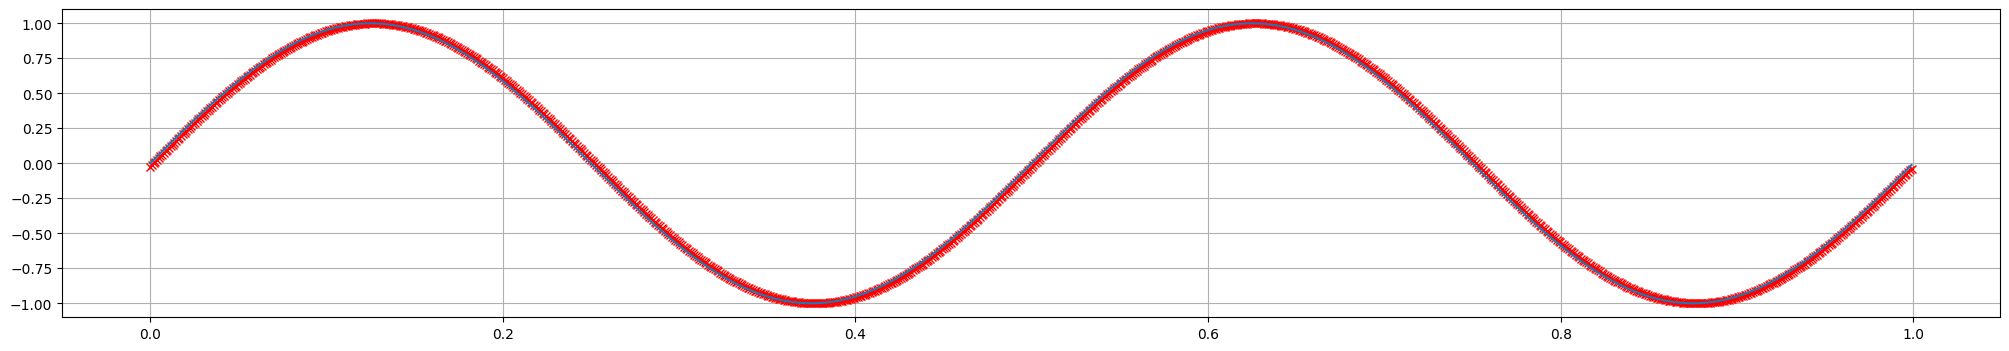

Vx[9] = 2.25


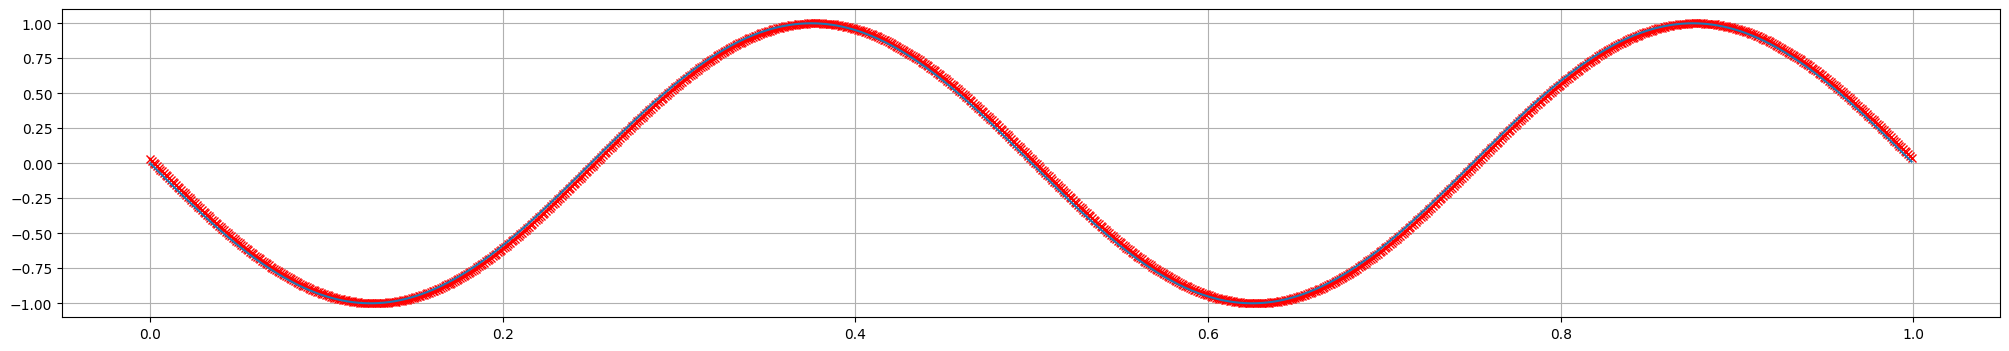

Vx[10] = 2.5


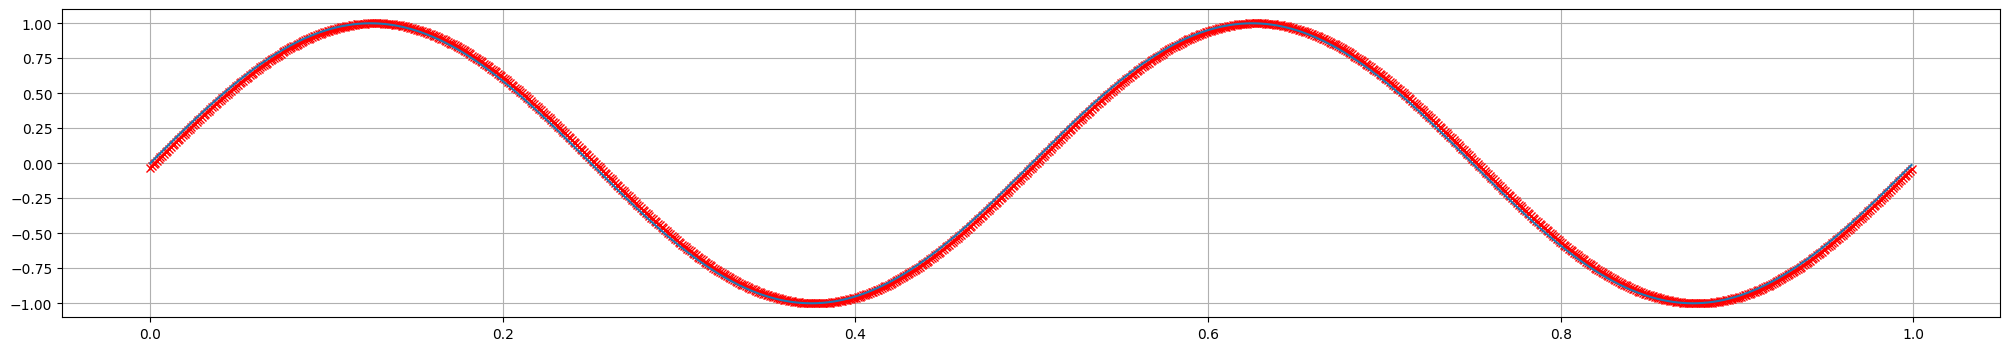

Vx[11] = 2.75


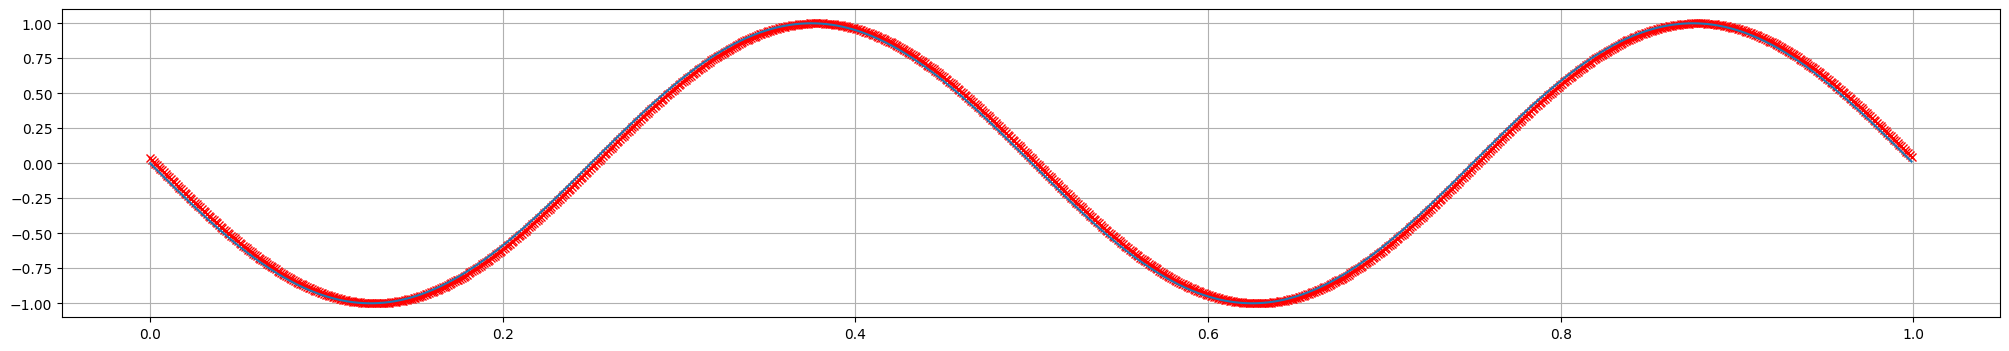

Vx[12] = 3.0


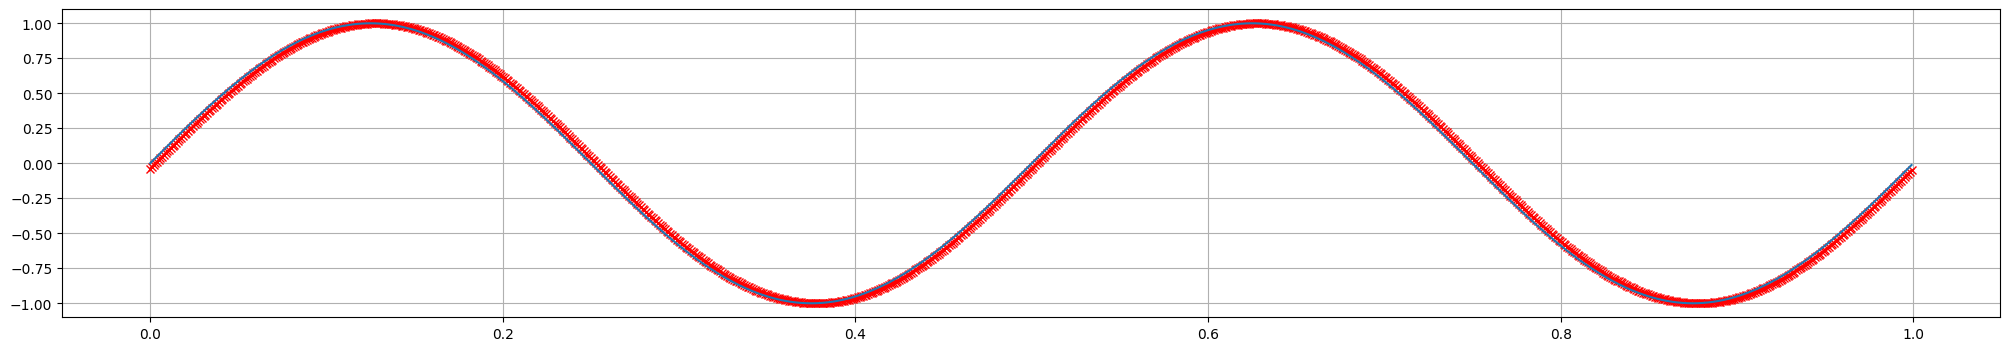

Vx[13] = 3.25


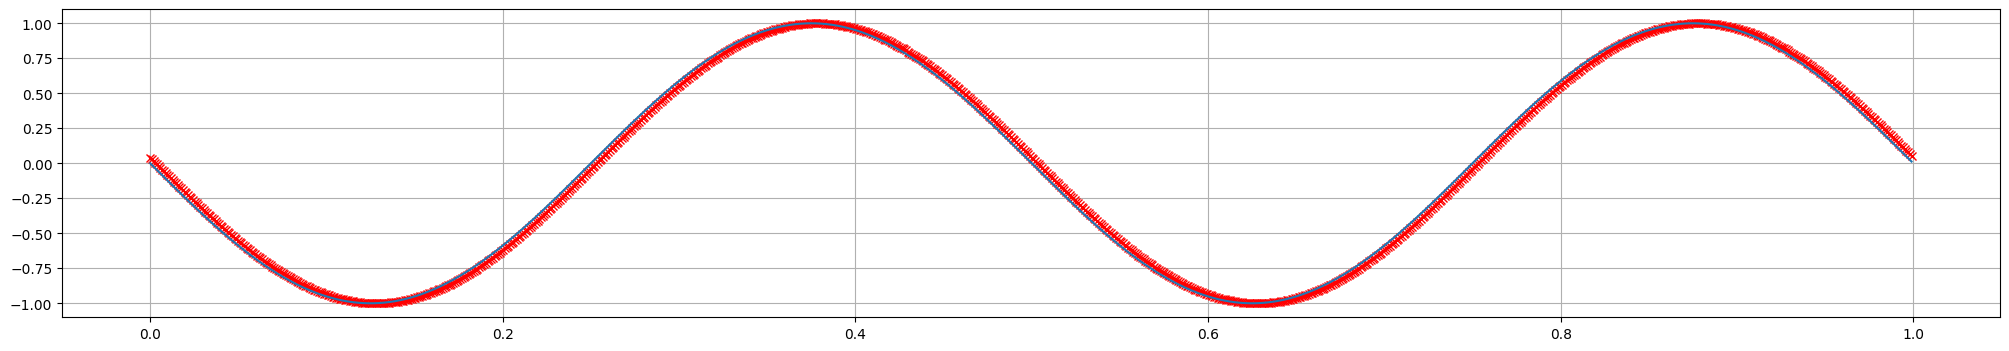

Vx[14] = 3.5


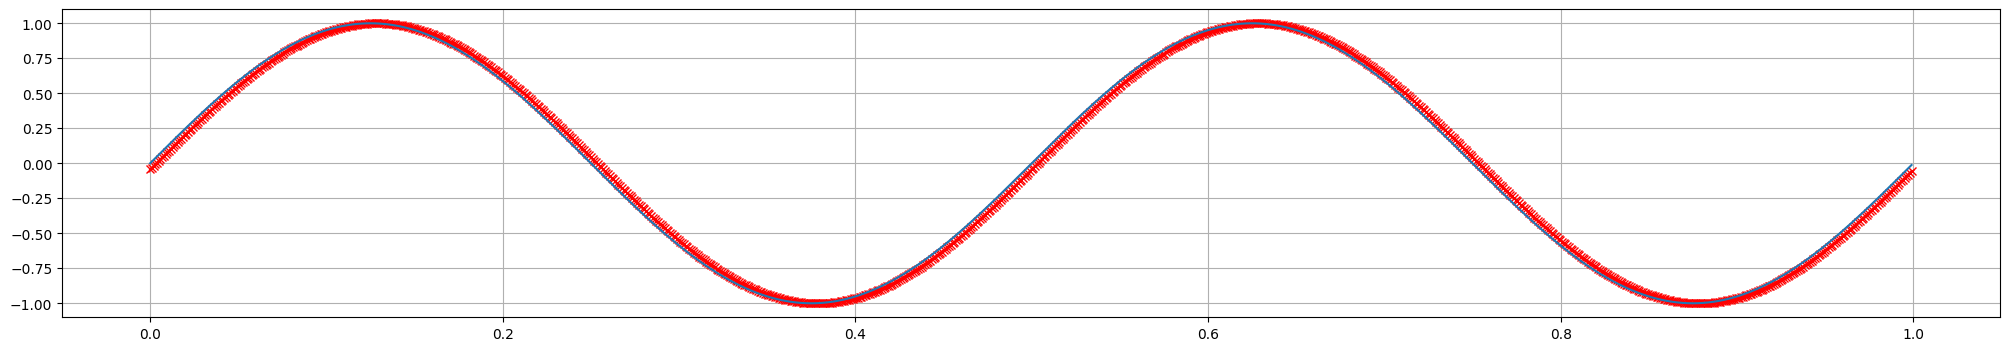

Vx[15] = 3.75


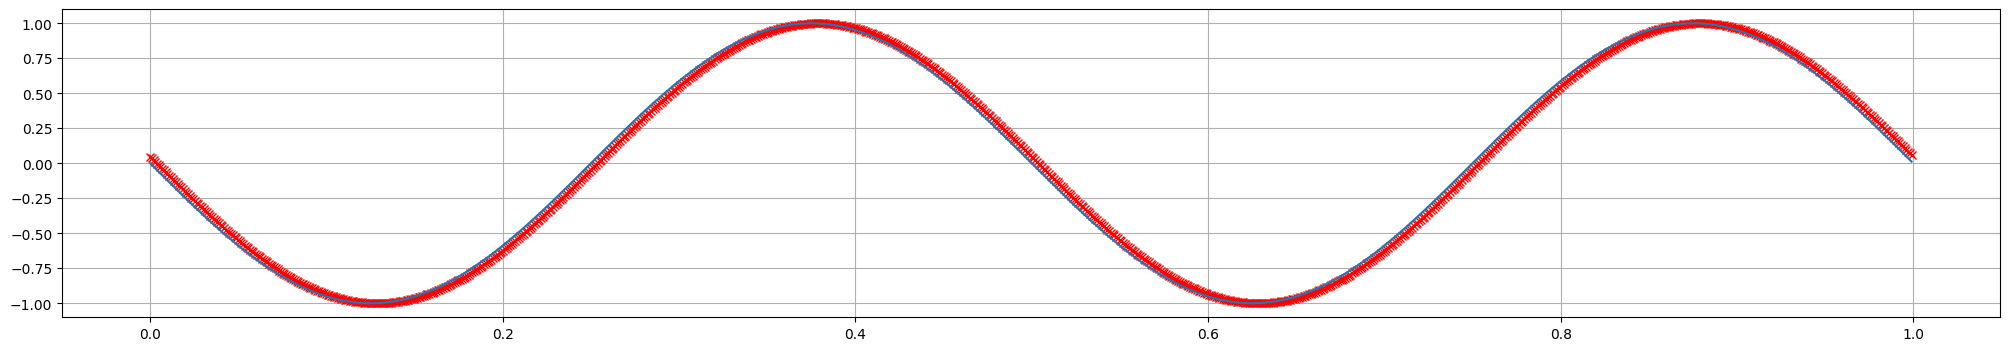

Vx[16] = 4.0


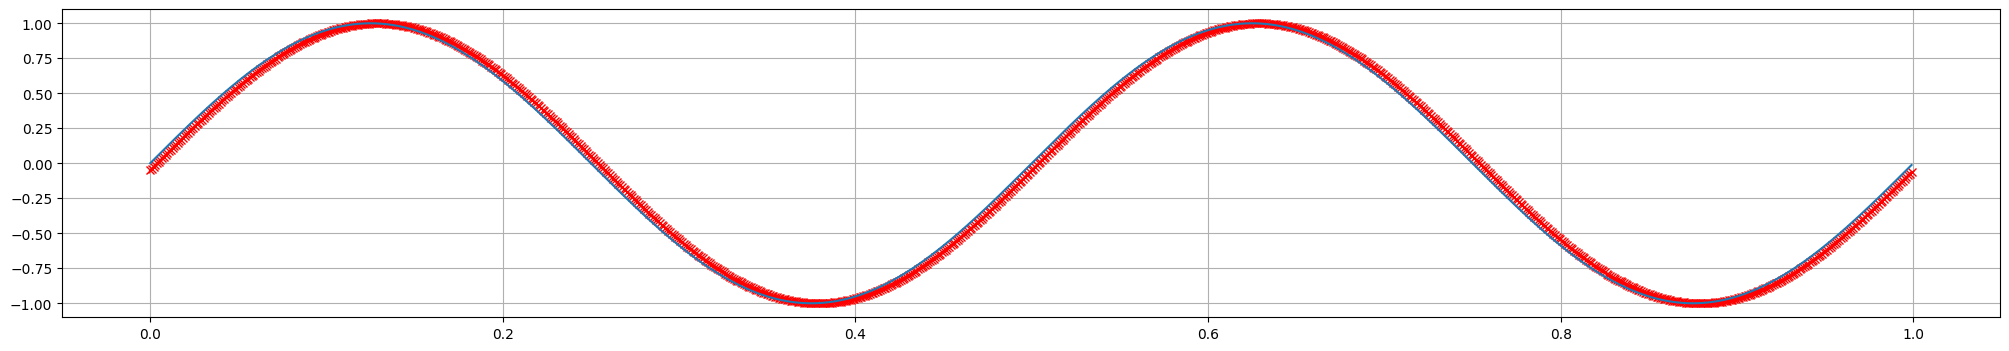

Vx[17] = 4.25


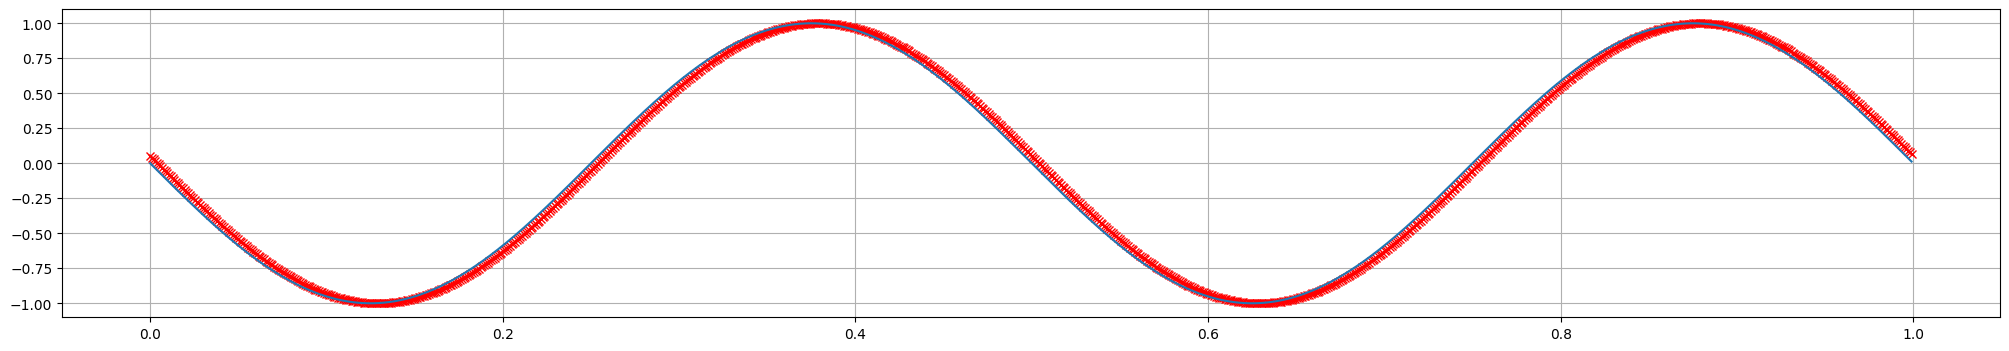

Vx[18] = 4.5


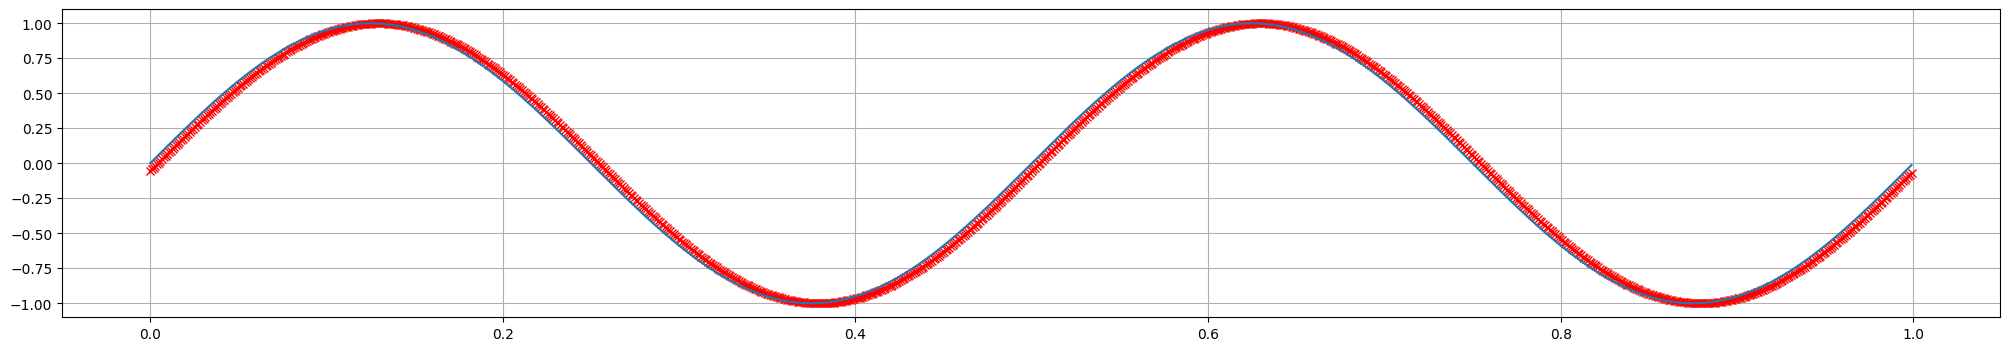

Vx[19] = 4.75


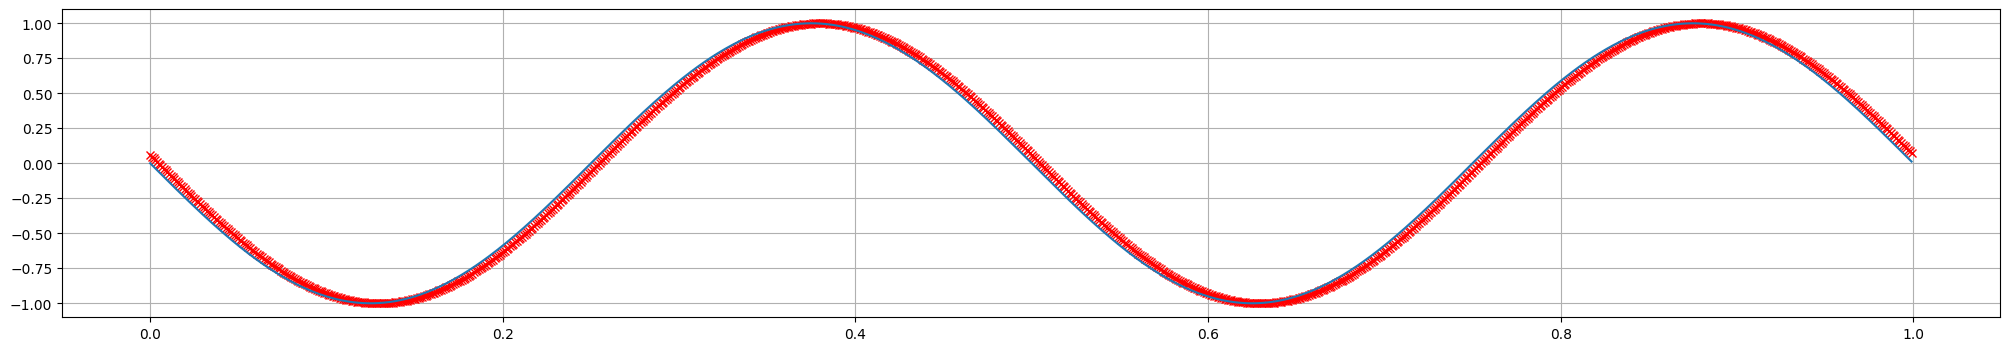

Vx[20] = 5.0


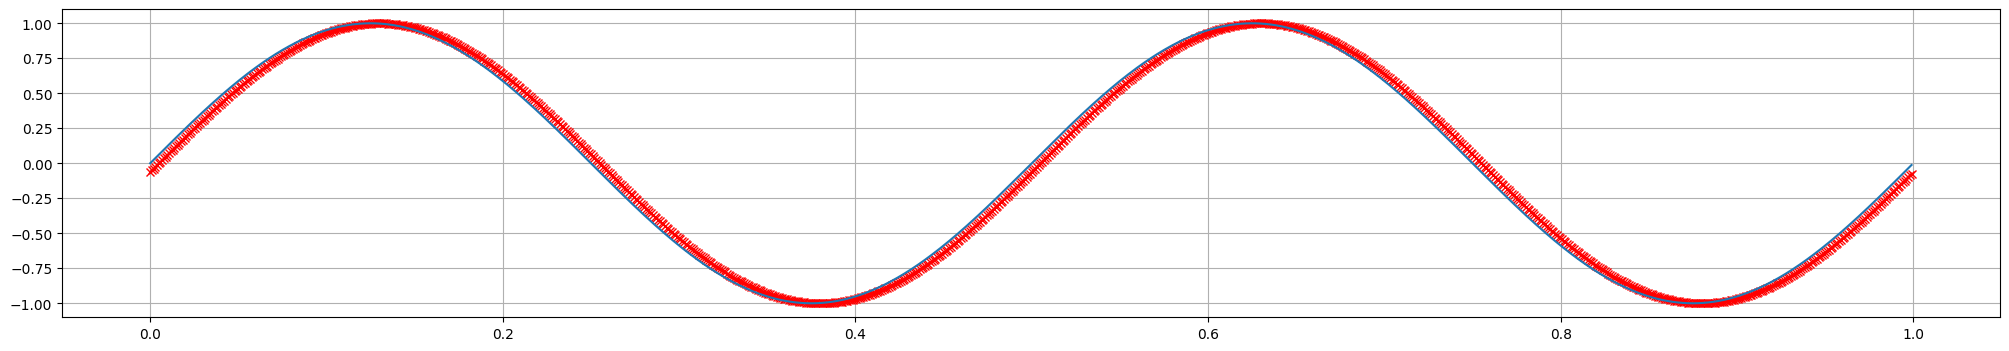

Vx[21] = 5.25


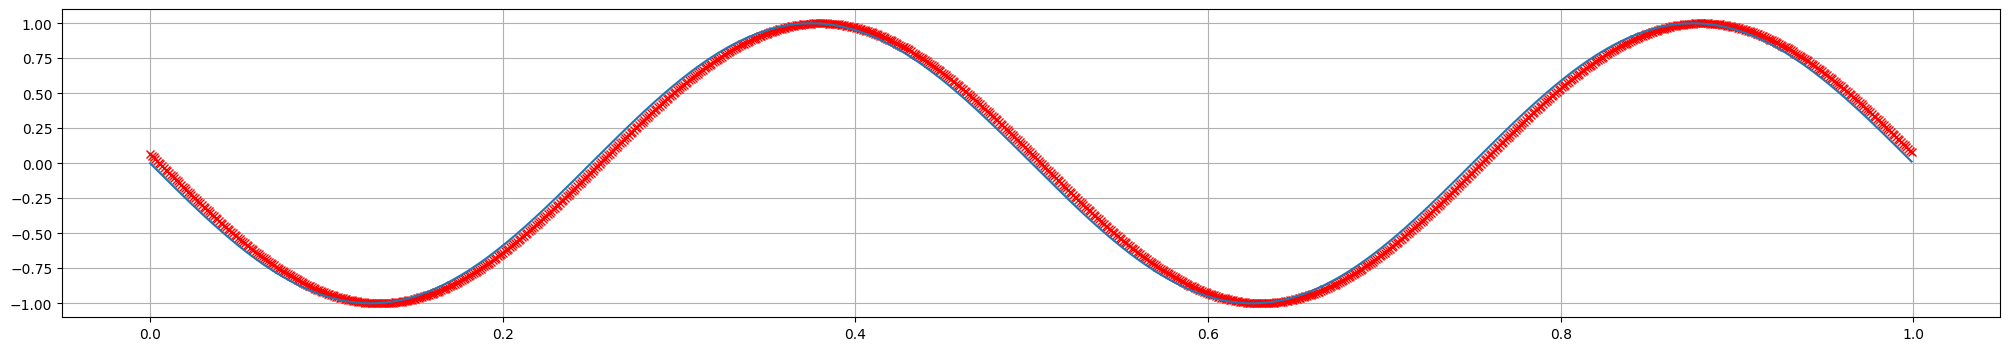

Vx[22] = 5.5


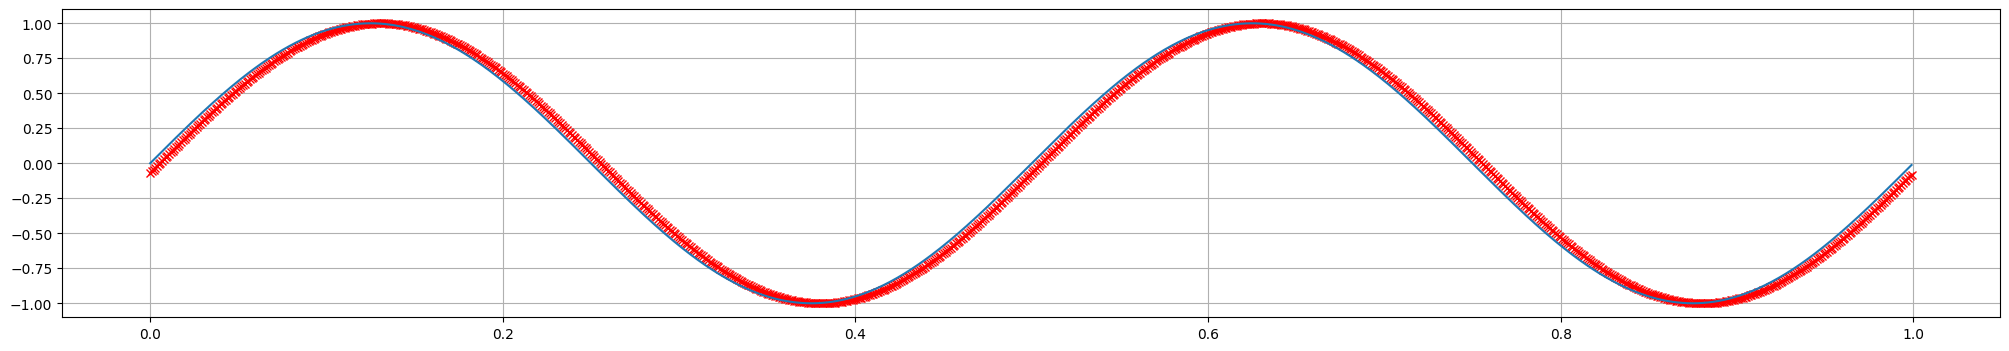

Vx[23] = 5.75


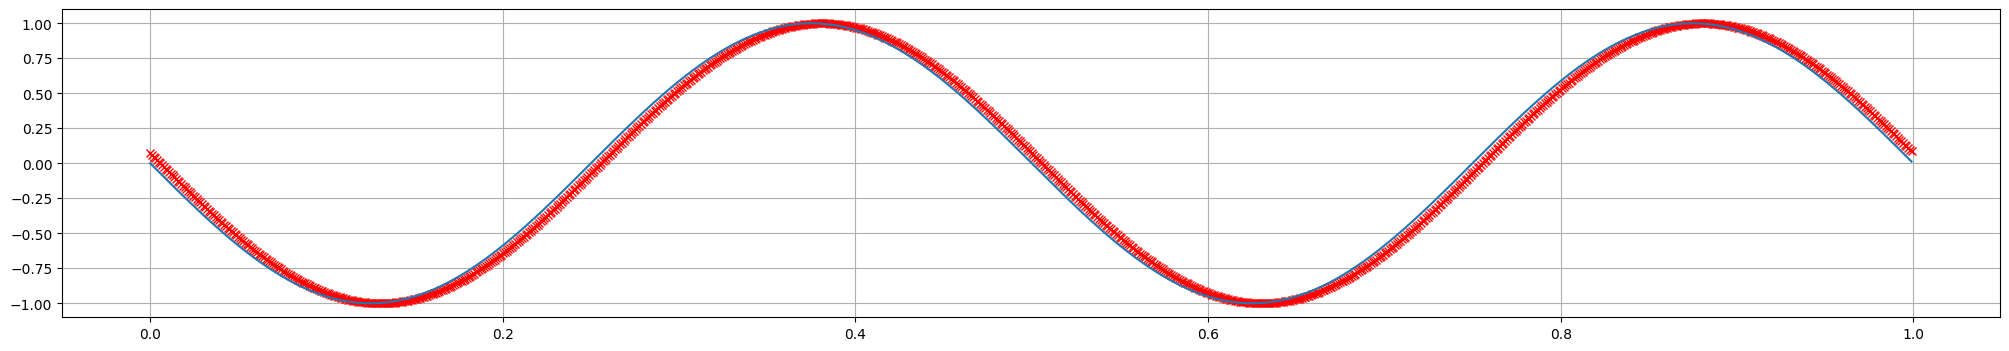

Vx[24] = 6.0


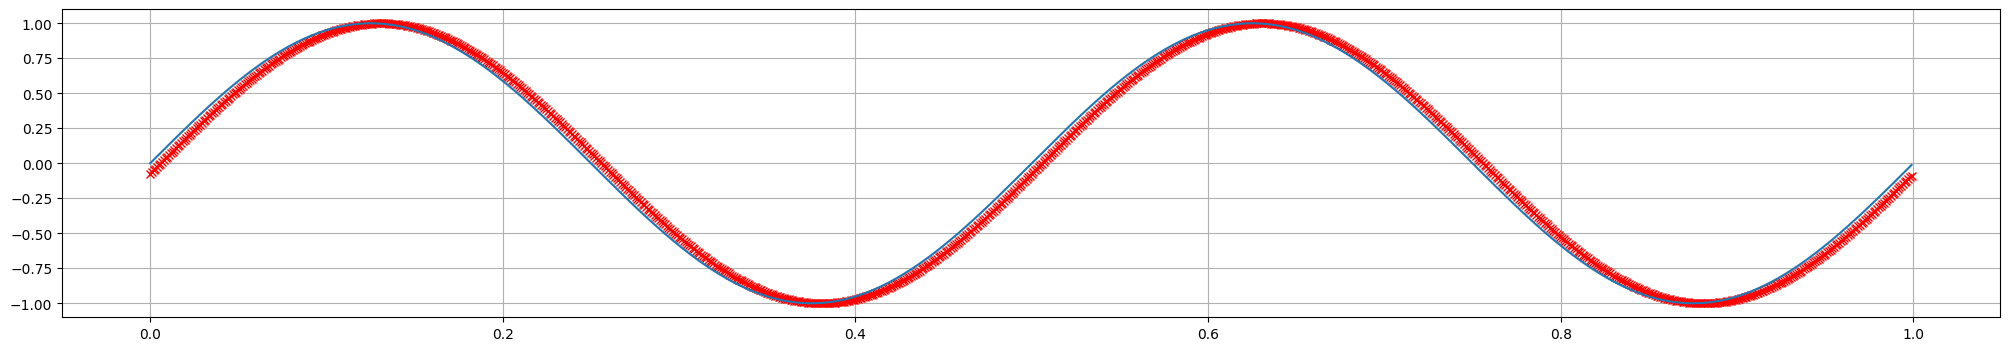

Vx[25] = 6.25


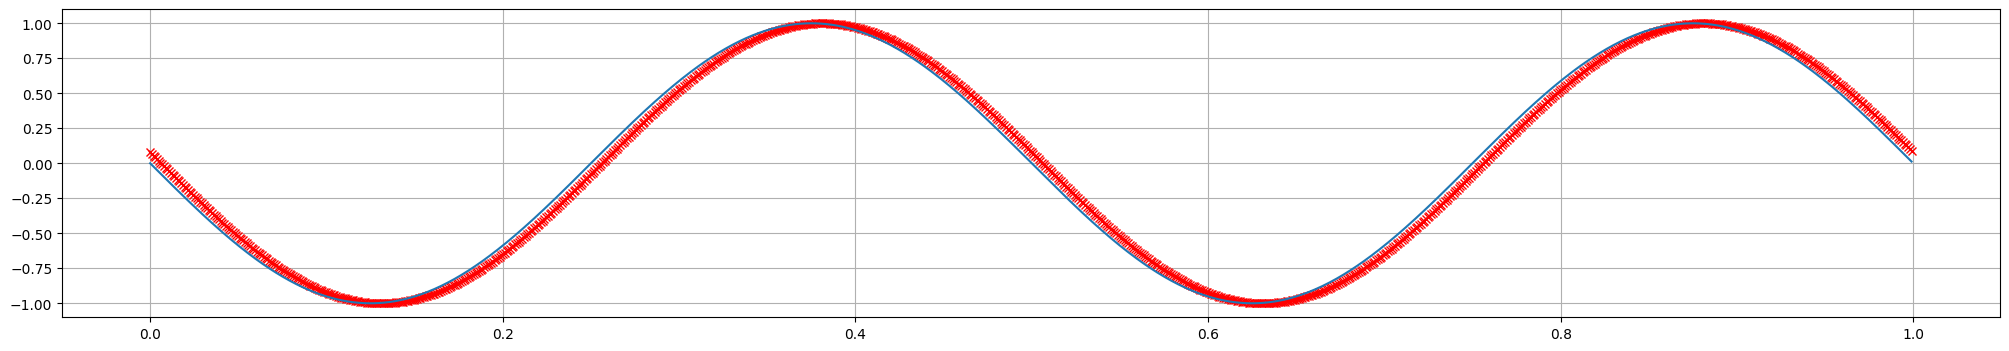

Vx[26] = 6.5


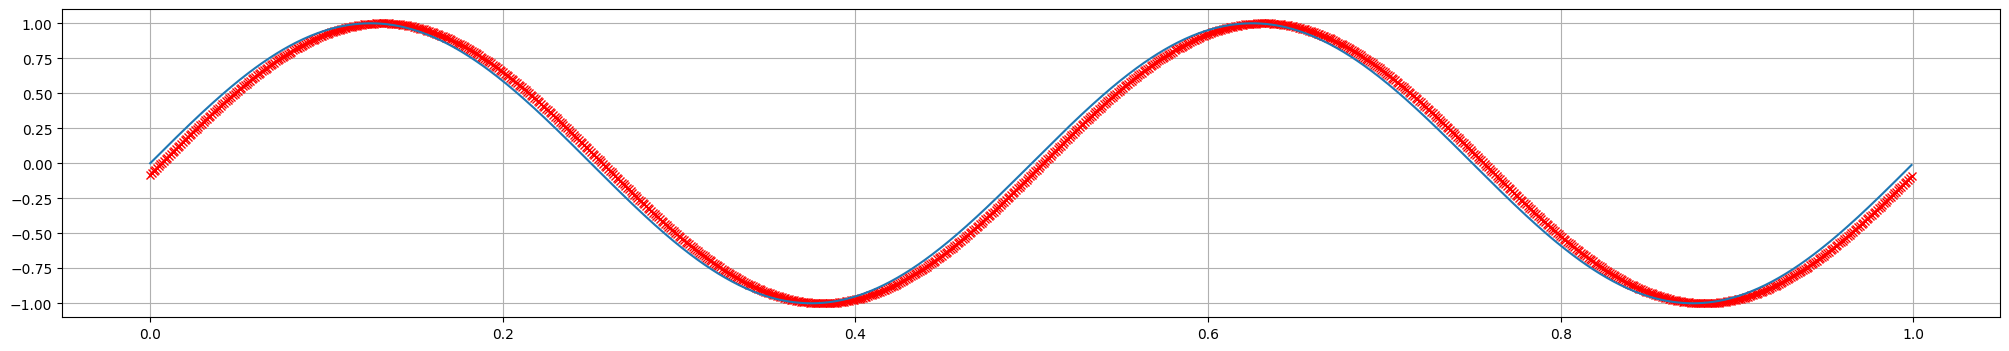

Vx[27] = 6.75


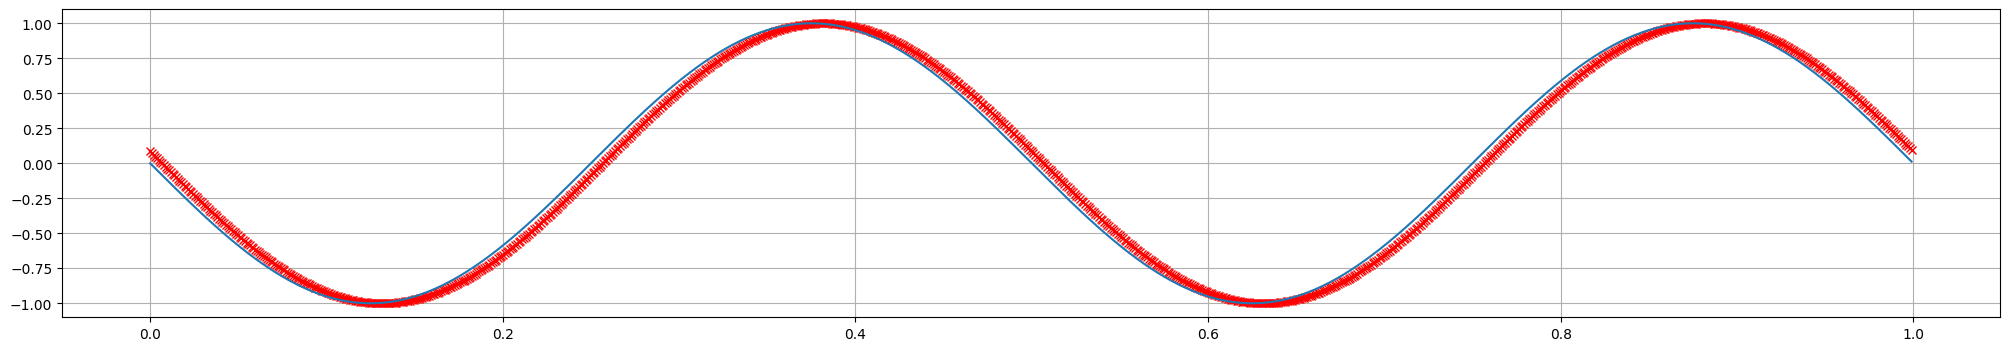

Vx[28] = 7.0


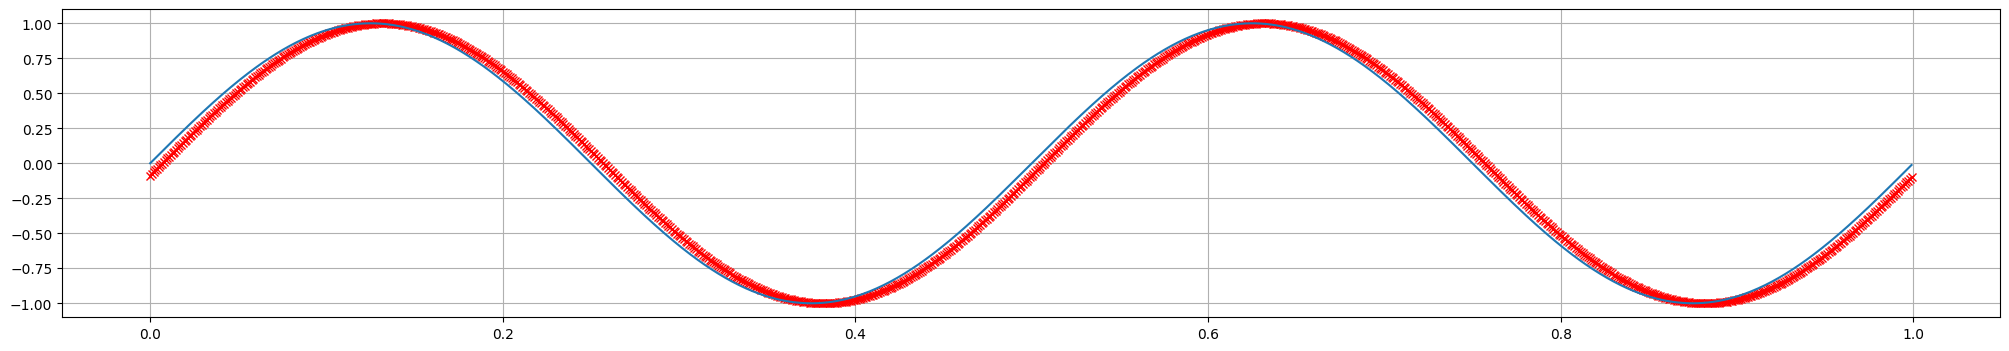

Vx[29] = 7.25


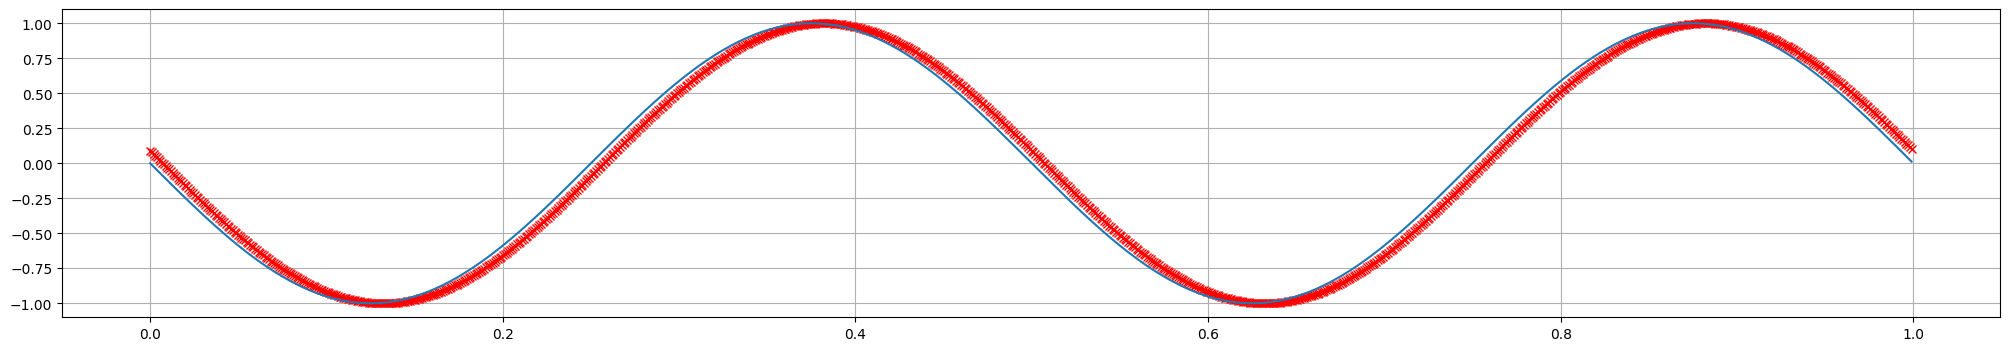

Vx[30] = 7.5


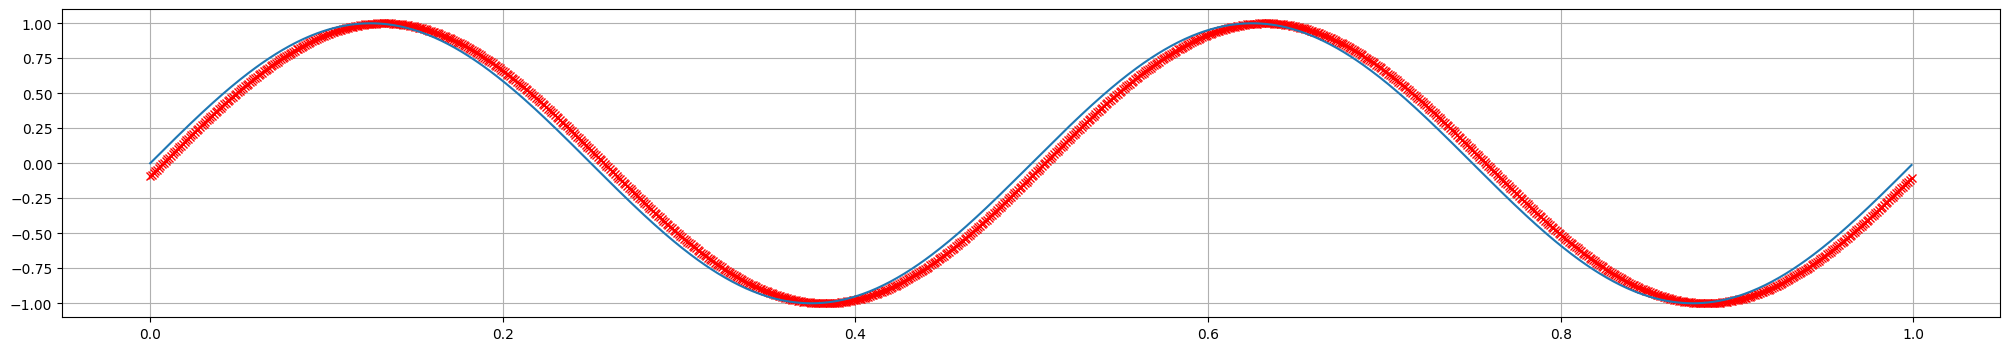

Vx[31] = 7.75


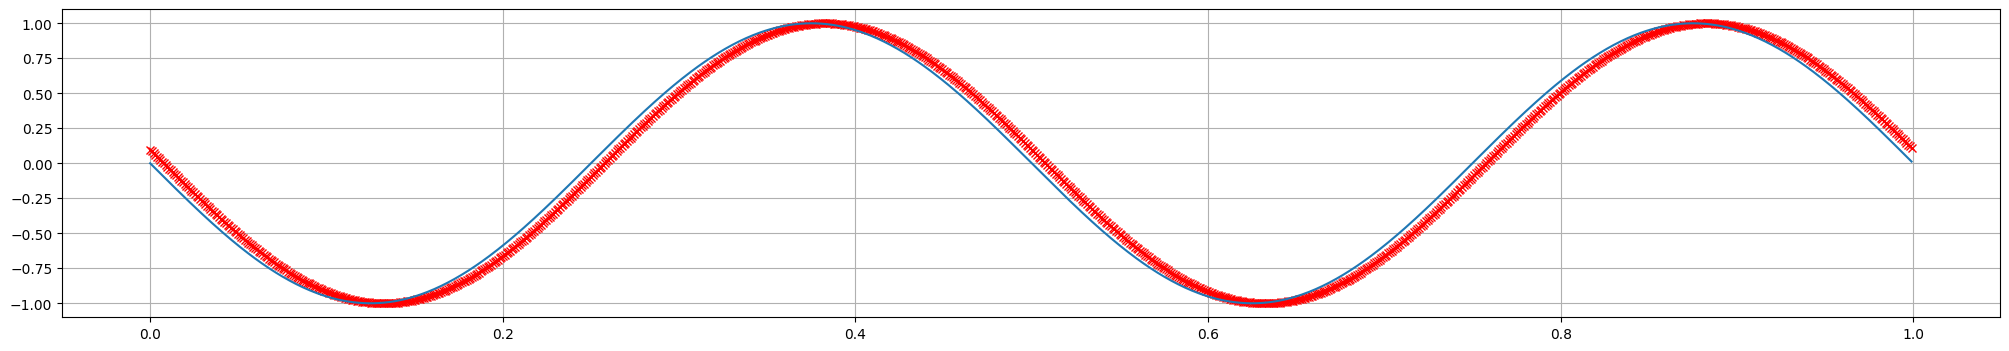

Vx[32] = 8.0


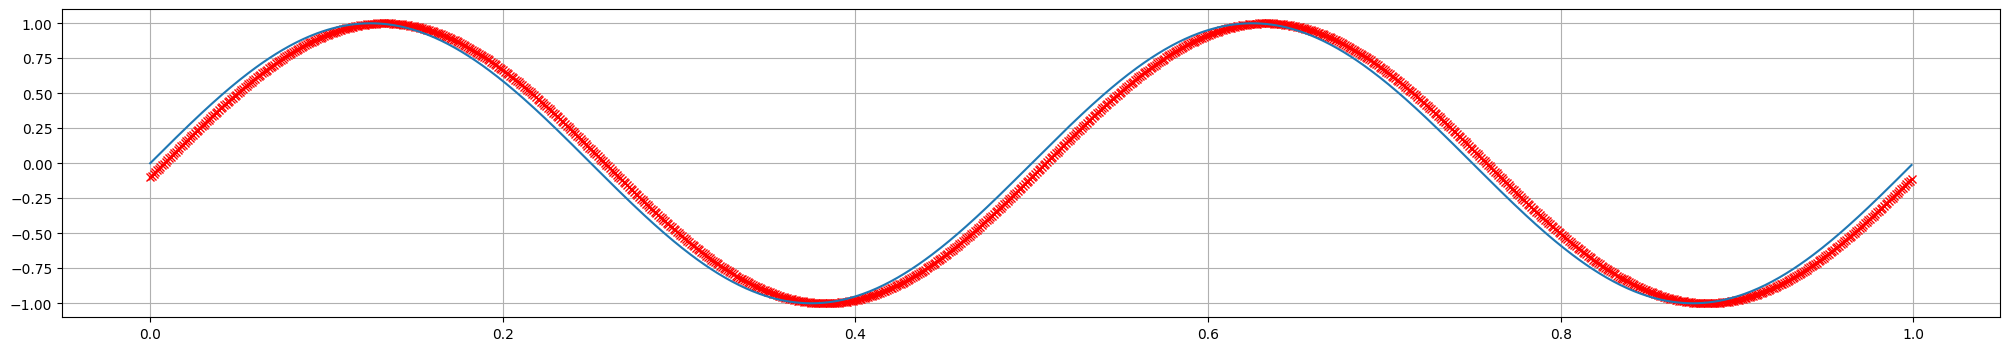

Vx[33] = 8.25


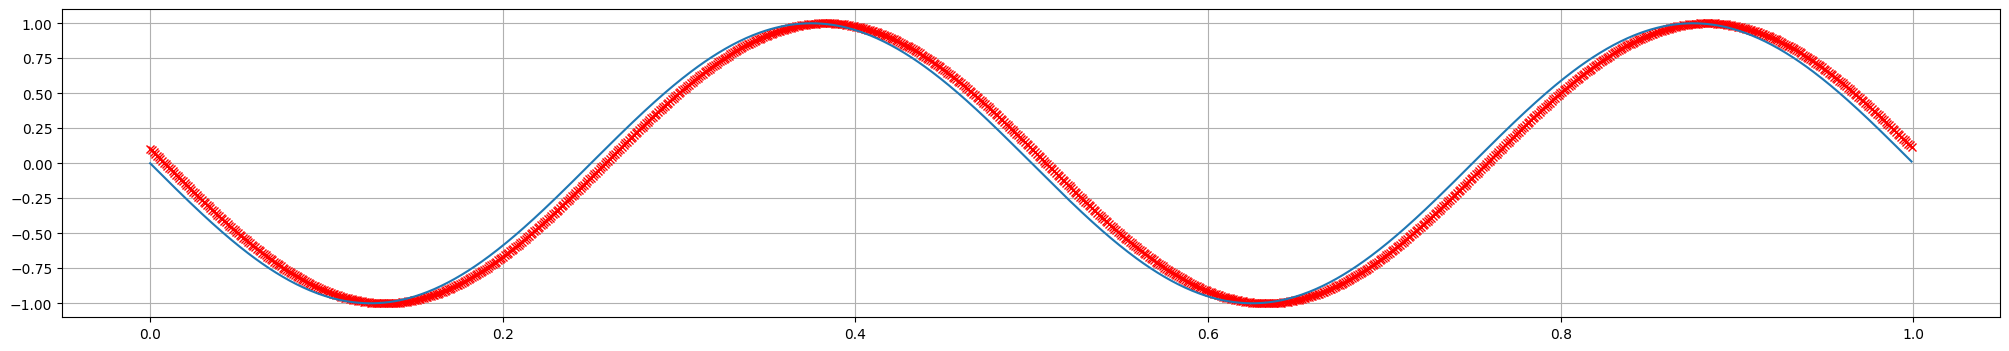

Vx[34] = 8.5


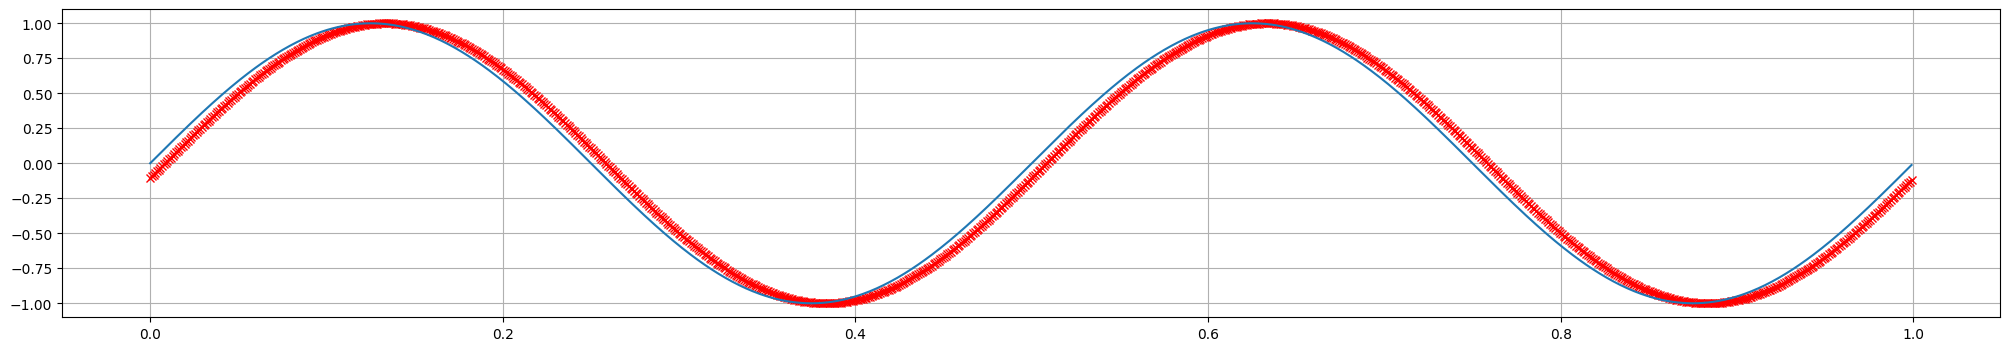

Vx[35] = 8.75


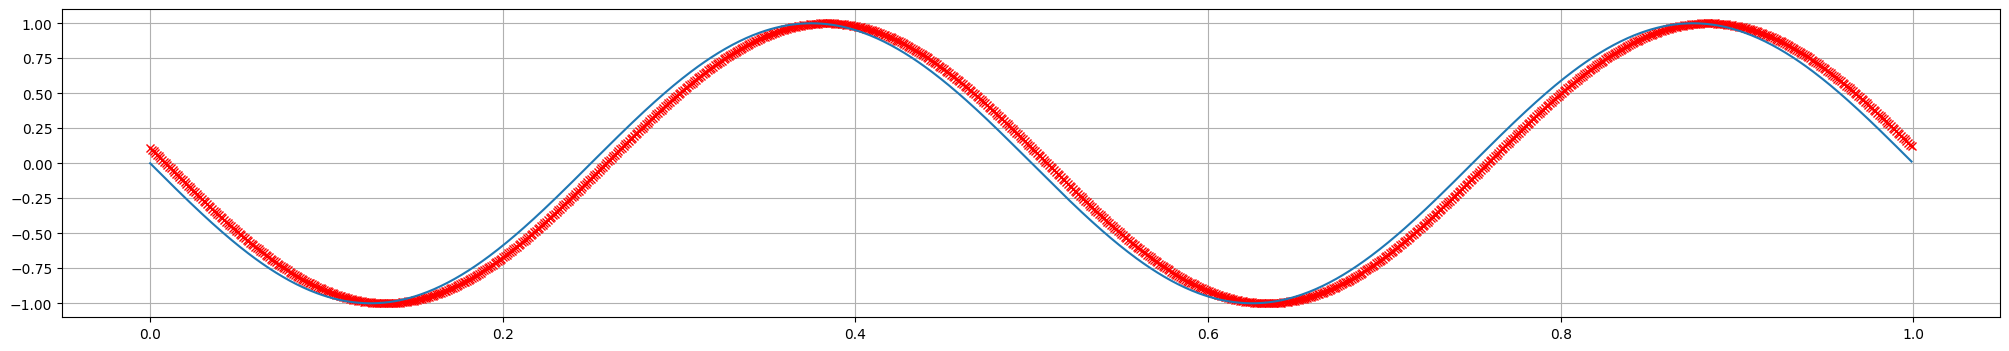

Vx[36] = 9.0


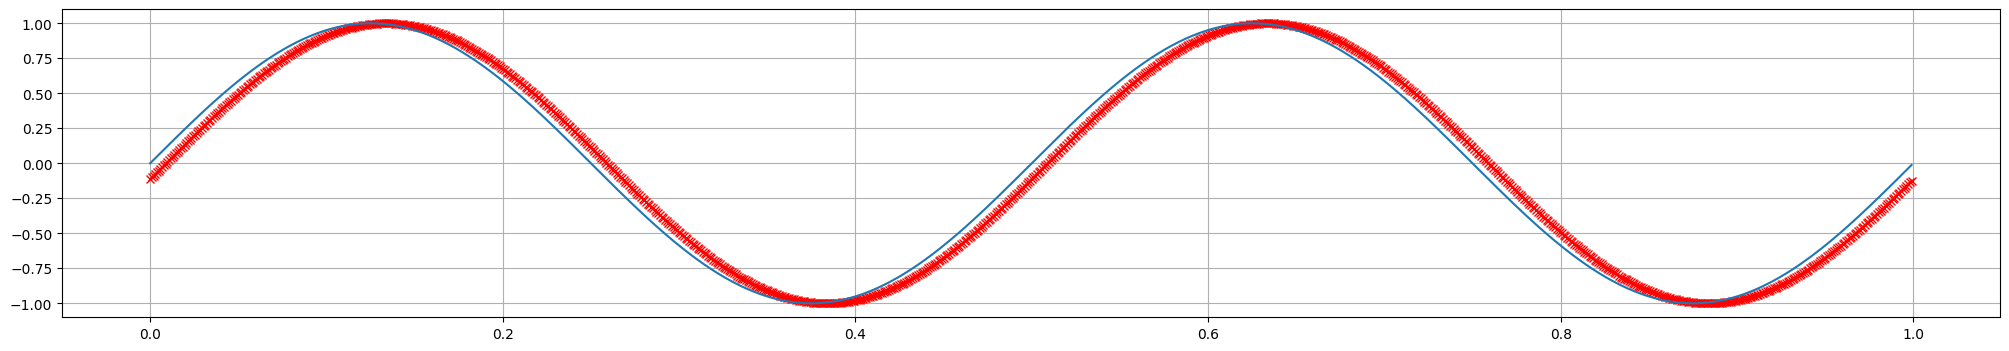

Vx[37] = 9.25


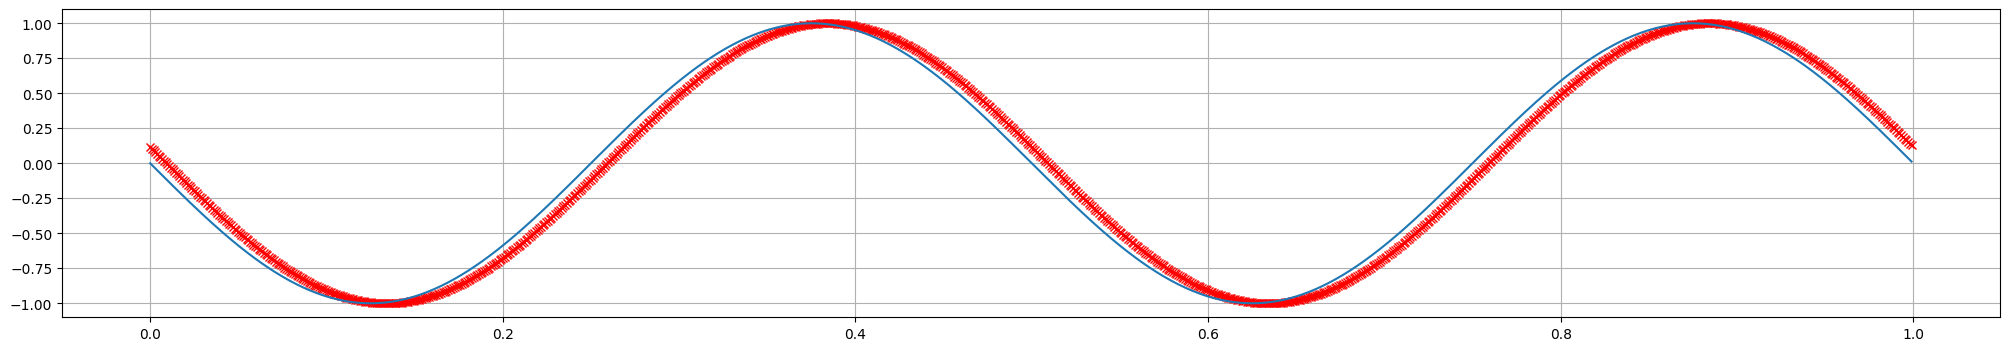

Vx[38] = 9.5


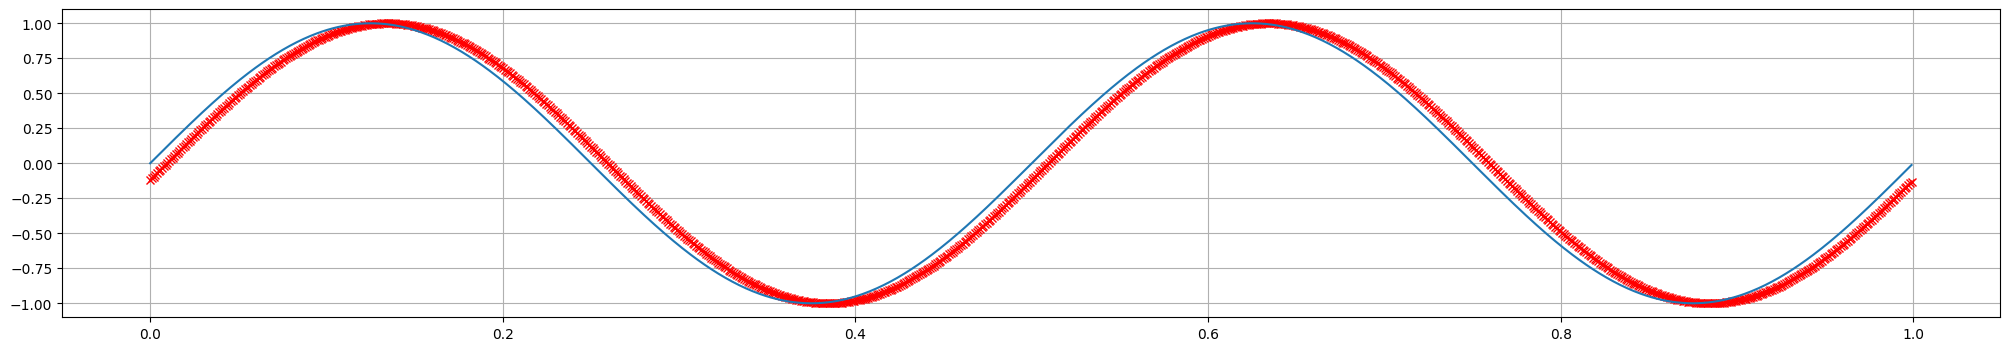

Vx[39] = 9.75


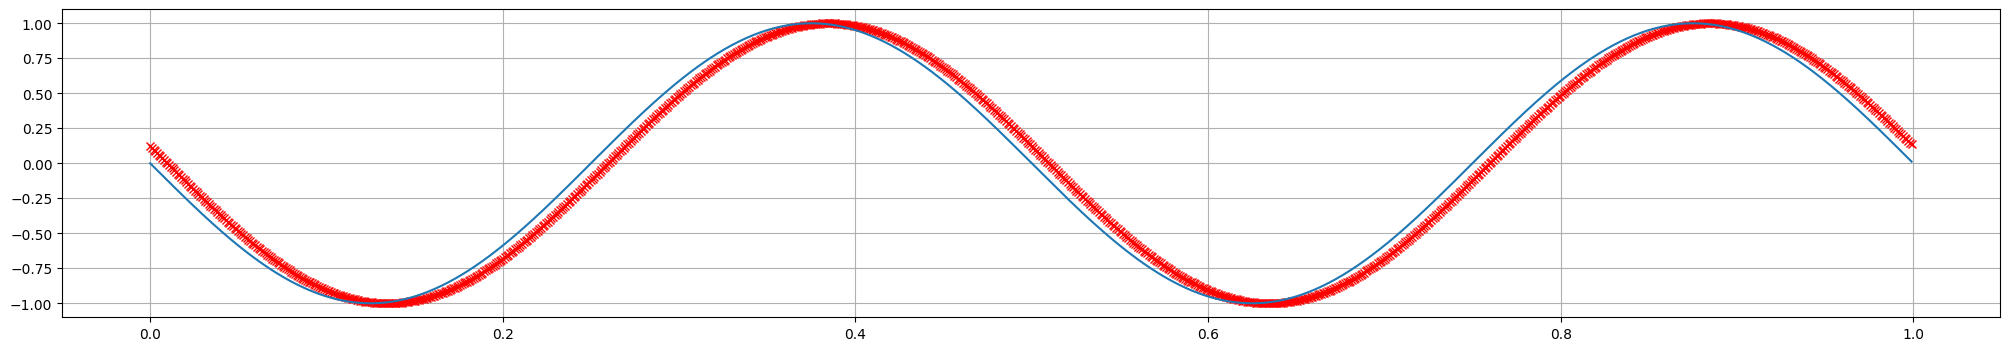

Vx[40] = 10.0


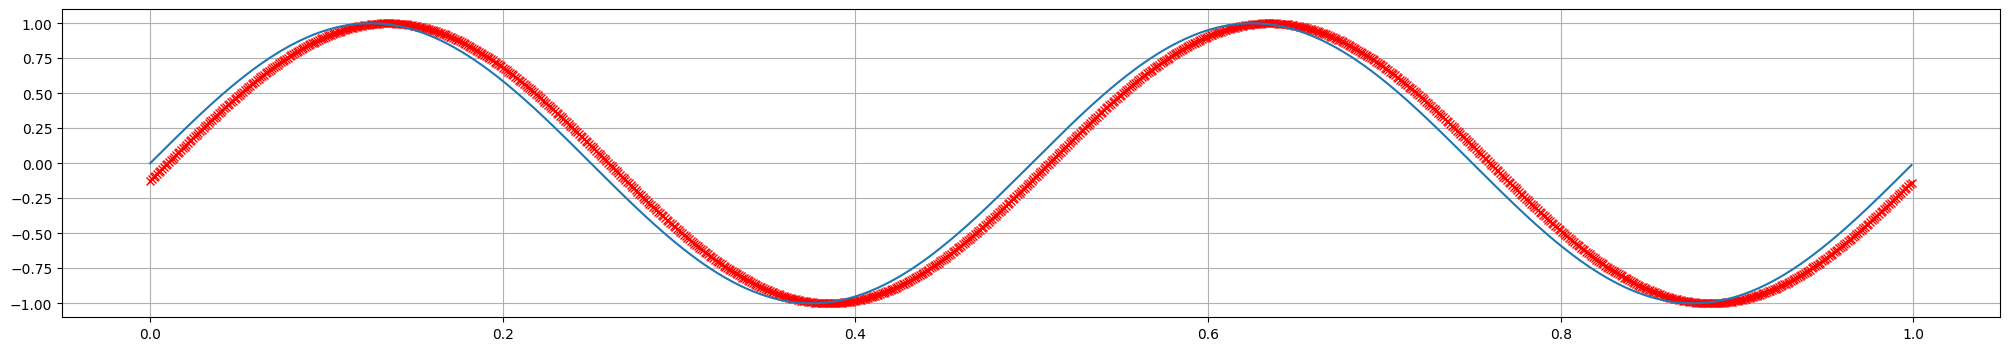

Vx[41] = 10.25


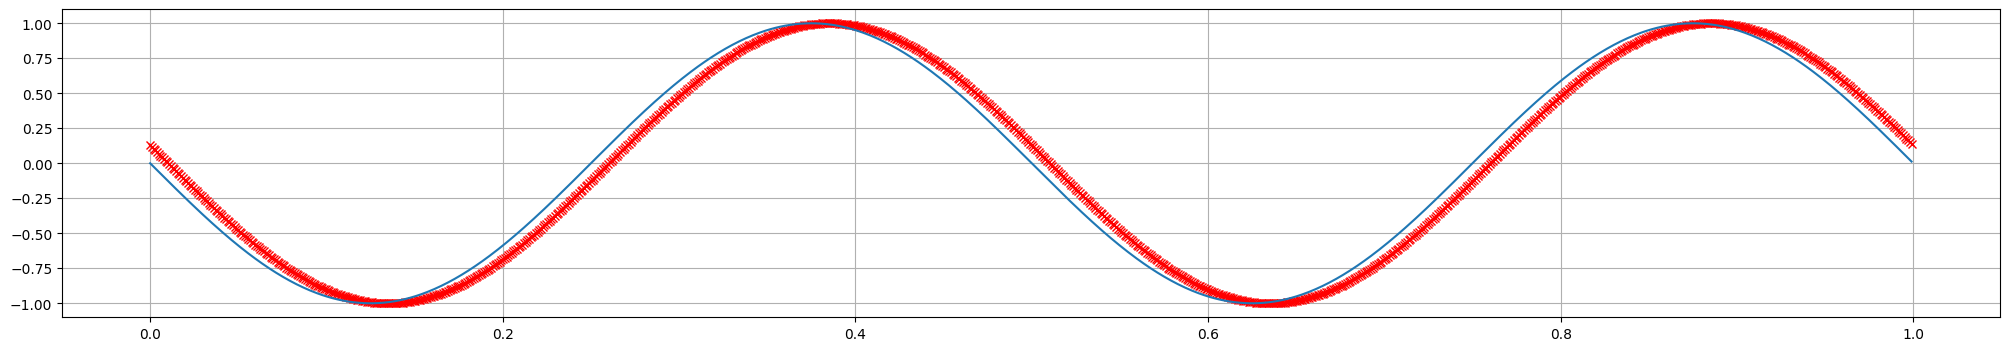

Vx[42] = 10.5


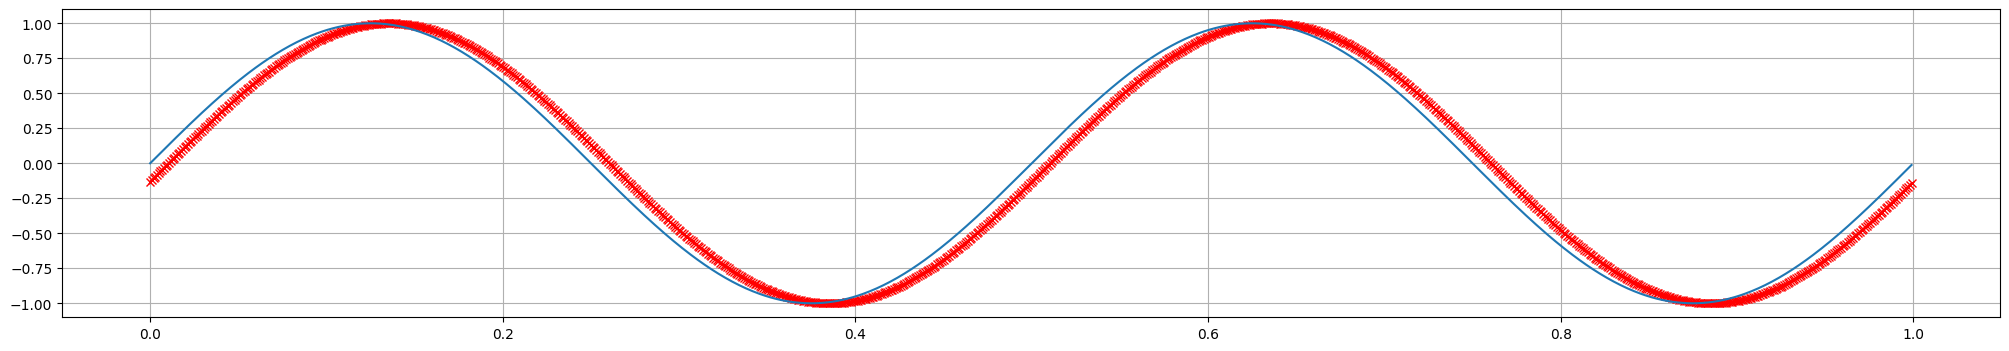

Vx[43] = 10.75


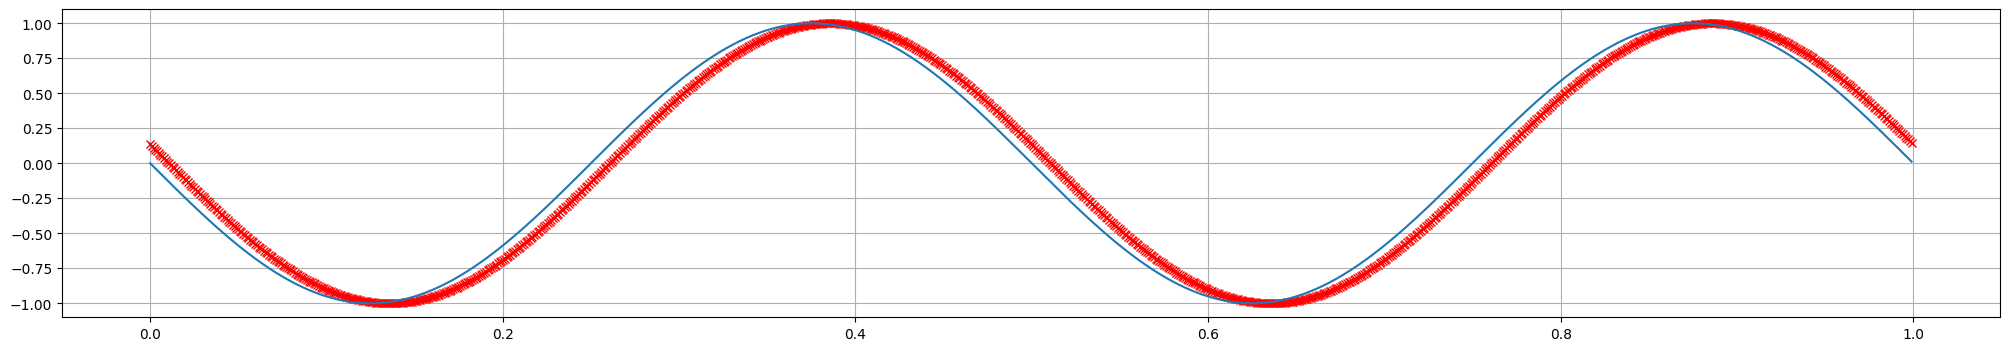

Vx[44] = 11.0


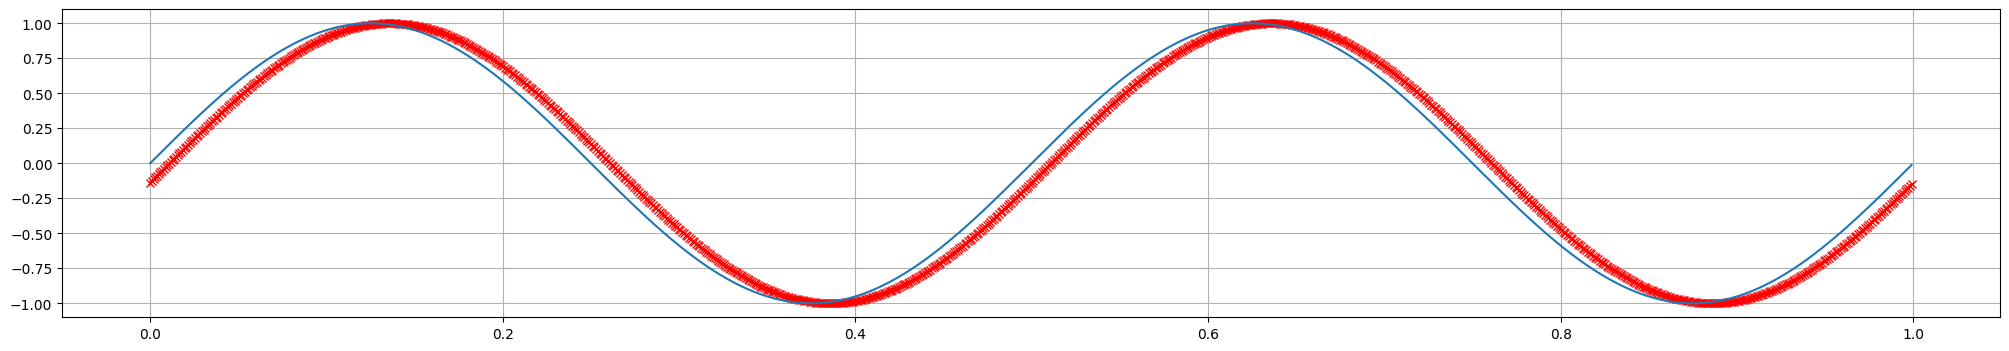

Vx[45] = 11.25


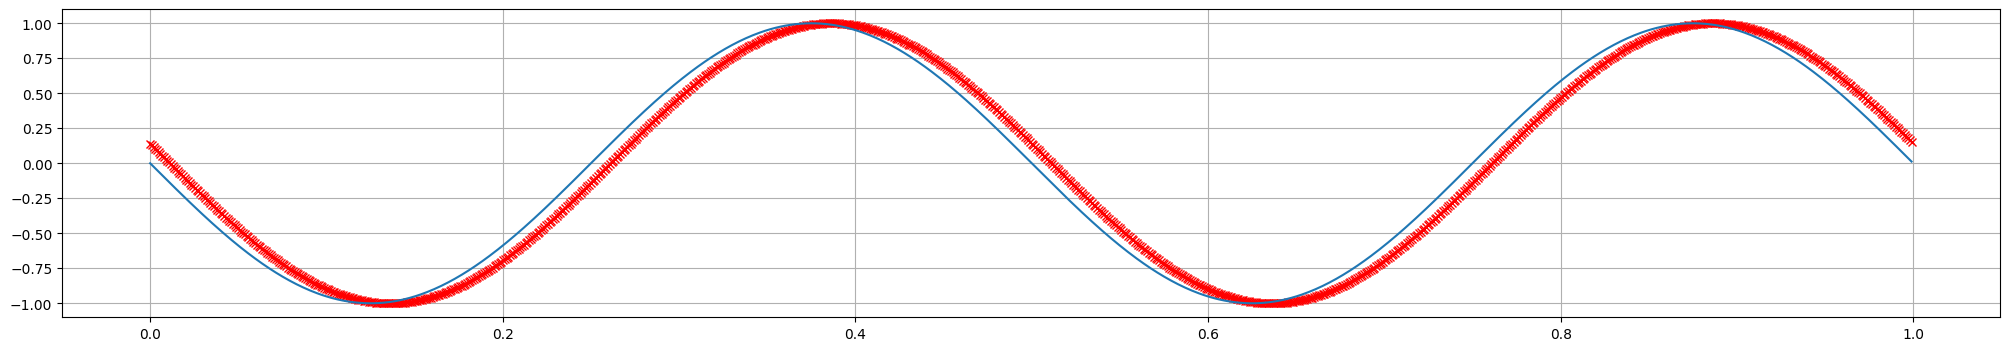

Vx[46] = 11.5


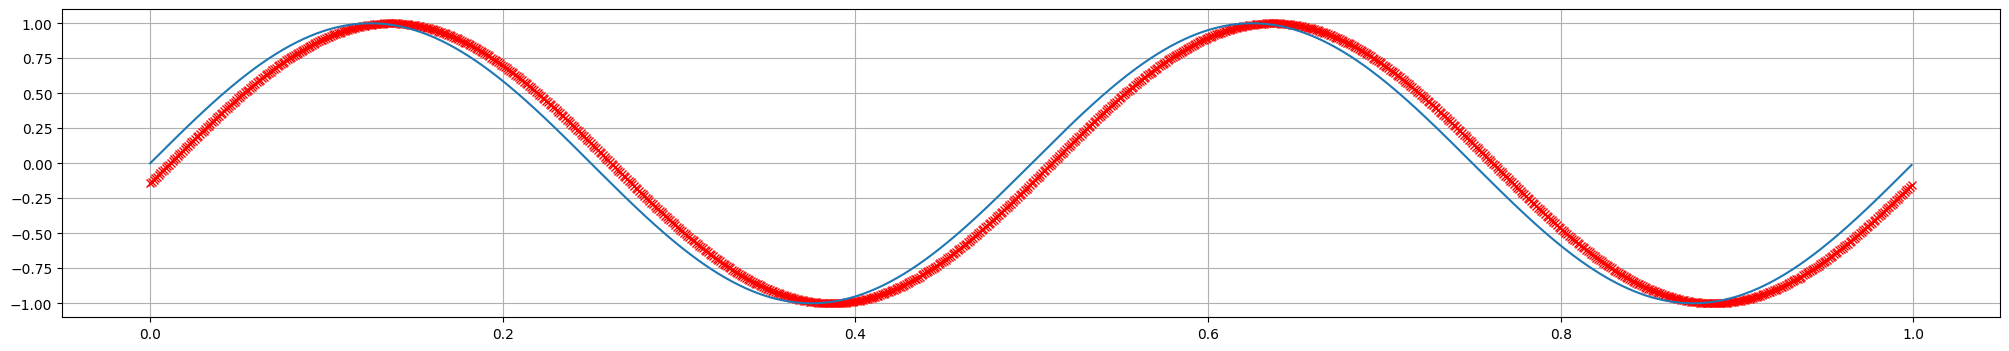

Vx[47] = 11.75


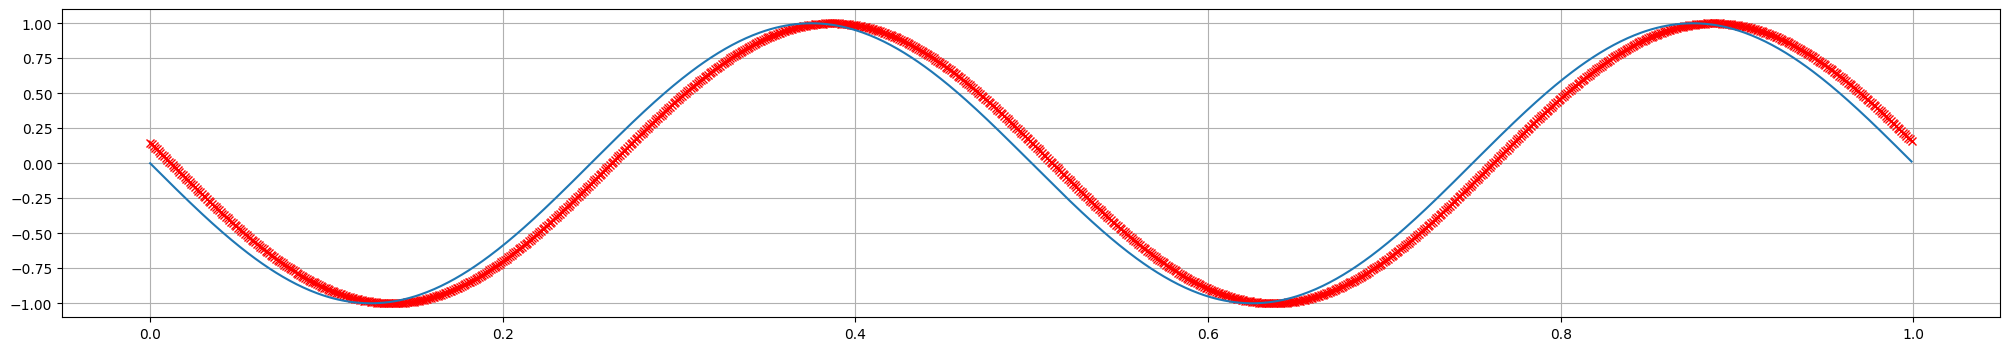

Vx[48] = 12.0


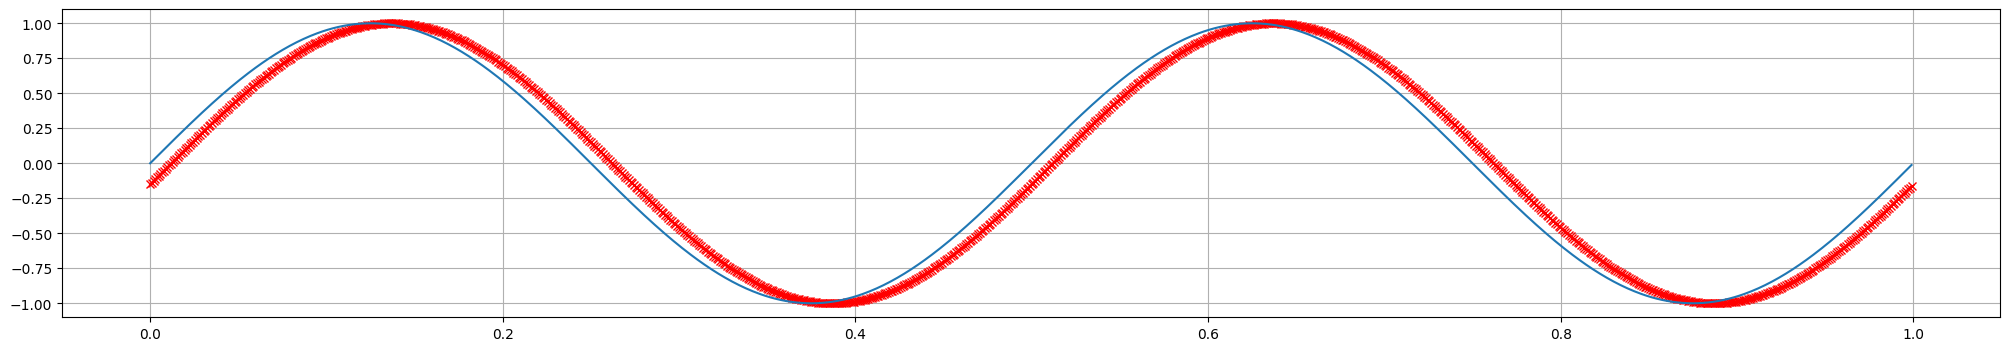

Vx[49] = 12.25


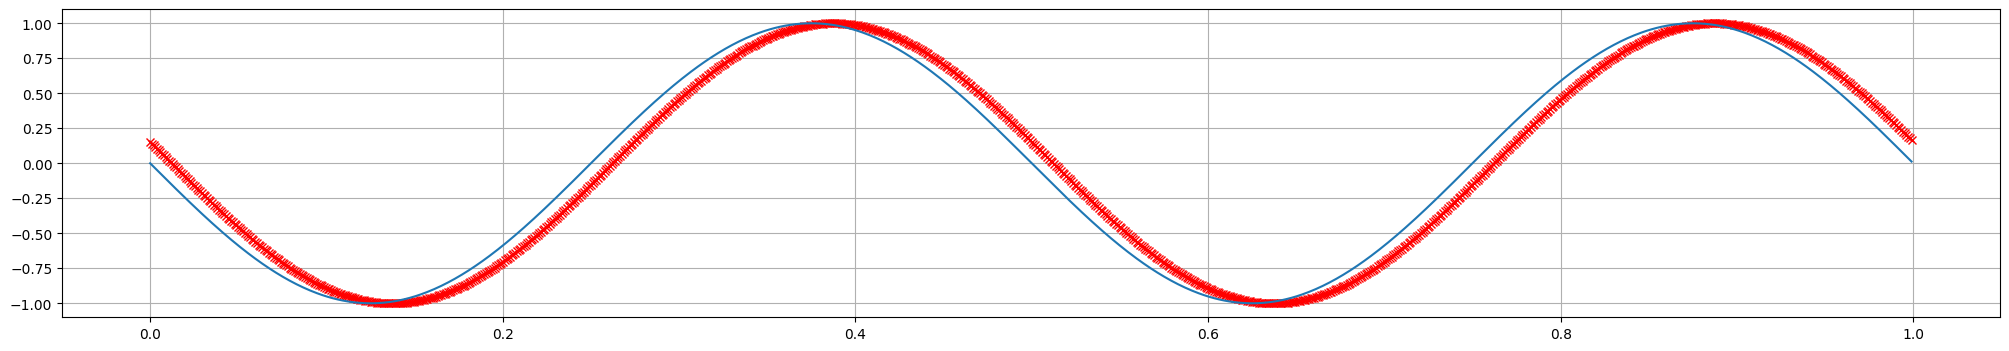

Vx[50] = 12.5


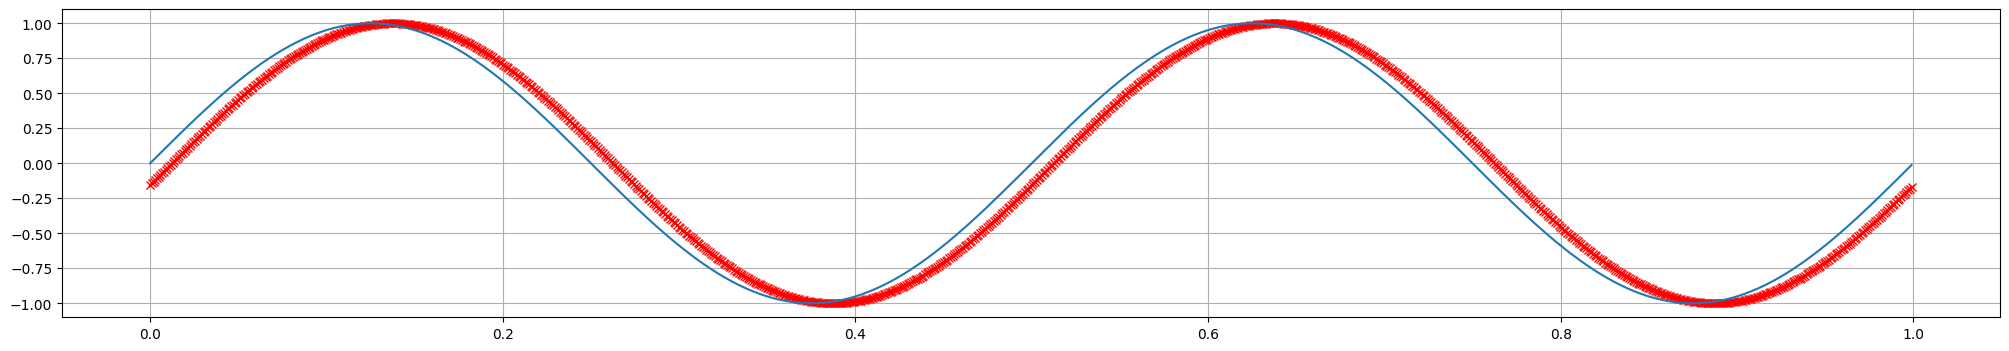

Vx[51] = 12.75


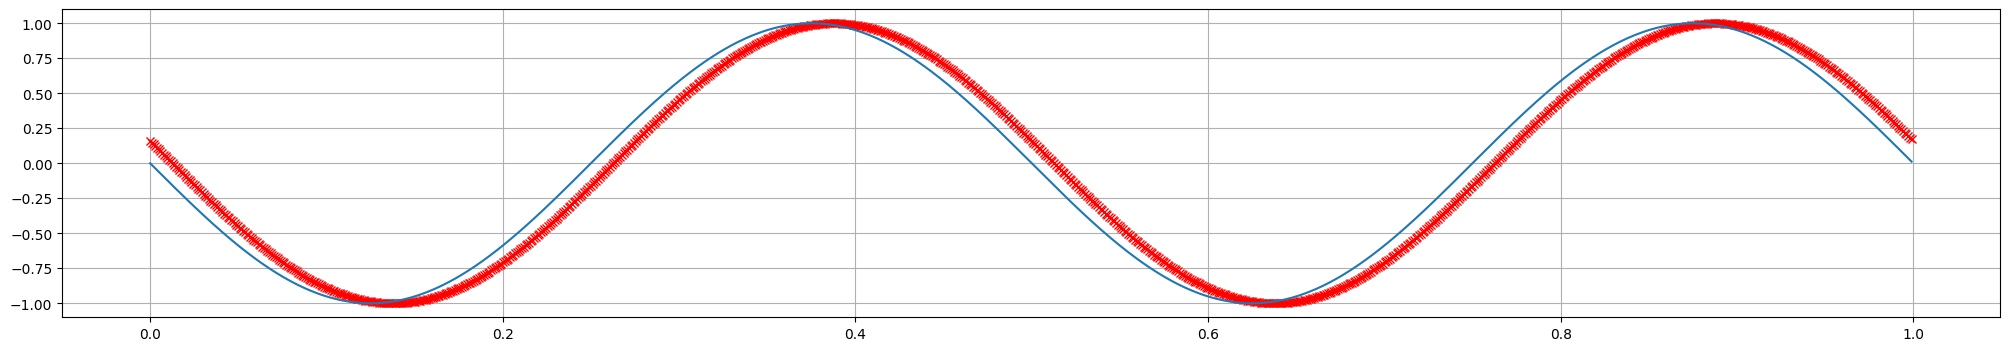

Vx[52] = 13.0


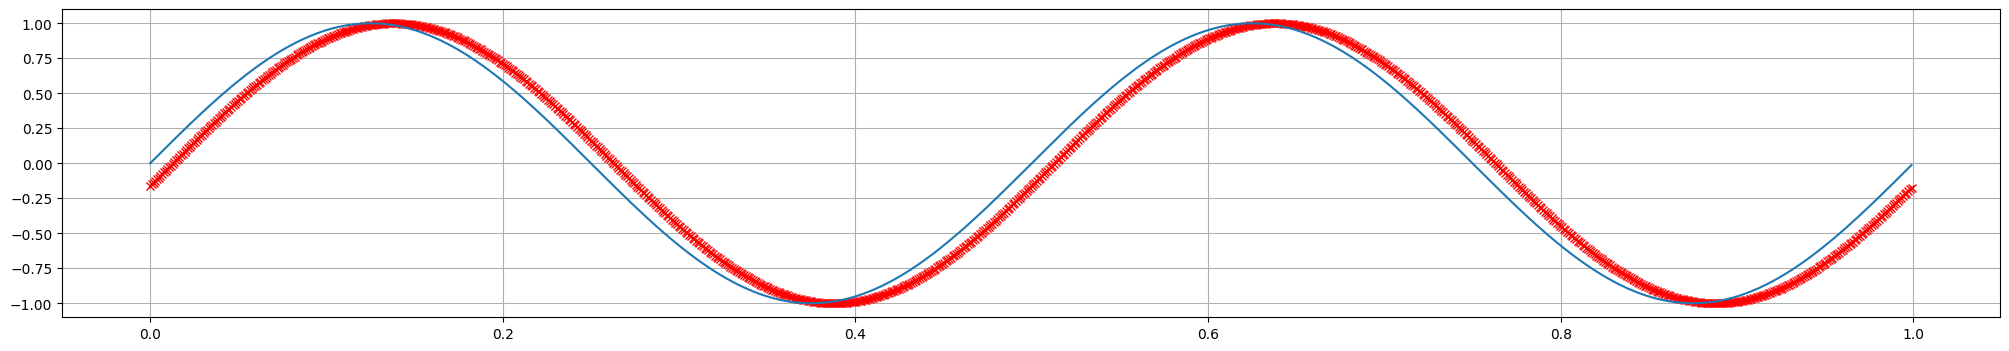

Vx[53] = 13.25


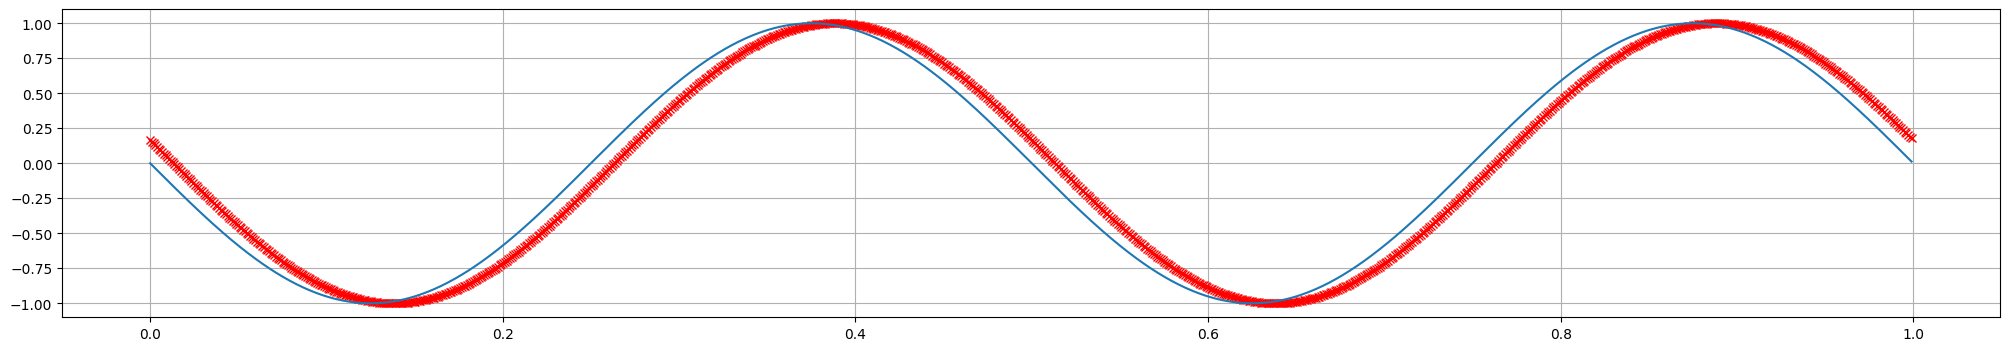

Vx[54] = 13.5


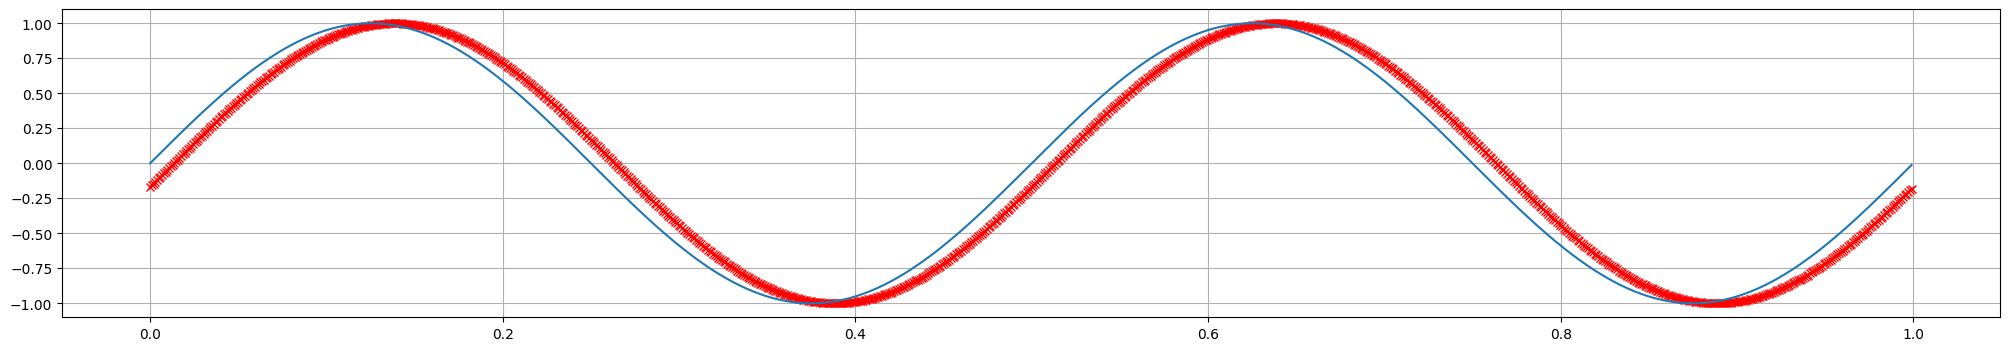

Vx[55] = 13.75


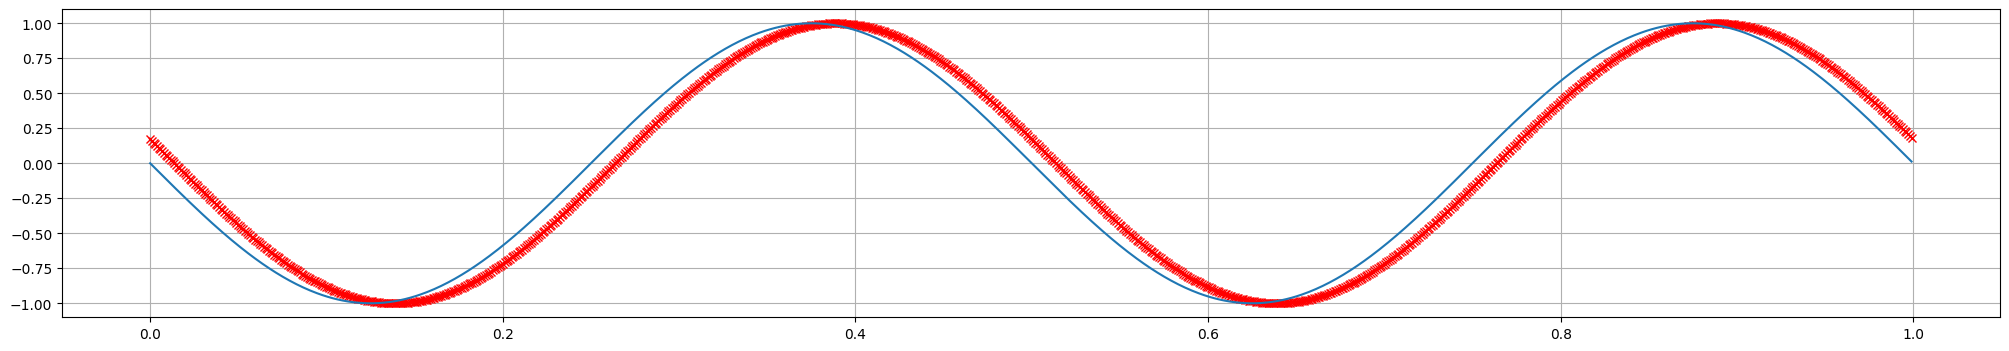

Vx[56] = 14.0


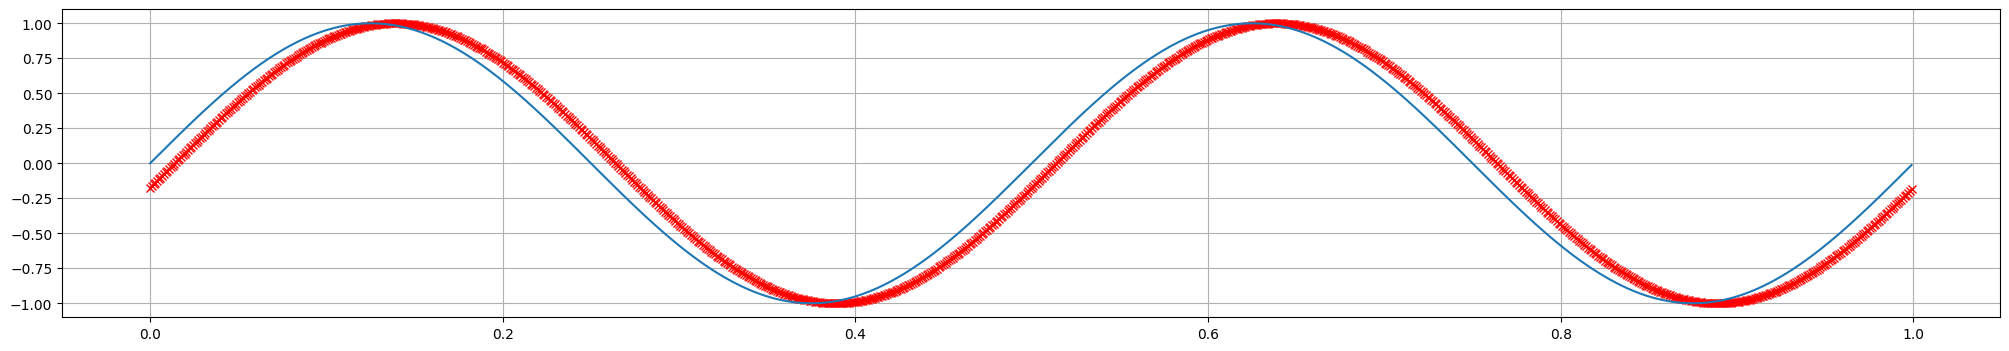

Vx[57] = 14.25


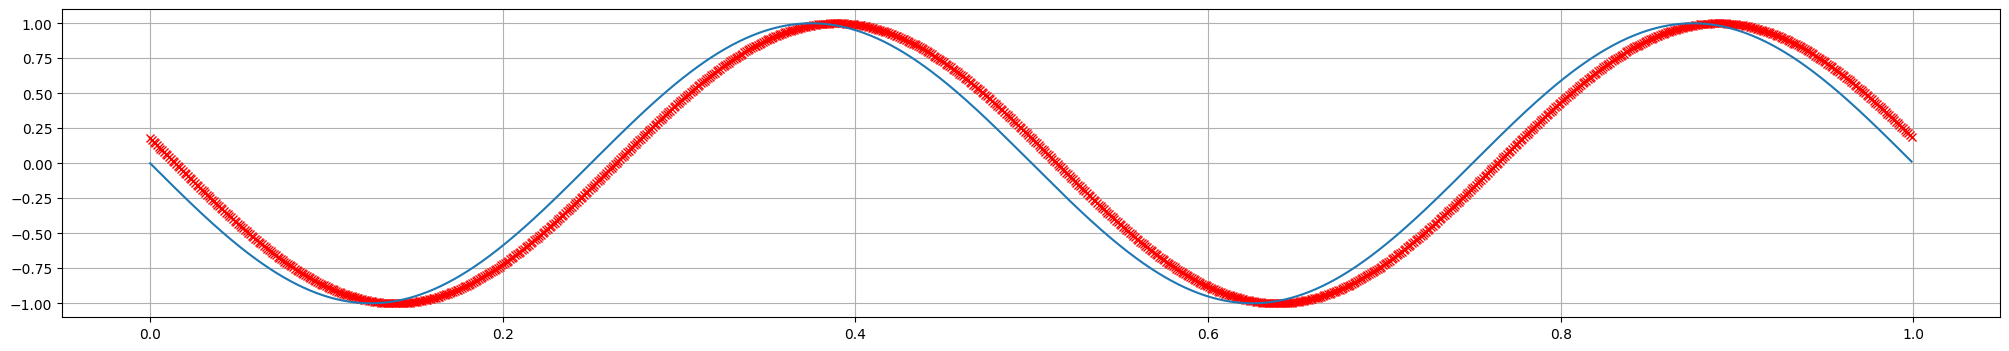

Vx[58] = 14.5


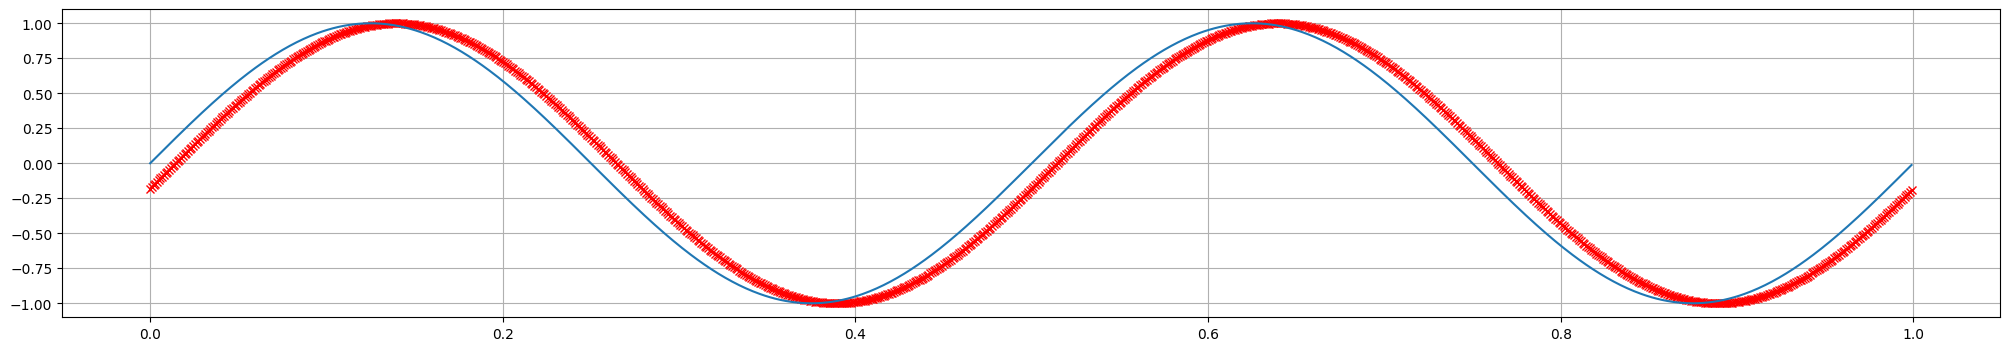

Vx[59] = 14.75


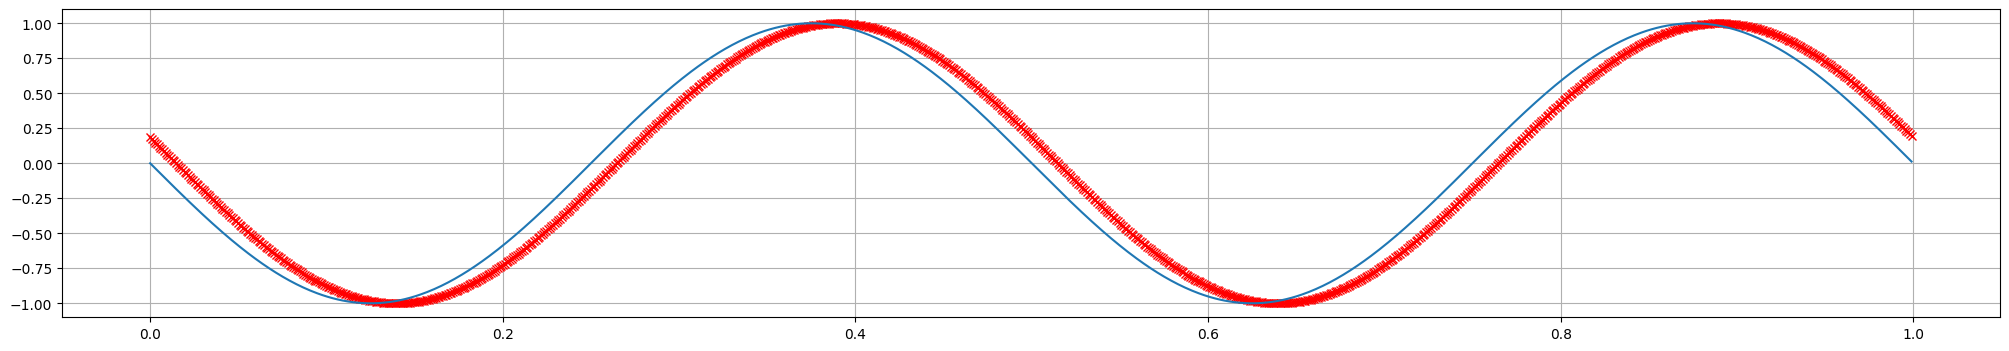

Vx[60] = 15.0


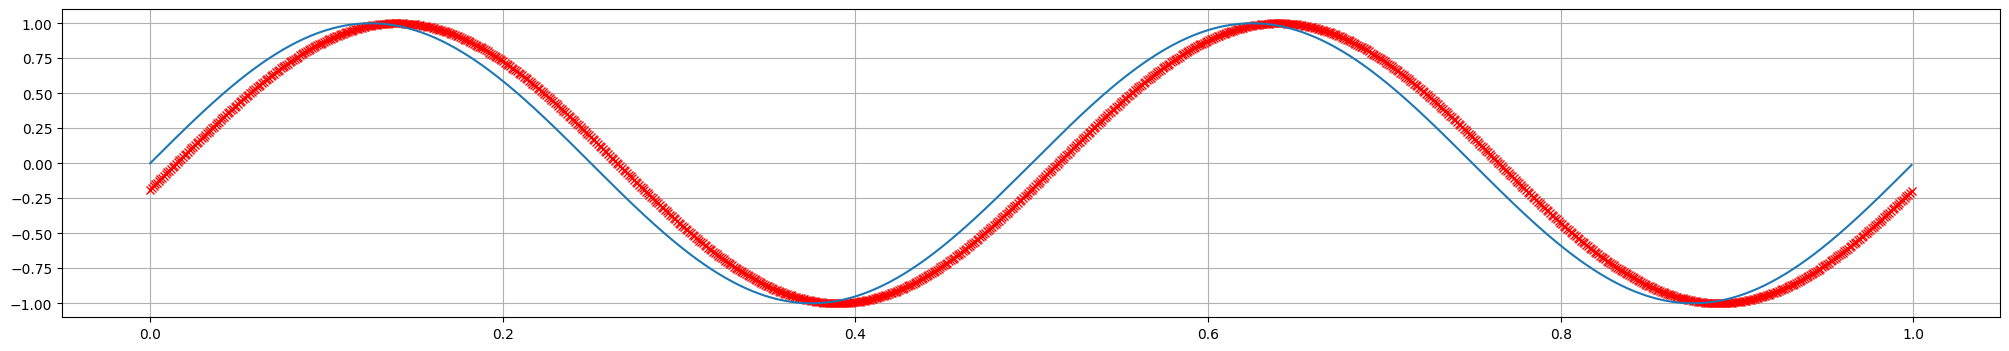

Vx[61] = 15.25


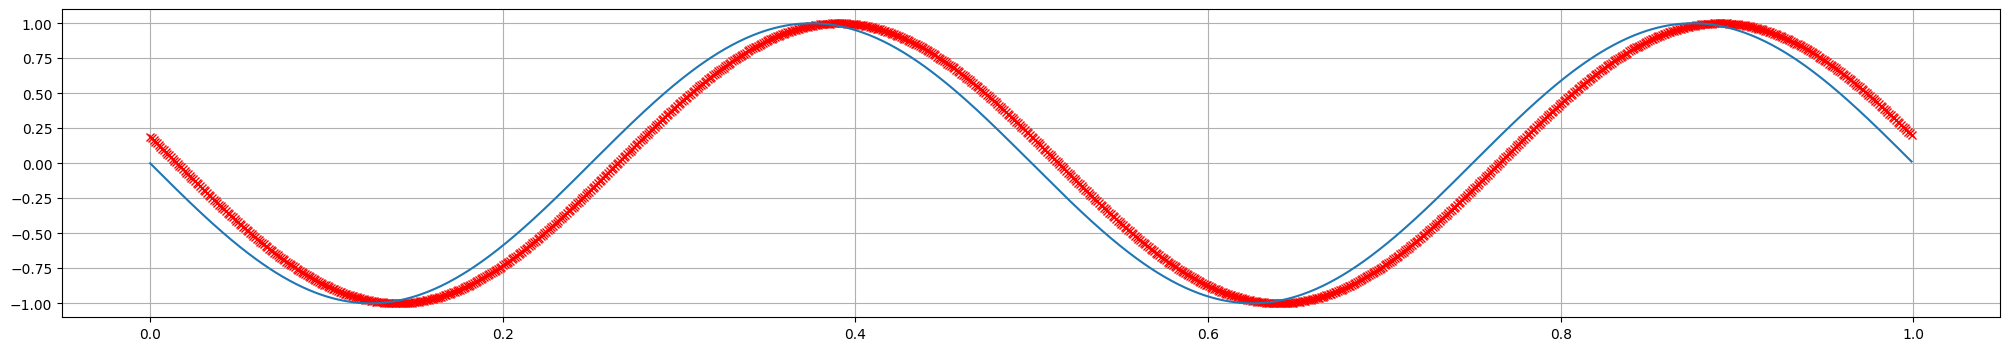

Vx[62] = 15.5


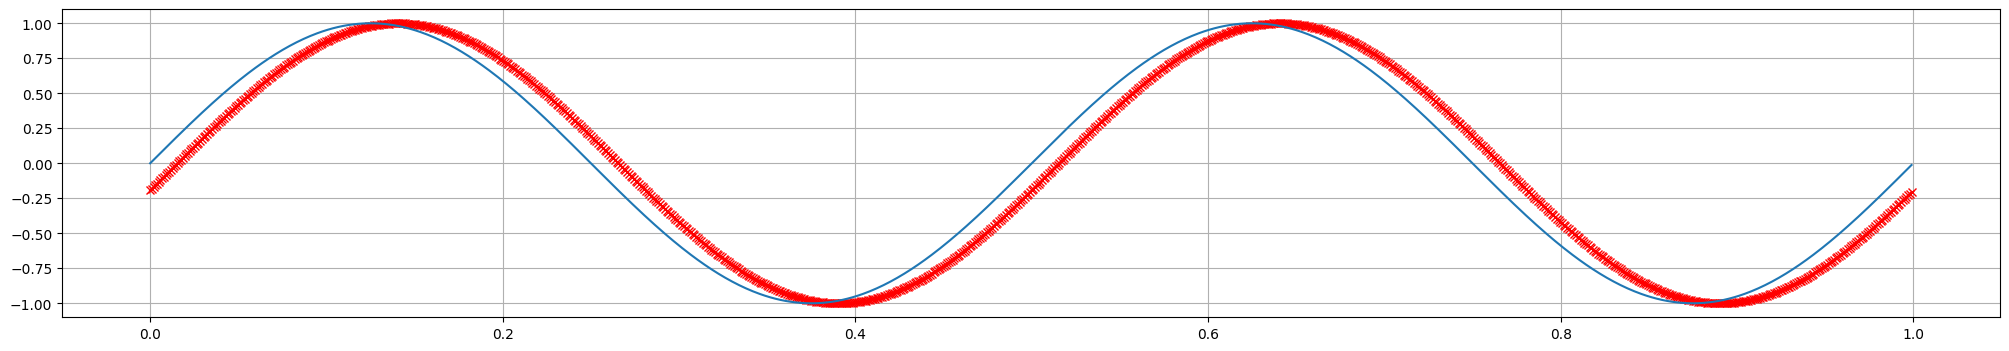

Vx[63] = 15.75


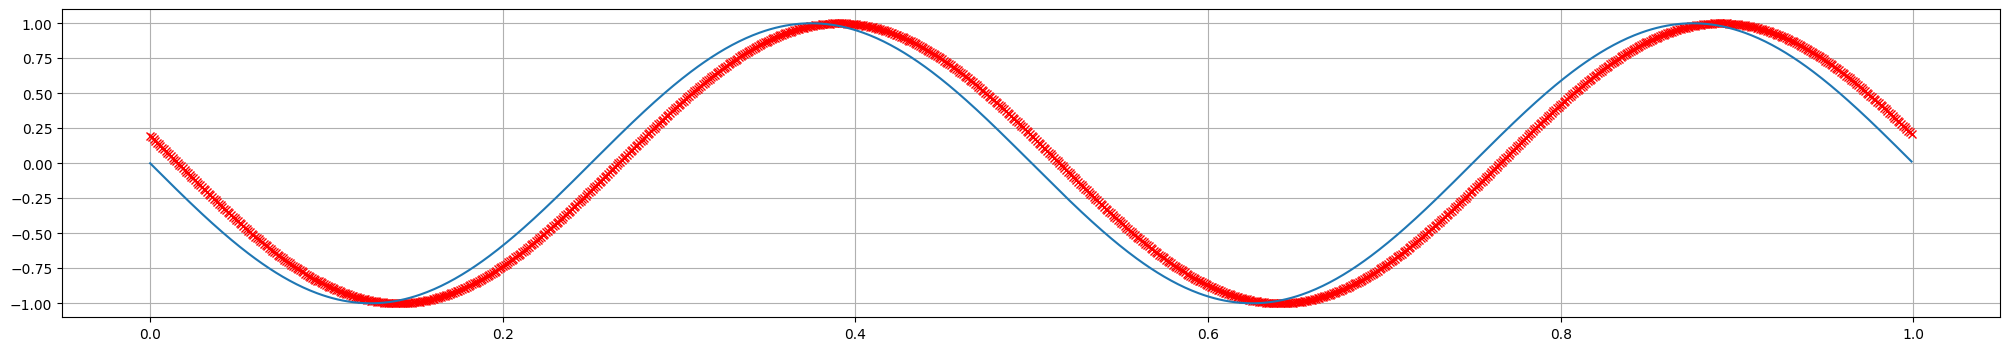

Vx[64] = 16.0


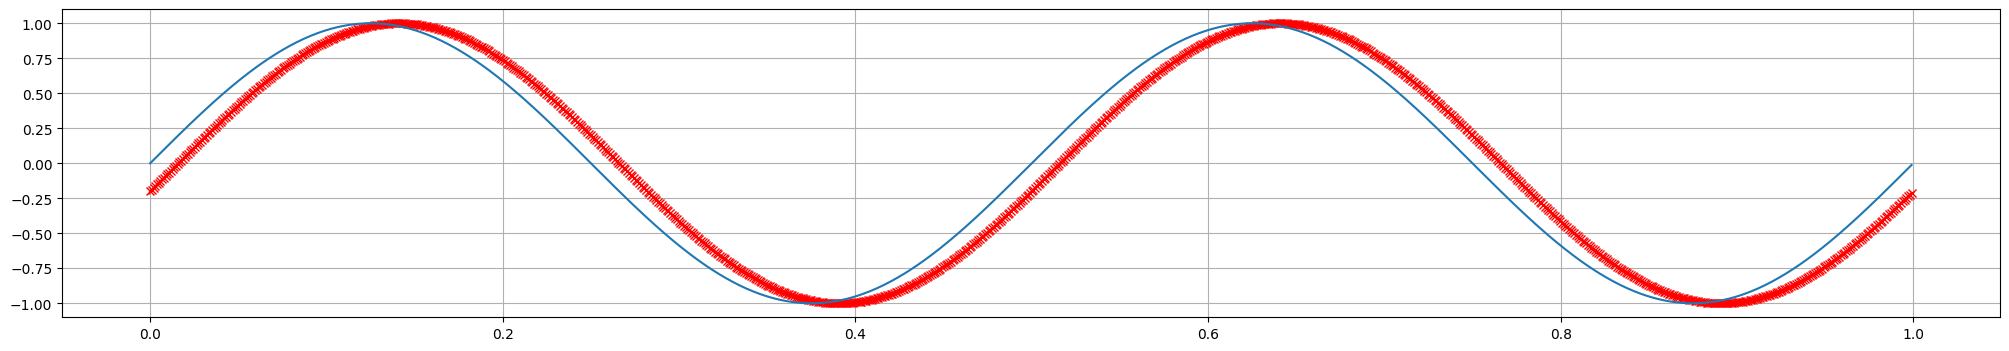

Vx[65] = 16.25


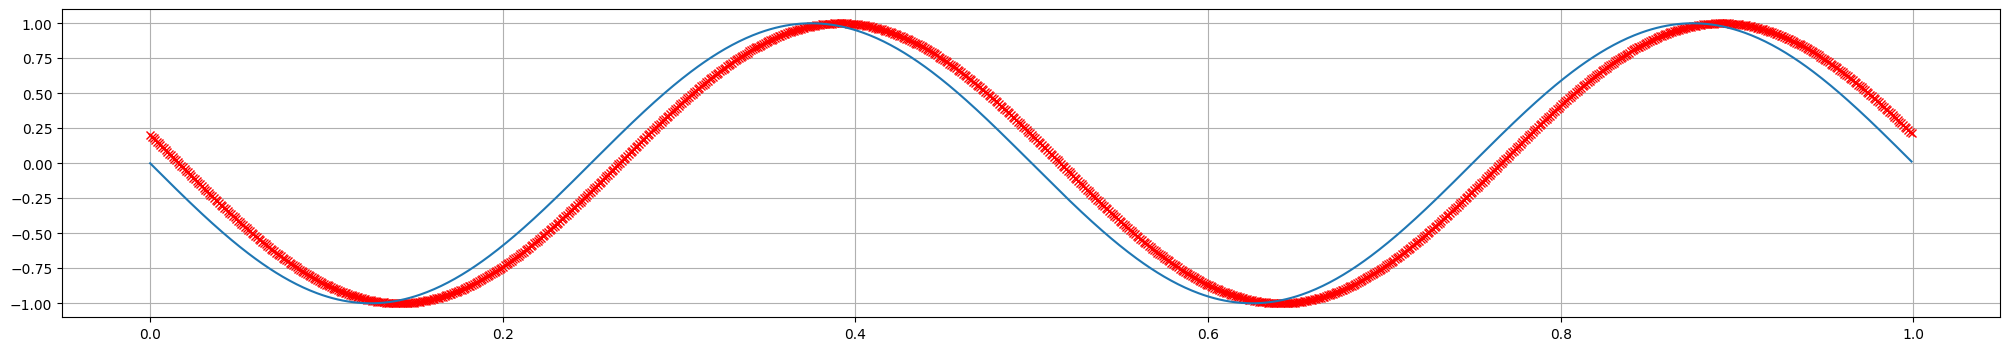

Vx[66] = 16.5


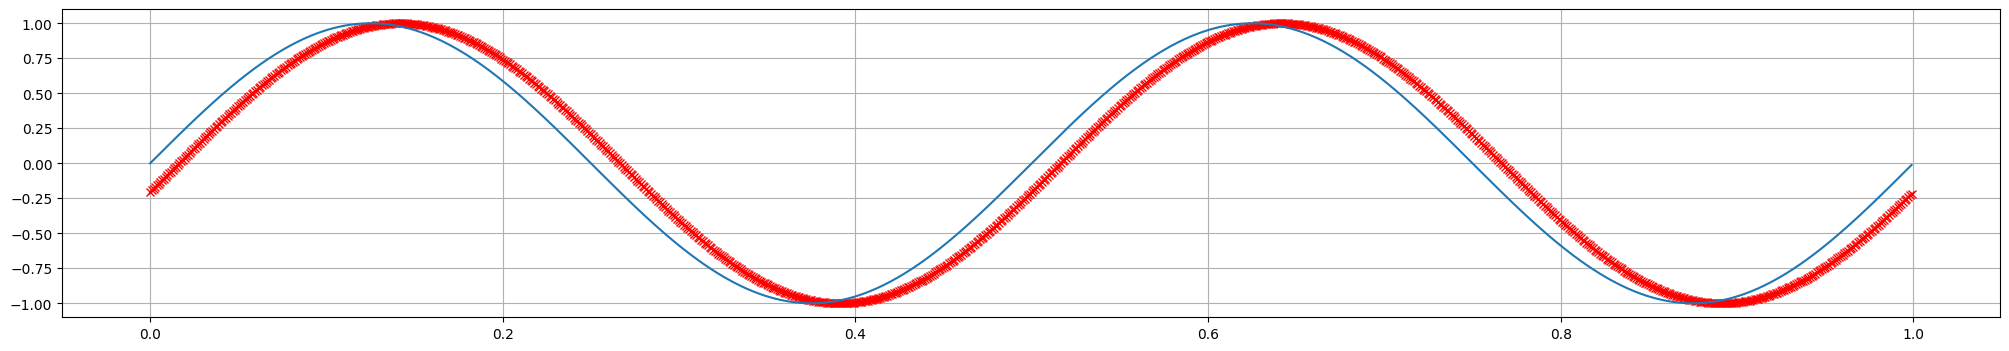

Vx[67] = 16.75


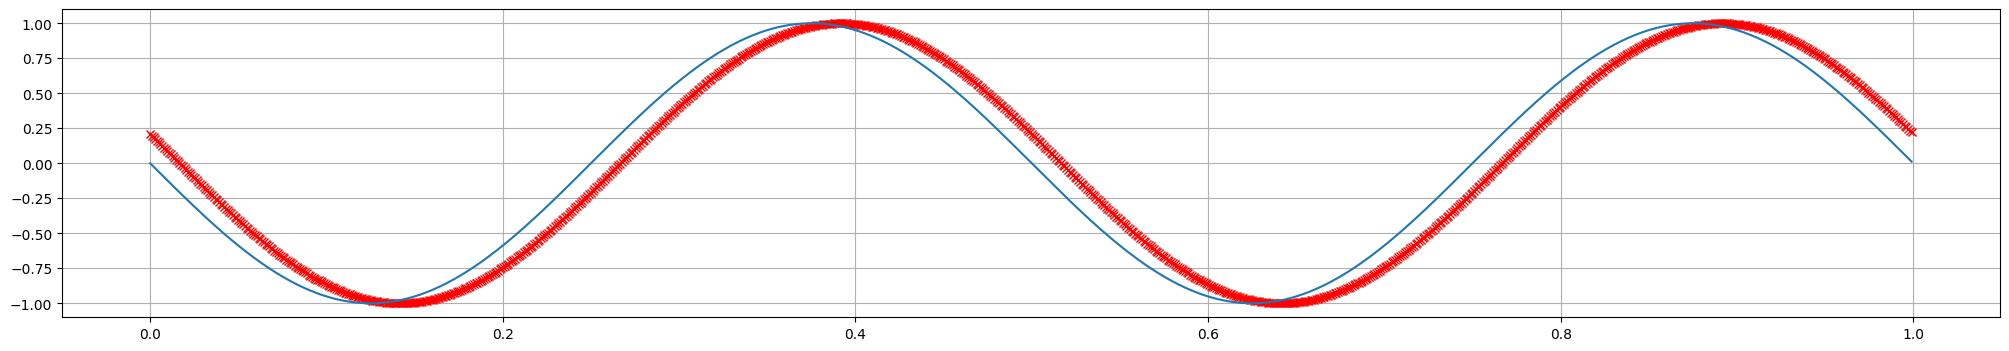

Vx[68] = 17.0


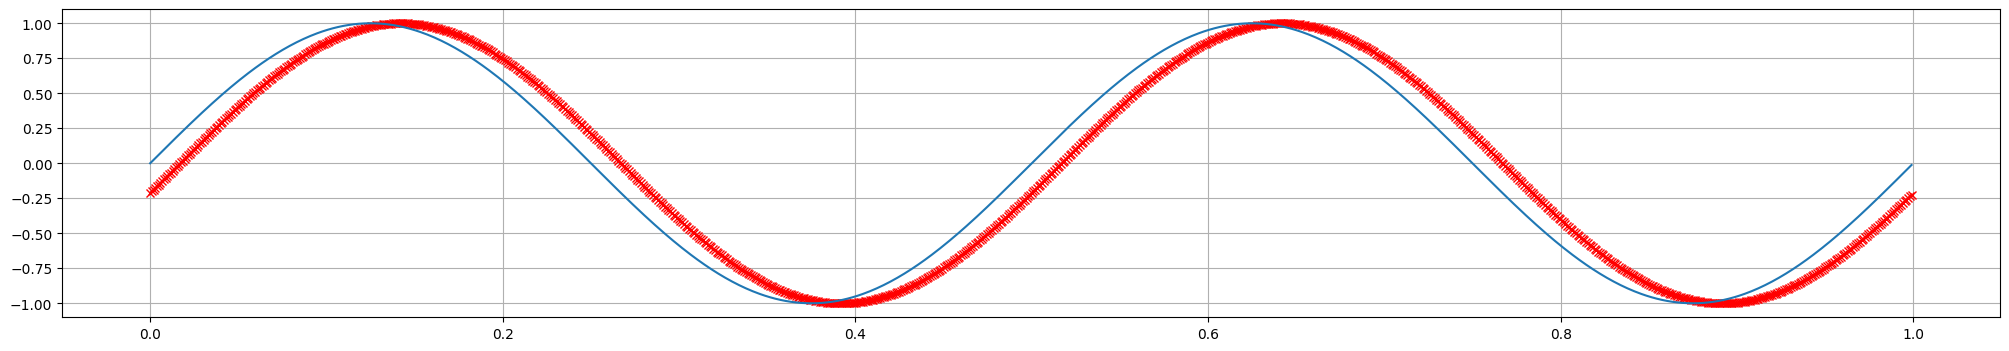

Vx[69] = 17.25


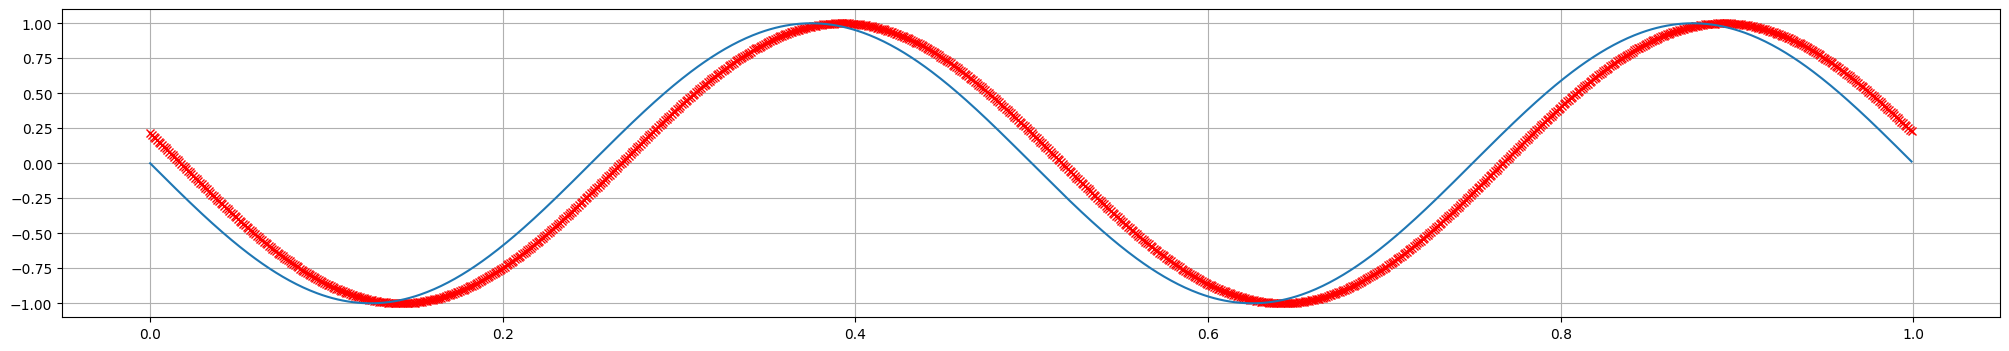

Vx[70] = 17.5


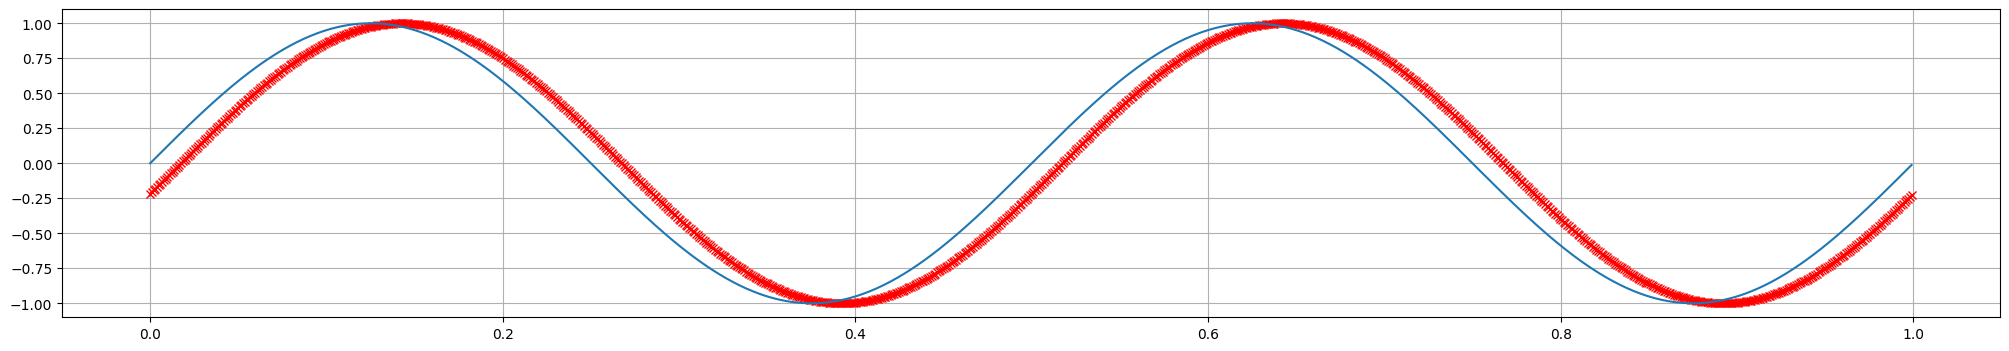

Vx[71] = 17.75


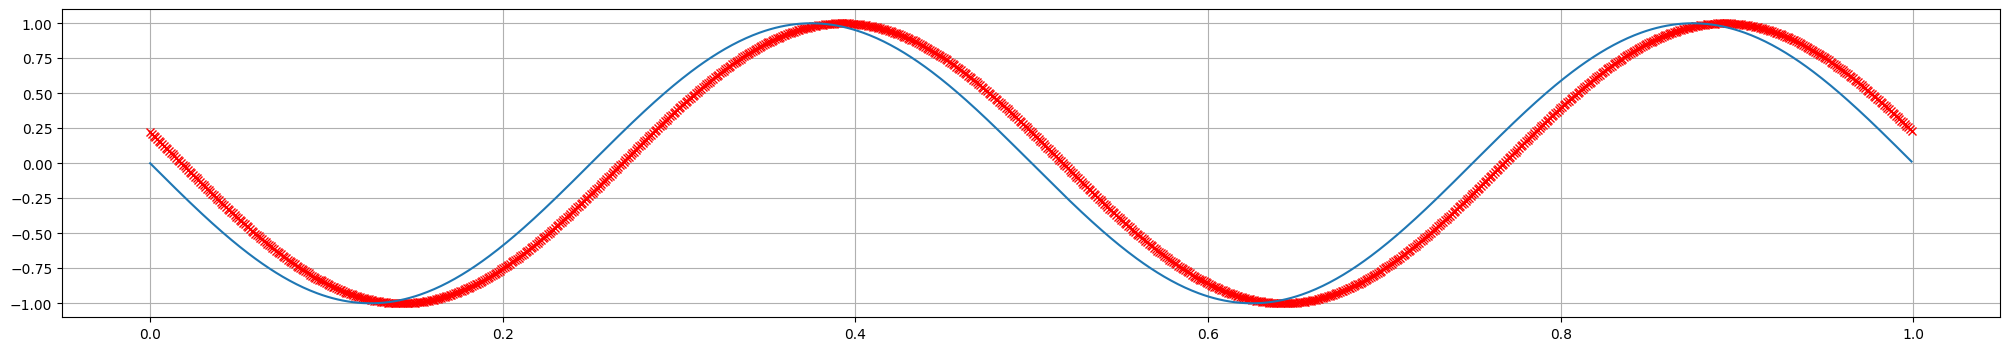

Vx[72] = 18.0


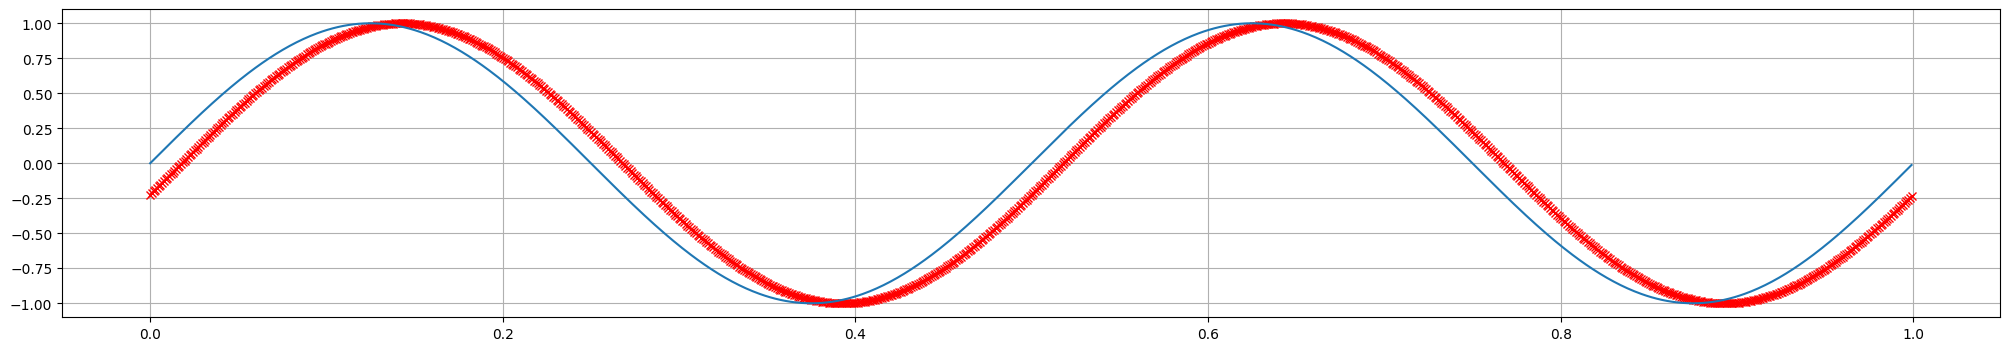

Vx[73] = 18.25


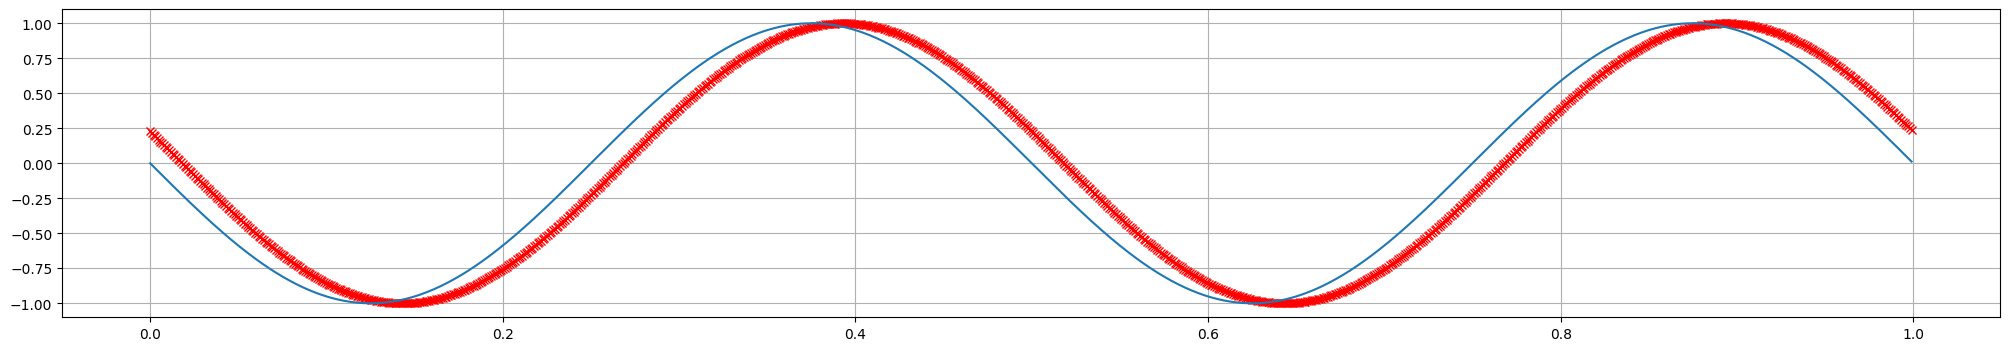

Vx[74] = 18.5


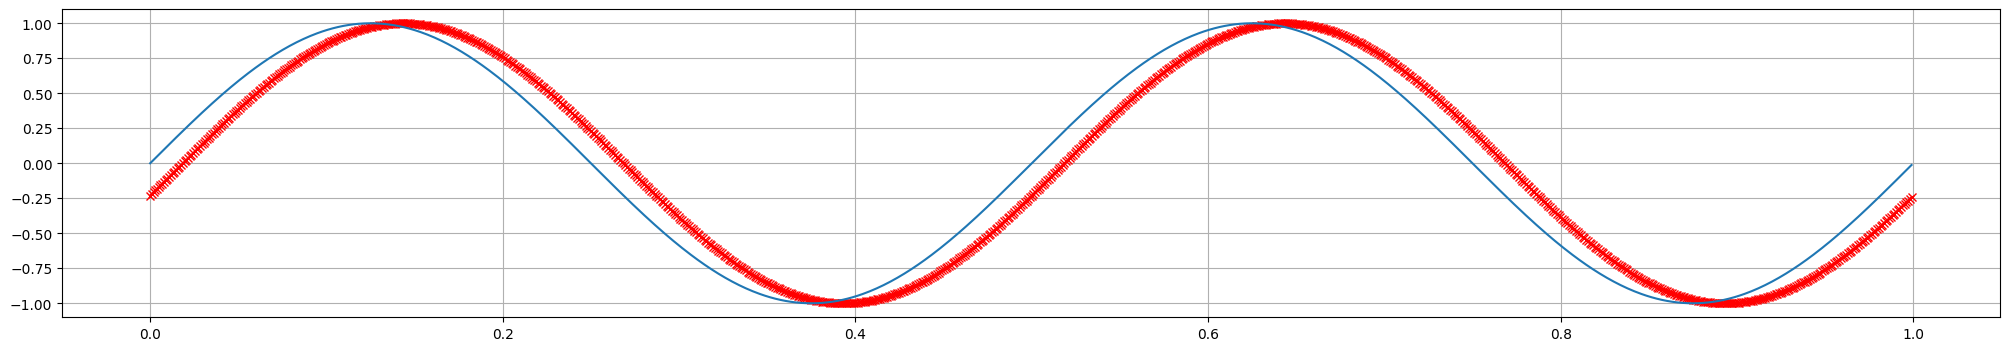

Vx[75] = 18.75


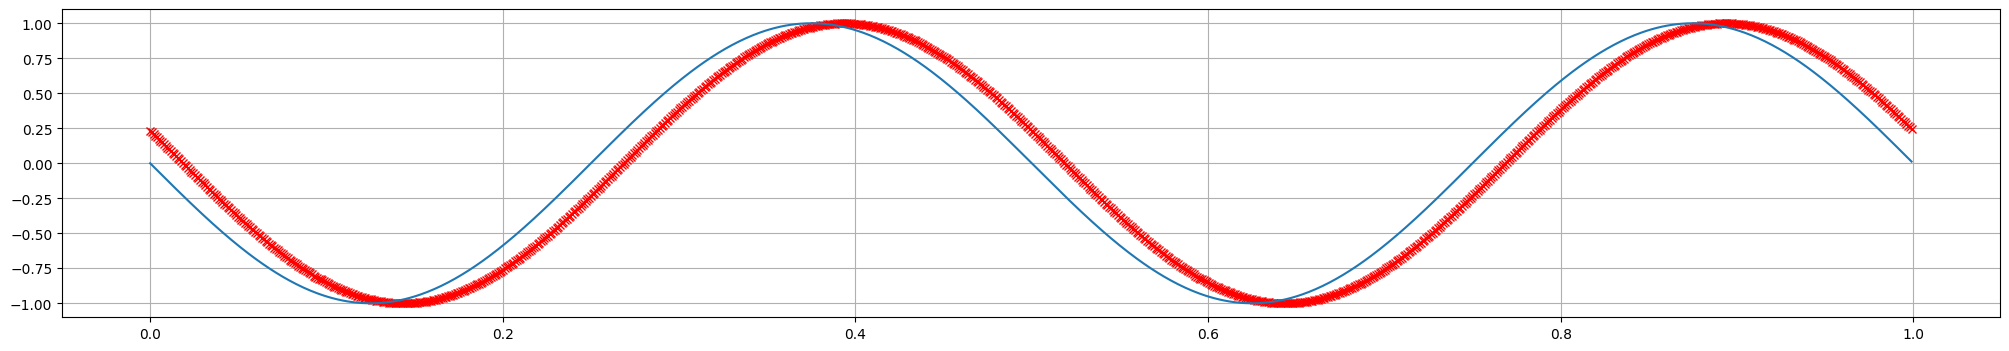

Vx[76] = 19.0


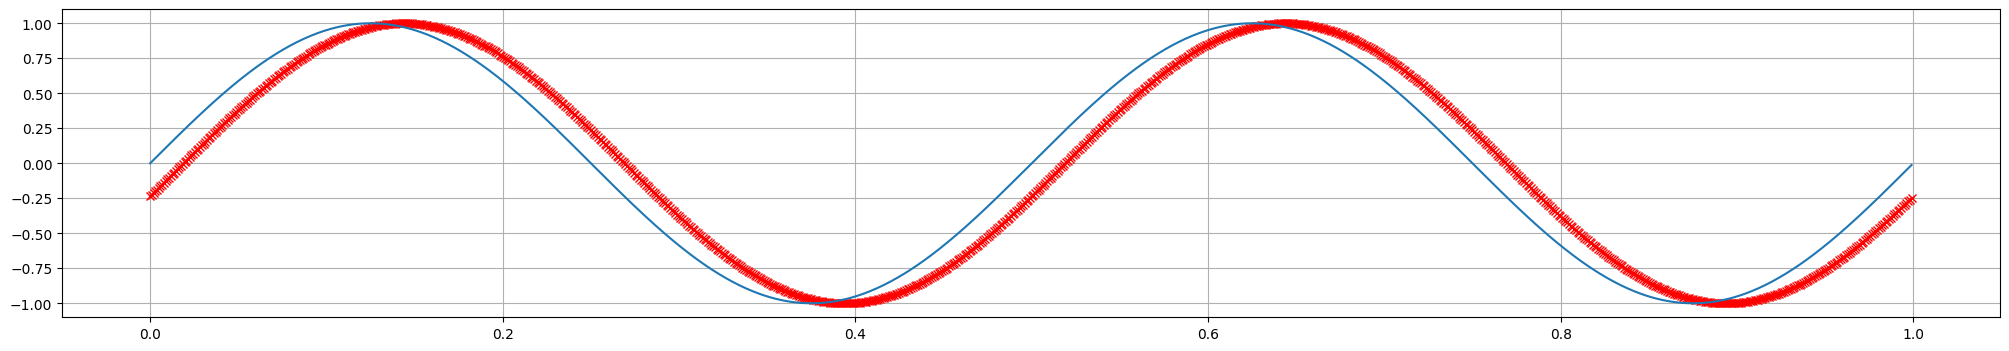

Vx[77] = 19.25


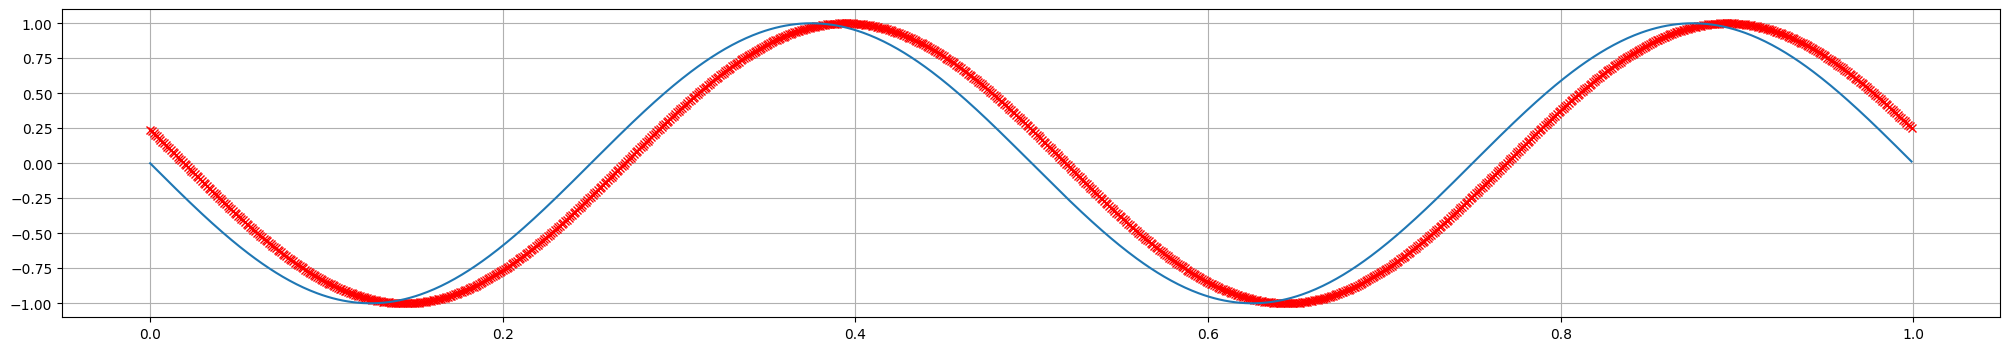

Vx[78] = 19.5


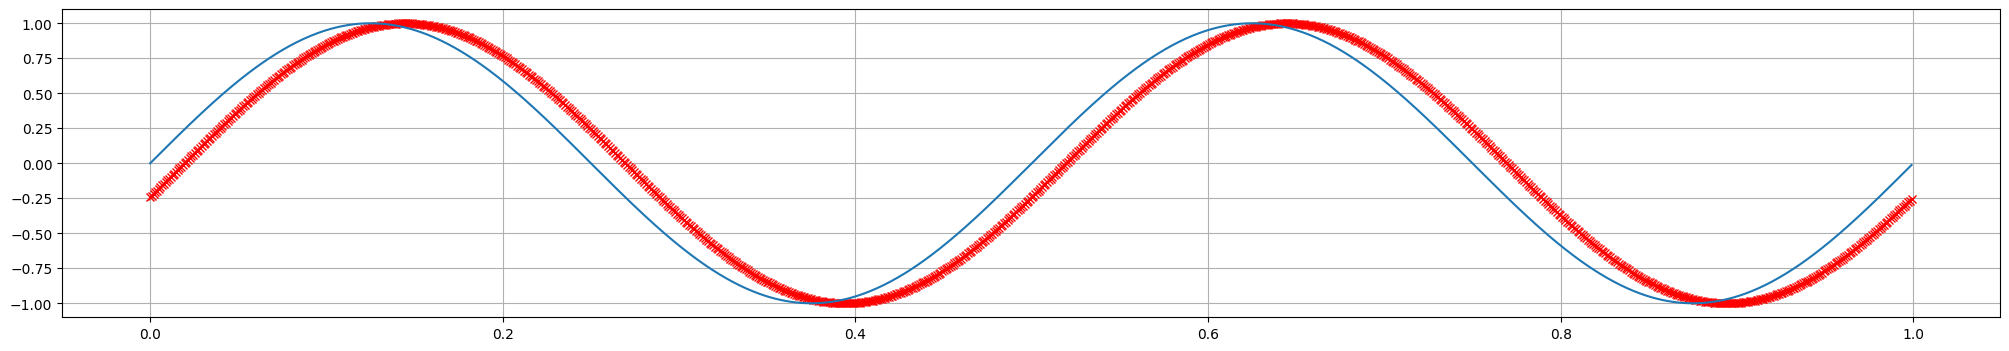

Vx[79] = 19.75


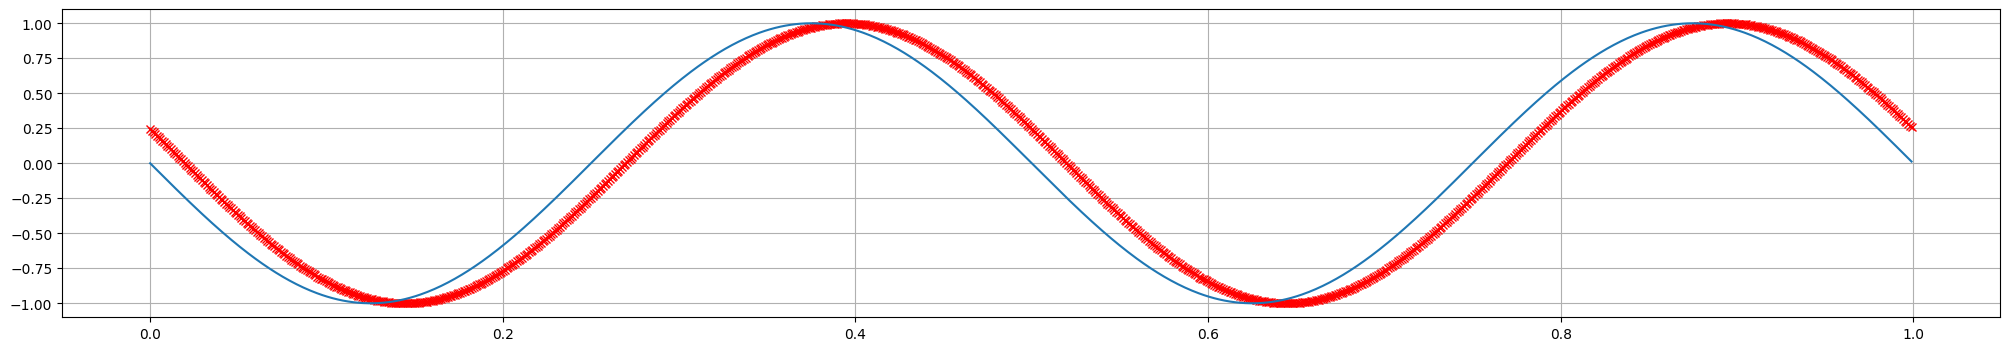

Vx[80] = 20.0


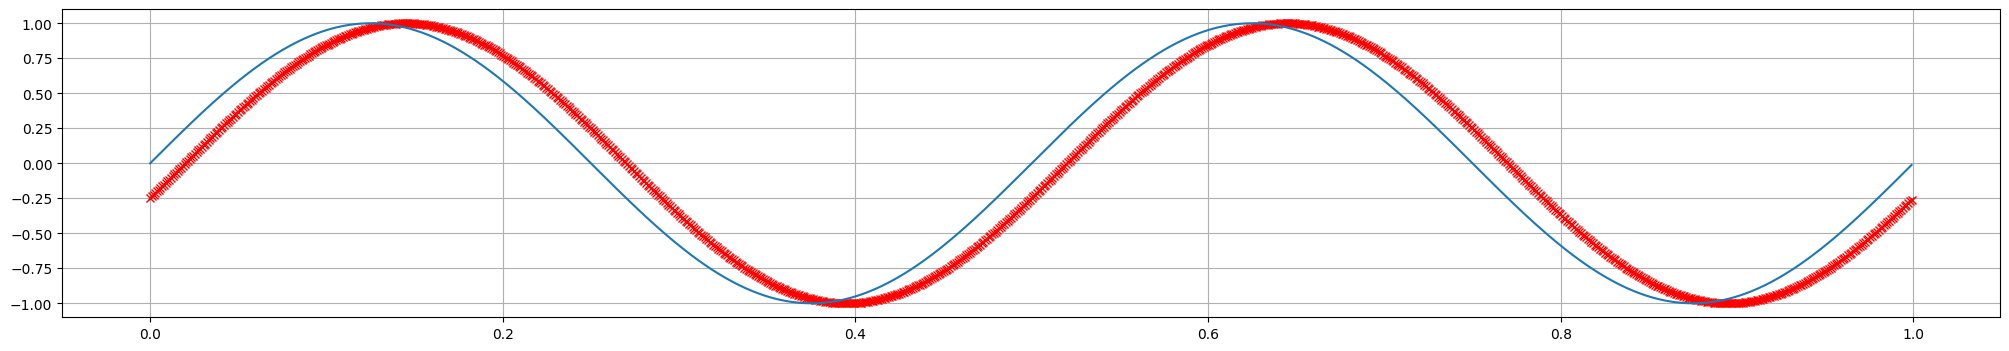

Vx[81] = 20.25


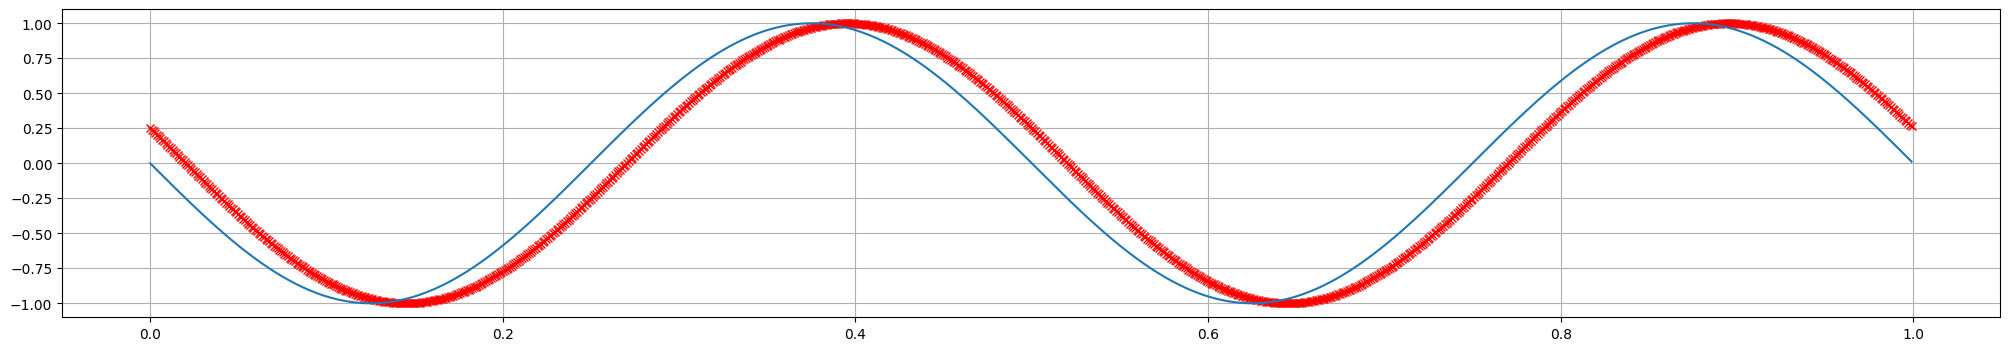

Vx[82] = 20.5


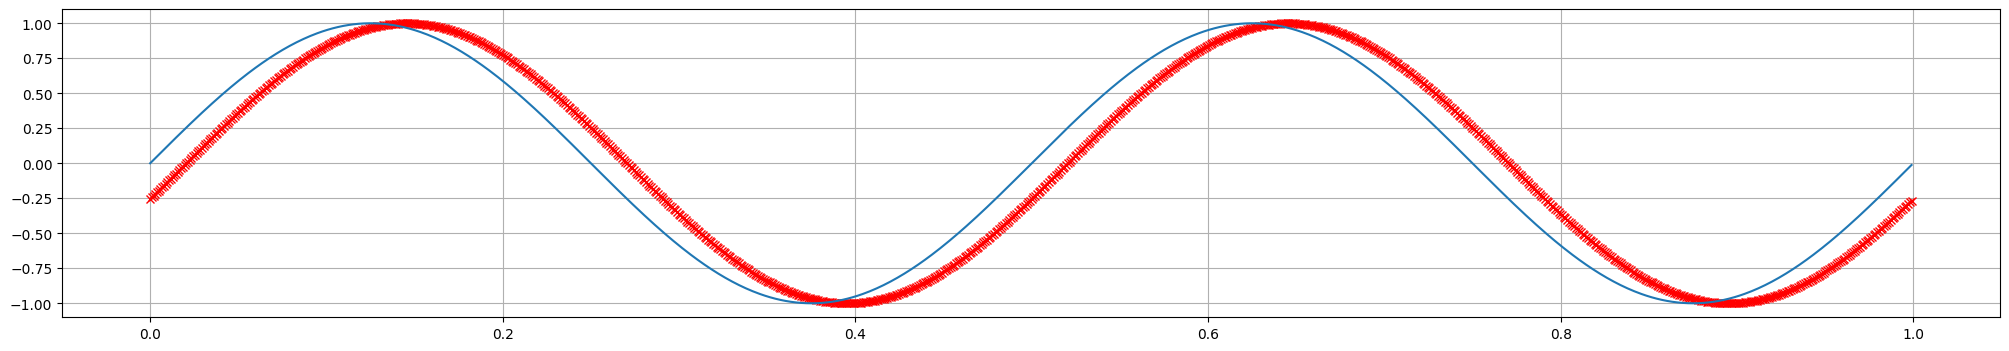

Vx[83] = 20.75


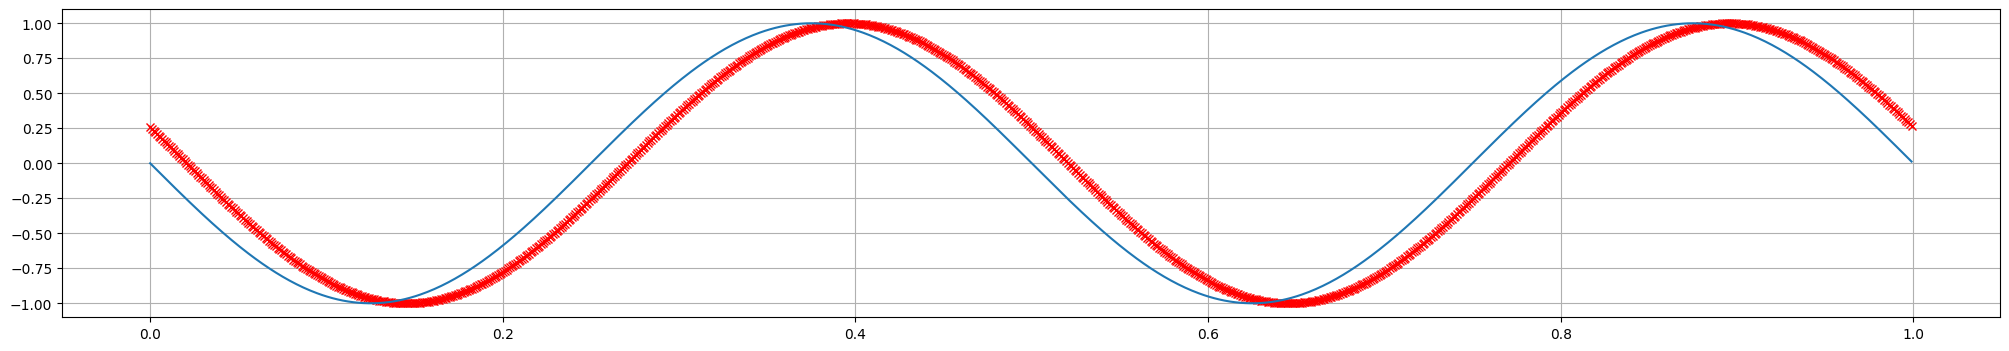

Vx[84] = 21.0


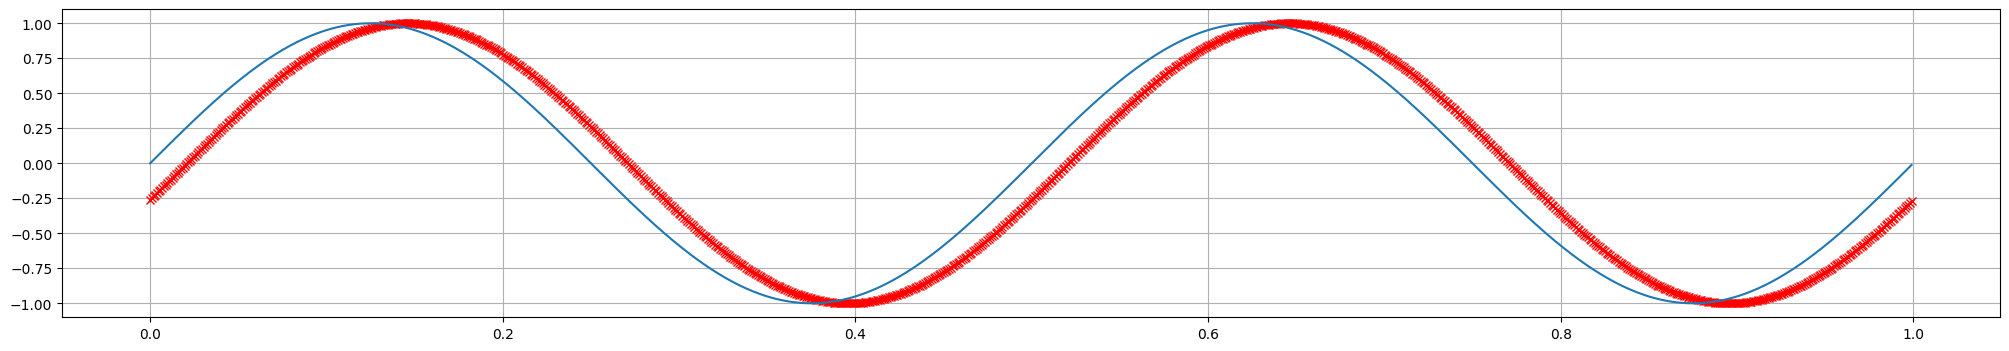

Vx[85] = 21.25


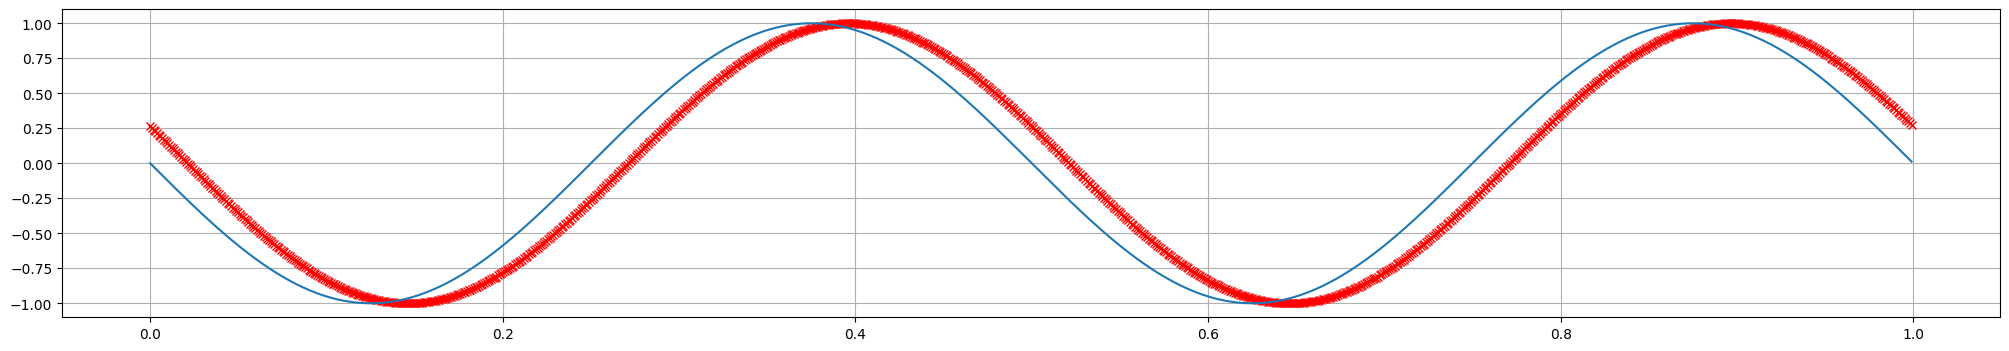

Vx[86] = 21.5


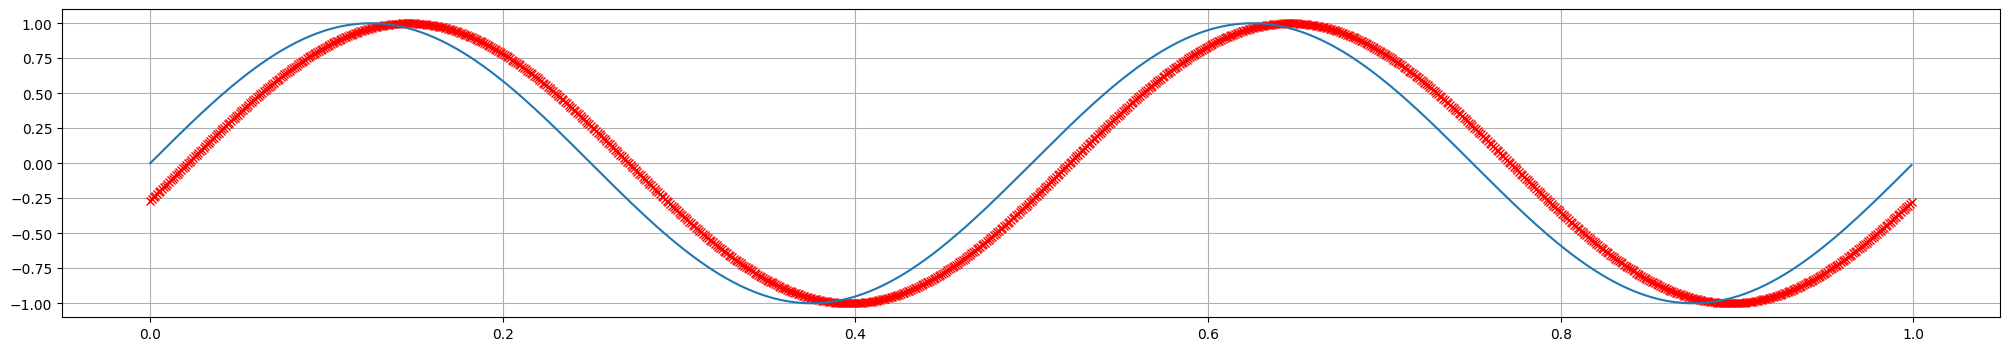

Vx[87] = 21.75


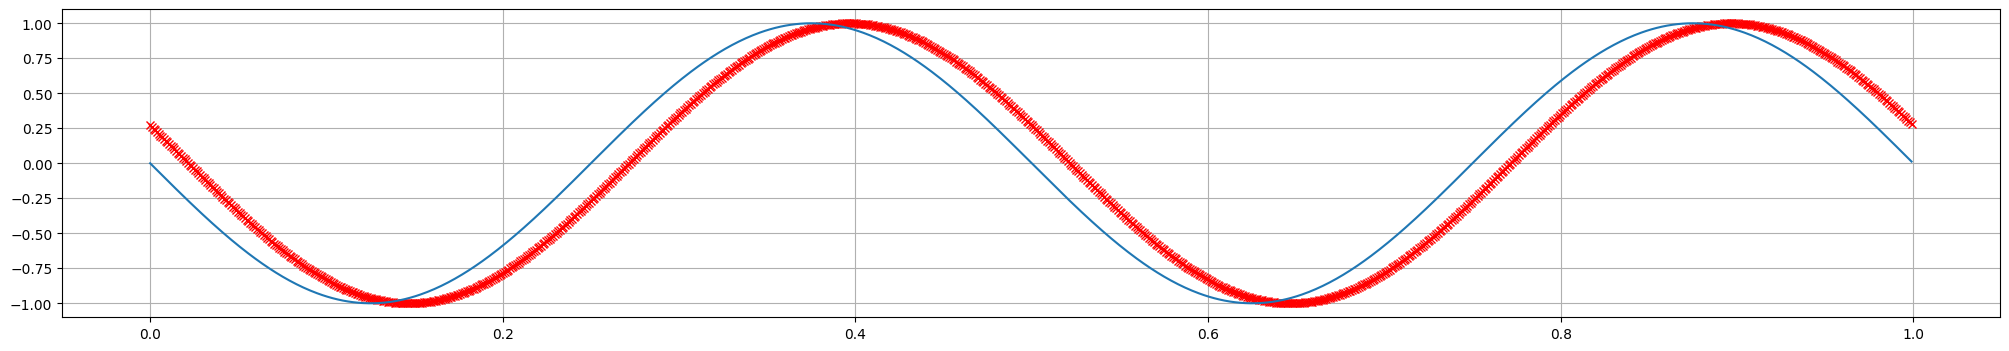

Vx[88] = 22.0


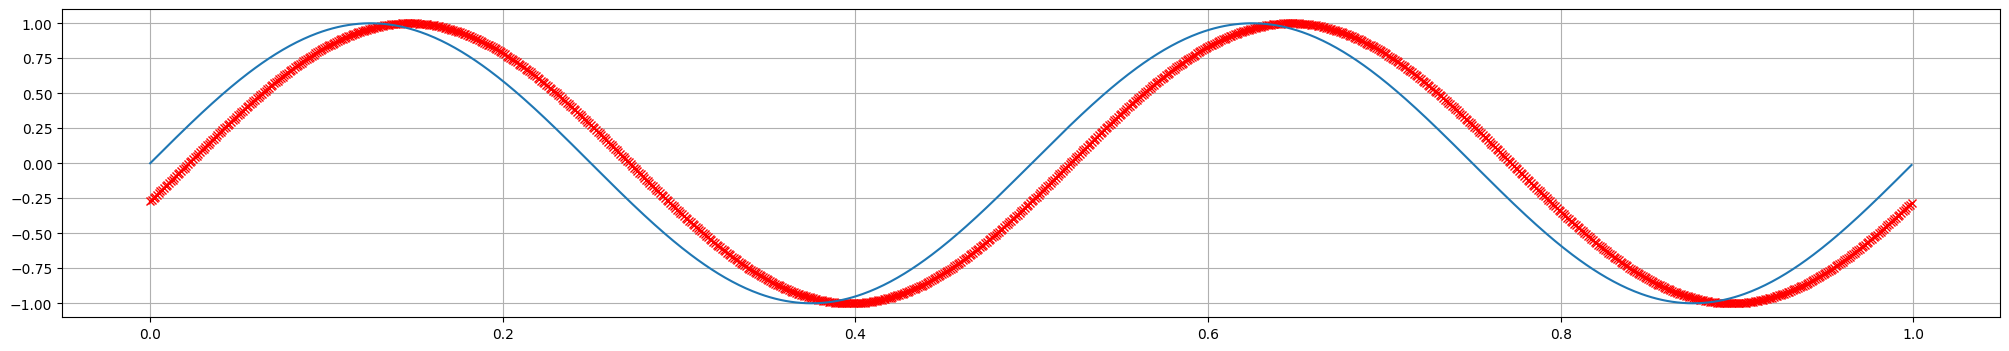

Vx[89] = 22.25


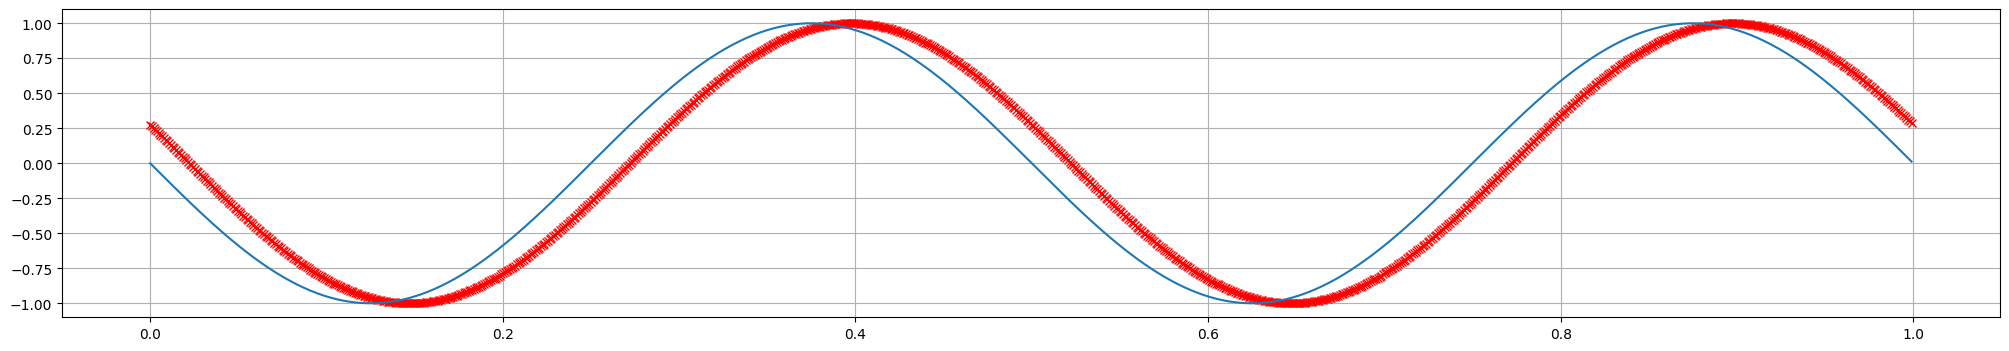

Vx[90] = 22.5


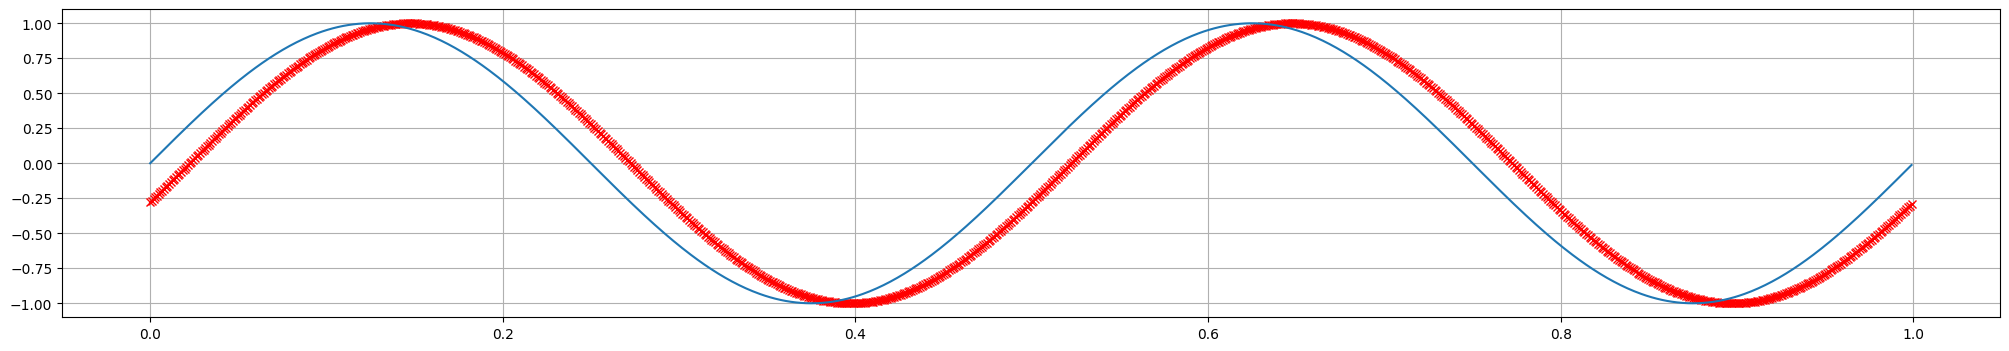

Vx[91] = 22.75


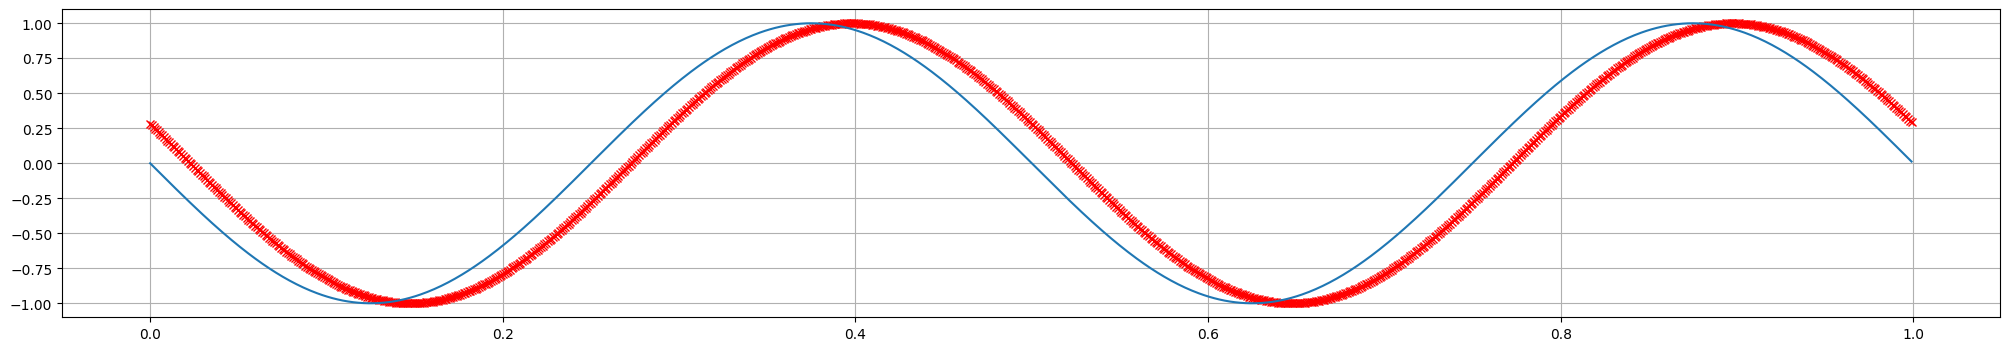

Vx[92] = 23.0


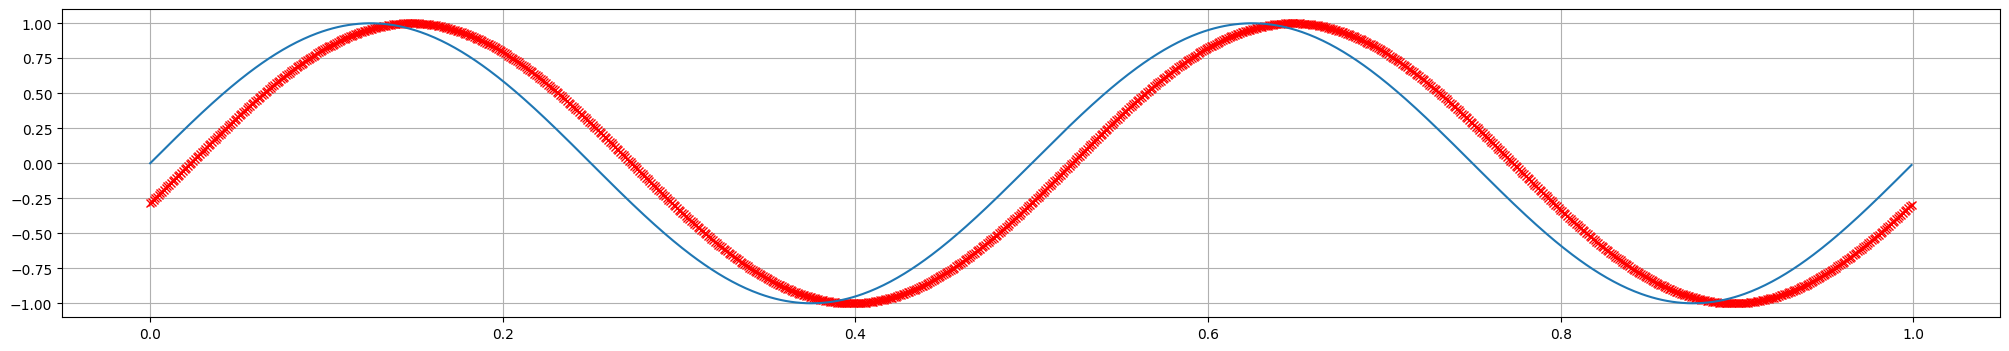

Vx[93] = 23.25


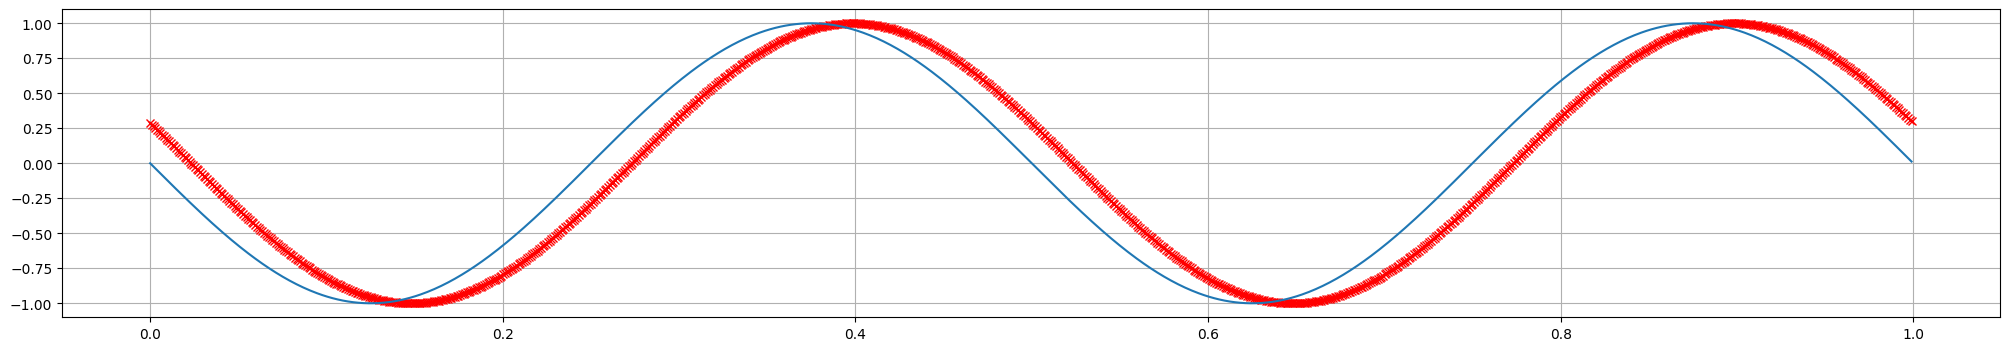

Vx[94] = 23.5


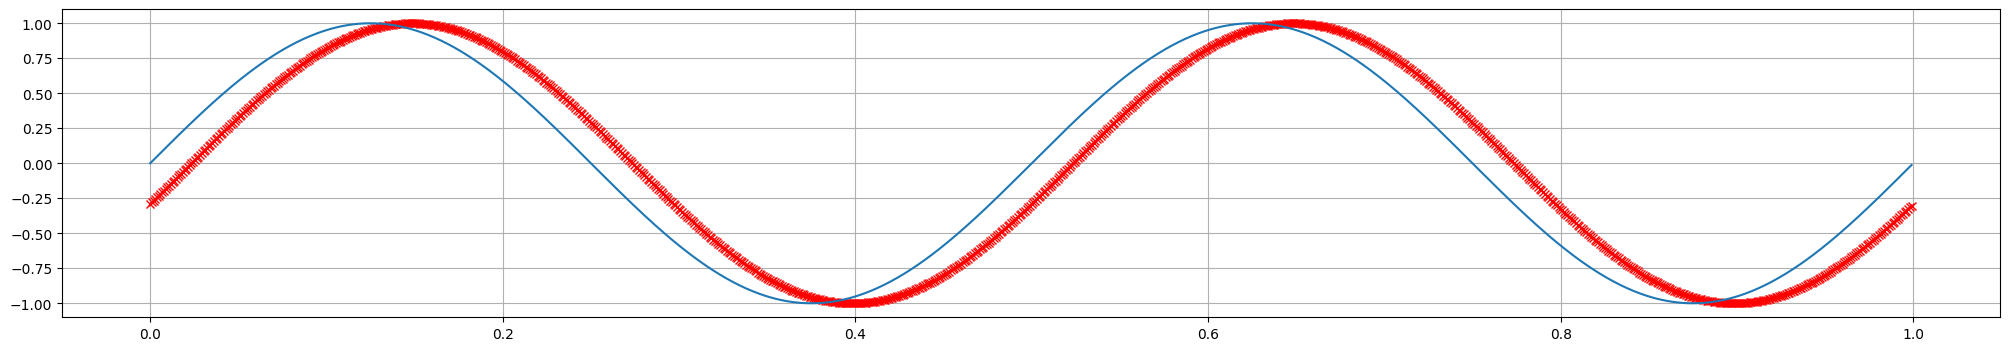

Vx[95] = 23.75


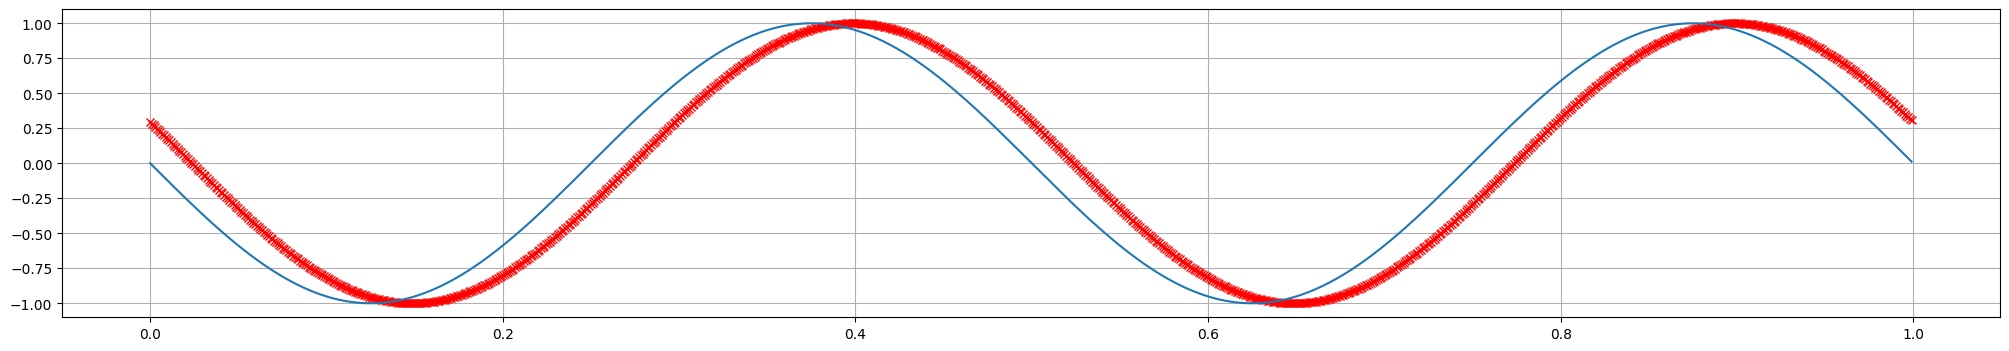

Vx[96] = 24.0


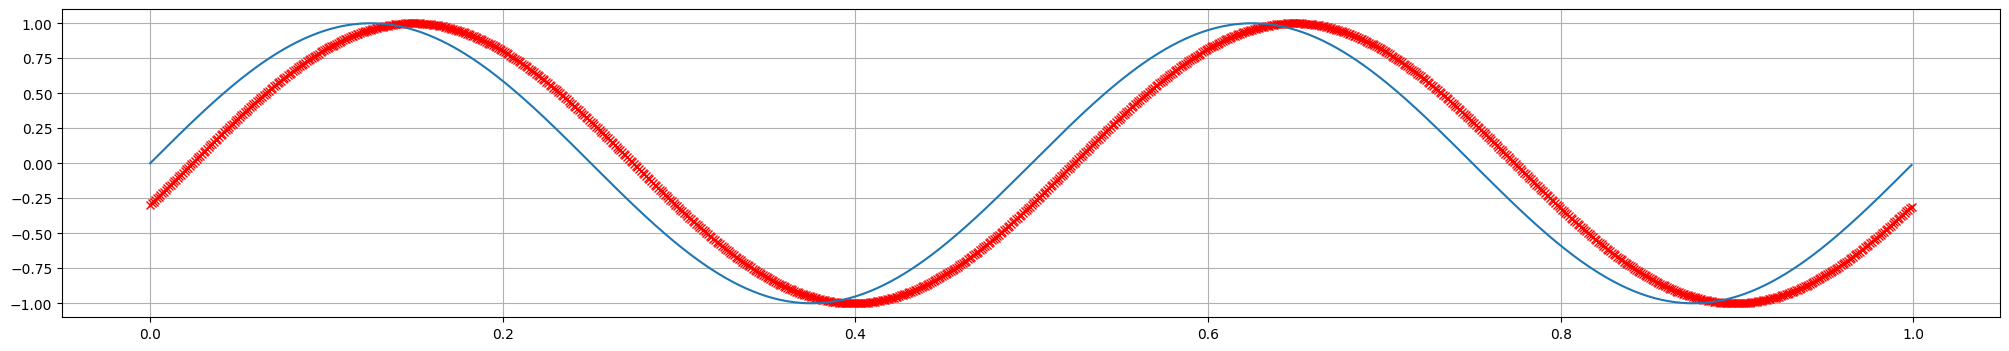

Vx[97] = 24.25


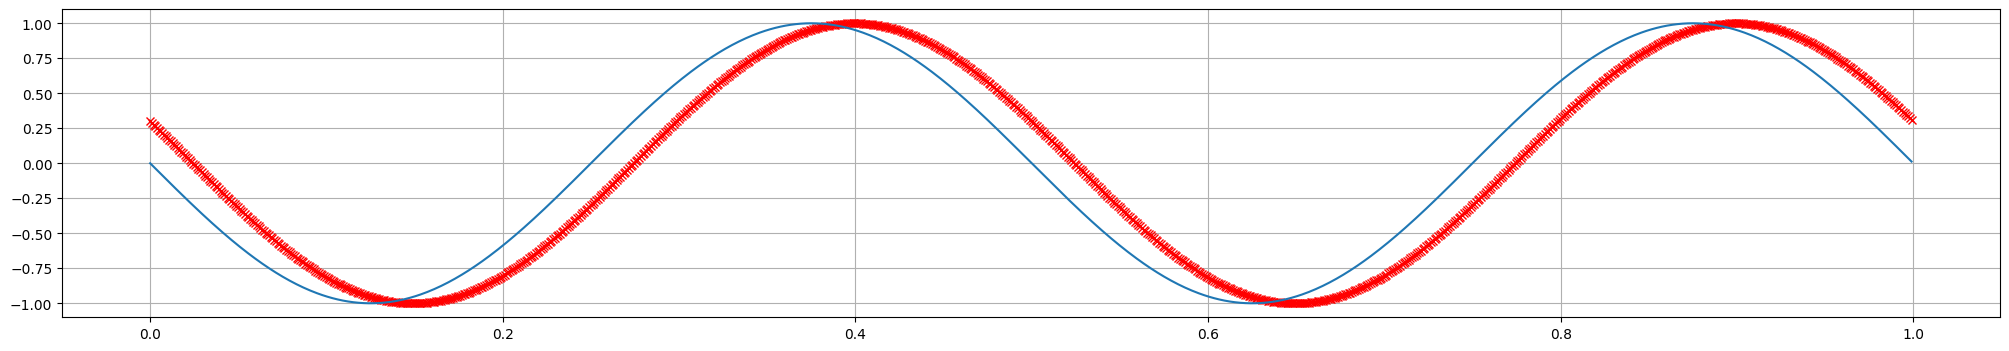

Vx[98] = 24.5


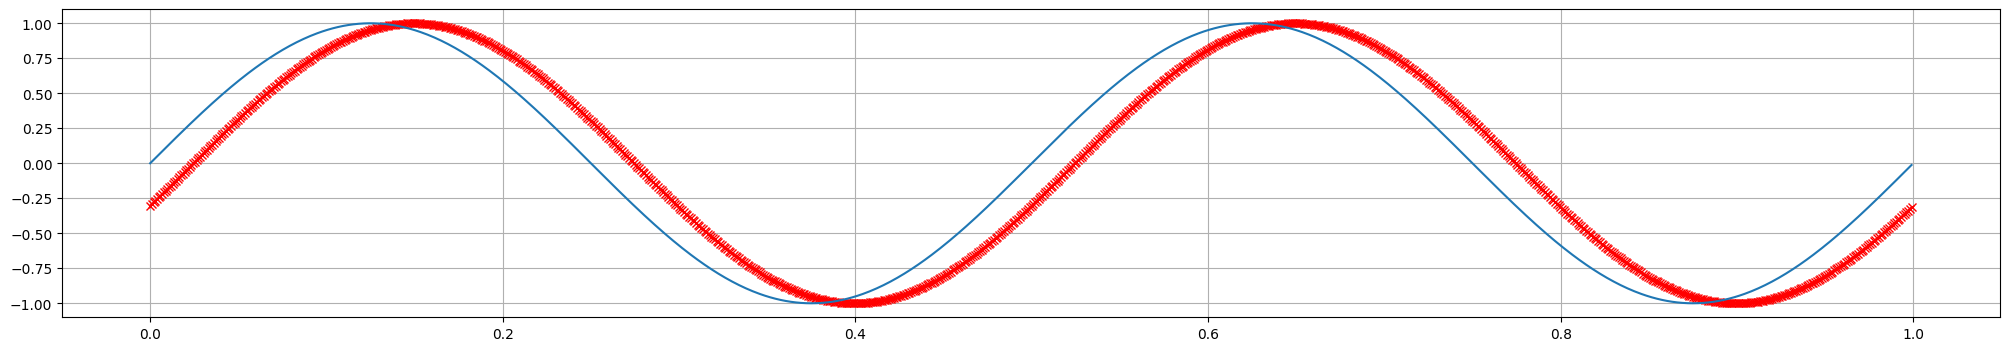

Vx[99] = 24.75


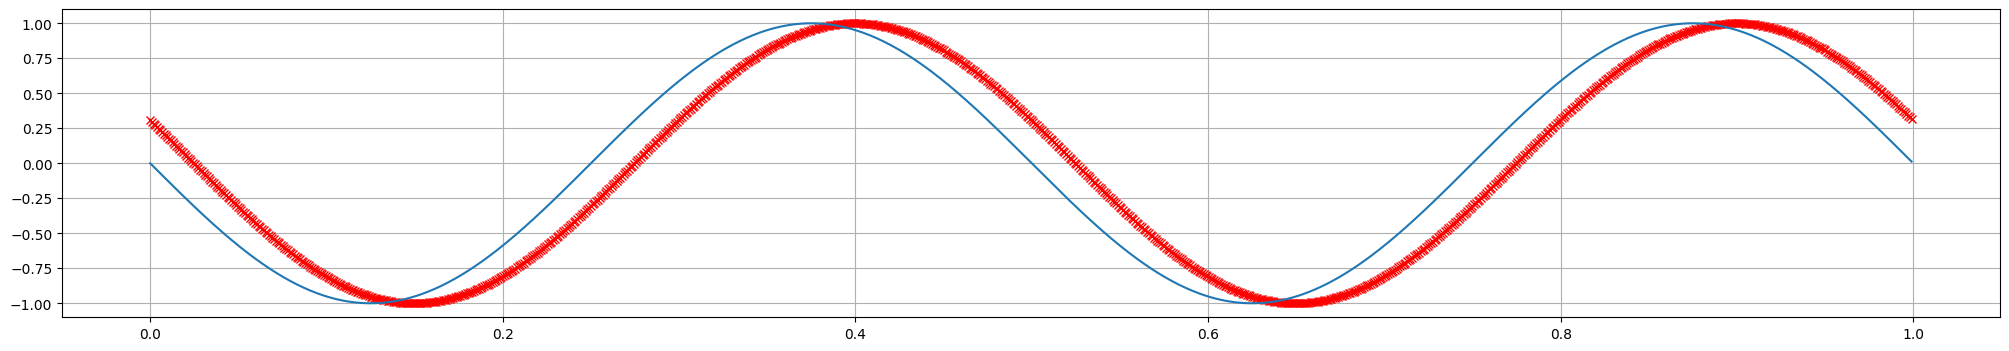

In [221]:
t = nIter*dt
x = np.arange(minX, maxX, step=dx)

# for iloc in range(len(df)):
for iloc in range(10):
    currV = minVx + iloc * dVx
    print(f"Vx[{iloc}] = {currV}")

    plt.figure(figsize=(25,4))
    y = df.iloc[iloc]
    plt.plot(x, y, '-rx') #plot numerical approximation
    plt.plot(x, np.sin((x - t*currV)*4*math.pi)) #plot the exact solution for this Vx
    plt.grid()
    plt.show()
